# NOTEBOOK OUTLINE

**Company Name:**
- Major Hospital

**Problem Type:**

- Classification (Multi Class)

**Problem:**
- The company wants to automate the classification of patients depending on if they have hepatitis or not and if so, what category of hepatitis they have.

**Goal:**
- These details (features we will use to predict) are as follows:
  - X (Patient ID/No.)
  - Age (in years)
  - Sex (f,m)
  - ALB
  - ALP
  - ALT
  - AST
  - BIL
  - CHE
  - CHOL
  - CREA
  - GGT
  - PROT


- Which will let us determine the target variable which is:
  - Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# PREREQUISITE INSTALLS

In [2]:
# Some of these might need to be uncommented to work depending if you are running on Kaggle or Google Colab
!pip install catboost              # For Catboost classifier
#!pip install umap                  # For UMAP in feature extraction
#!pip install --upgrade umap-learn  # For UMAP in feature extraction
!pip install dataprep               # For Dataprep interactive EDA
#!pip install -U mlxtend            # For Stacking Classifier
#!pip install --upgrade tensorflow  # For LSTM

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 62.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
    

In [3]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.0 MB/s eta 0:00:00


In [4]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# IMPORT MAIN LIBRARIES

In [5]:
#import main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import catboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import optuna
from optuna.samplers import TPESampler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import ExtraTreesClassifier
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# LOAD DATA

In [6]:
np.random.seed(42)

In [549]:
# LOCAL SYSTEM VERSION
# df = pd.read_csv(os.path.join(os.path.expanduser('~'), 'Desktop', 'hcvdat0.csv'))

# GOOGLE DRIVE VERSION
#from google.colab import drive
#drive.mount('/content/drive')
#os.chdir('/content/drive/My Drive/')
#df = pd.read_csv('hcvdat0.csv')

# KAGGLE VERSION
df = pd.read_csv('/content/drive/MyDrive/Hepatitis C Disease/hcvdat0.csv')

# Show the first 5 rows of the dataframe
print("\nFirst 5 rows of the dataframe: ")
df.head()


First 5 rows of the dataframe: 


,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


# INTERACTIVE EDA

In [8]:
from dataprep.eda import create_report, plot, plot_correlation, plot_missing , plot_diff

# Create Dataprep EDA report
report = create_report(df)

# Show the report
report.show()

Output hidden; open in https://colab.research.google.com to view.

# MANUAL TARGET ADJUSTMENTS

In [550]:
# Tell user target adjustments being made
print("Target adjusted as per the following steps:")

# Rename the "Category" column to "target"
df.rename(columns={'Category': 'target'}, inplace=True)
print("- Renamed 'Category' column to 'target'")

# Convert any values in the "Category" column that are "0=Blood Donor" to "0"
df.loc[df["target"] == "0=Blood Donor", "target"] = "0"
print("- Converted any values in the 'target' column that are '0=Blood Donor' to '0'")

# Convert any values in the "Category" column that are "0s=suspect Blood Donor" to "1"
df.loc[df["target"] == "0s=suspect Blood Donor", "target"] = "1"
print("- Converted any values in the 'target' column that are '0s=suspect Blood Donor' to '1'")

# Convert any values in the "Category" column that are "1=Hepatitis" to "2"
df.loc[df["target"] == "1=Hepatitis", "target"] = "2"
print("- Converted any values in the 'target' column that are '1=Hepatitis' to '2'")

# Convert any values in the "Category" column that are "2=Fibrosis" to "3"
df.loc[df["target"] == "2=Fibrosis", "target"] = "3"
print("- Converted any values in the 'target' column that are '2=Fibrosis' to '3'")

# Convert any values in the "Category" column that are "3=Cirrhosis" to "4"
df.loc[df["target"] == "3=Cirrhosis", "target"] = "4"
print("- Converted any values in the 'target' column that are '3=Cirrhosis' to '4'")

Target adjusted as per the following steps:
- Renamed 'Category' column to 'target'
- Converted any values in the 'target' column that are '0=Blood Donor' to '0'
- Converted any values in the 'target' column that are '0s=suspect Blood Donor' to '1'
- Converted any values in the 'target' column that are '1=Hepatitis' to '2'
- Converted any values in the 'target' column that are '2=Fibrosis' to '3'
- Converted any values in the 'target' column that are '3=Cirrhosis' to '4'


# MANUAL FEATURE ADJUSTMENTS

In [551]:
# # Tell user feature adjustments being made
# print("Features adjusted as per the following steps:")

# # Dropped the Unnamed: 0 column
# df.drop('Unnamed: 0', axis=1, inplace=True)
# print("- Dropped 'Unnamed: 0' column")

In [552]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   target      615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [553]:
# Tell user feature adjustments being made
print("Features adjusted as per the following steps:")

# Dropped the Unnamed: 0 column
df.drop('Unnamed: 0', axis=1, inplace=True)
print("- Dropped 'Unnamed: 0' column")

# Convert values in the "Sex" column from "m" to "1" and from "f" to "0"
df.loc[df["Sex"] == "m", "Sex"] = "1"
df.loc[df["Sex"] == "f", "Sex"] = "0"
print("- Converted any values in the Sex column from m to 1 and from f to 0")

# Identify numeric columns
numeric_cols = df.drop(['target'], axis=1).select_dtypes(include=np.number).columns

# Convert all values in the dataframe to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Show the first 5 rows of the dataframe
print("\nFirst 5 rows of the dataframe:")
df.head()

Features adjusted as per the following steps:
- Dropped 'Unnamed: 0' column
- Converted any values in the Sex column from m to 1 and from f to 0

First 5 rows of the dataframe:


,target,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [554]:
numeric_cols

Index(['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT',
       'PROT'],
      dtype='object')

In [555]:
# from sklearn.preprocessing import OneHotEncoder

In [556]:
# numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
# categorical_cols = df.drop('target', axis = 1).select_dtypes('object').columns.tolist()

In [318]:
# numeric_cols

['Age',
 'ALB',
 'ALP',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CHOL',
 'CREA',
 'GGT',
 'PROT']

In [319]:
# categorical_cols

['Sex']

In [320]:
# encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [321]:
# encoder.fit(df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [322]:
# encoder.categories_

[array(['f', 'm'], dtype=object)]

In [324]:
# # Get encoded column names
# encoded_cols = encoder.get_feature_names_out(categorical_cols)

In [325]:
# print(encoded_cols)

['Sex_f' 'Sex_m']


In [326]:
# # Scale numeric columns using StandardScaler
# scaler = StandardScaler()
# scaler.fit(df[numeric_cols])

StandardScaler()

# CORRELATION

<Axes: >

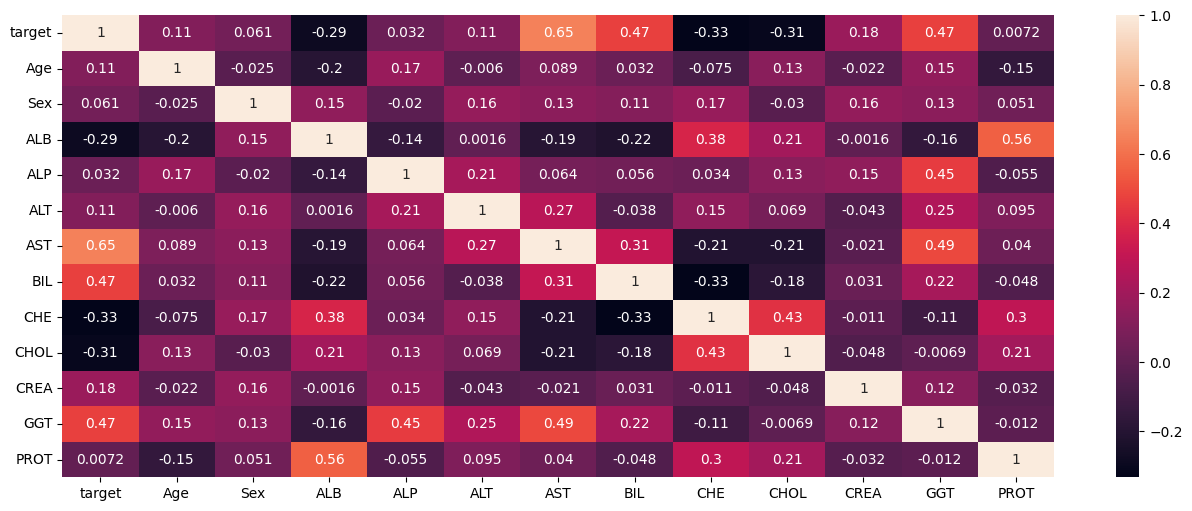

In [10]:
plt.figure(figsize=(16, 6))
relation =df.corr()
relation_index=relation.index
sns.heatmap(df[relation_index].corr(),annot=True)

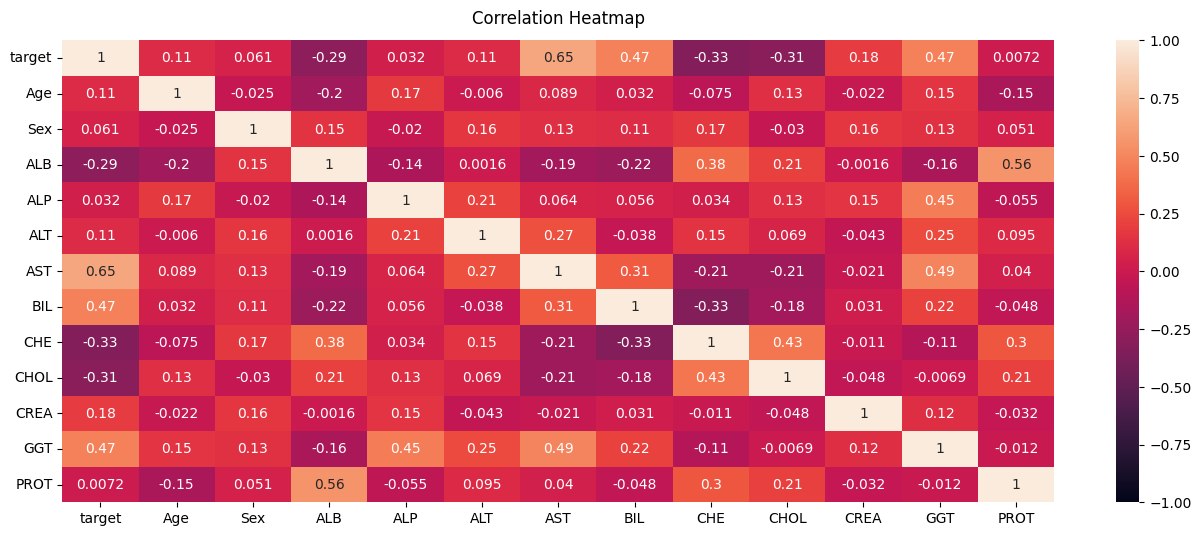

In [11]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# TRAIN/TEST SETS

In [557]:
from sklearn.model_selection import train_test_split

# Split the dataframe into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis=1), df['target'], test_size=0.2, random_state=42)#, stratify = df['target']

In [558]:
# Convert X_test and X_train to dataframes and y_test and y_train to series to ensure they are pandas objects
X_test = pd.DataFrame(X_test)
X_train = pd.DataFrame(X_train)
y_test = pd.Series(y_test)
y_train = pd.Series(y_train)

In [379]:
# X_train[encoded_cols] = encoder.transform(X_train[categorical_cols])
# X_test[encoded_cols] = encoder.transform(X_test[categorical_cols])

In [380]:
# X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
# X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# TARGET VARIABLE ENCODING (OPTIONAL)

In [381]:
#import category_encoders as ce

# Encode the values in the specified feature columns using their relationship to the target
#encoder = ce.TargetEncoder(cols=['example_replace_me_feature1', 'example_replace_me_feature2'])
#X_train = encoder.fit_transform(X_train, y_train)
#X_test = encoder.transform(X_test)

In [382]:
# Convert X_test and X_train to dataframes and y_test and y_train to series to ensure they are pandas objects
#X_test = pd.DataFrame(X_test)
#X_train = pd.DataFrame(X_train)
#y_test = pd.Series(y_test)
#y_train = pd.Series(y_train)

# FILL ANY MISSING VALUES

In [559]:
from scipy.stats import trim_mean

# Filling missing values in the training set with the 10% trim_mean of the column
for col in X_train.columns:
    X_train[col].fillna(trim_mean(X_train[col], 0.1), inplace=True)

# Filling missing values in the testing set with the 10% trim_mean of the column
for col in X_test.columns:
    X_test[col].fillna(trim_mean(X_test[col], 0.1), inplace=True)

# Tell user that missing values have been filled
print("- Filled any missing values in the training and testing sets separately with the 10% trim_mean of the column")

- Filled any missing values in the training and testing sets separately with the 10% trim_mean of the column


In [560]:
# X_train.to_csv('/content/drive/MyDrive/Hepatitis C Disease/X_train.csv', index = False)

In [561]:
X_train

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
83,39,1,36.6,71.3,28.9,25.9,6.1,5.70,4.660000,77.0,22.6,66.3
90,39,1,45.8,62.5,20.7,22.8,45.5,8.61,4.780000,77.0,15.9,75.5
228,53,1,44.5,61.2,14.4,18.1,8.0,6.95,5.000000,70.0,18.3,72.0
509,58,0,26.3,52.5,39.5,77.2,5.8,5.15,3.530000,40.0,31.2,51.0
329,33,0,42.4,137.2,14.2,13.1,3.4,8.23,5.400381,48.0,25.7,74.4
...,...,...,...,...,...,...,...,...,...,...,...,...
71,38,1,39.9,62.9,71.7,43.9,10.4,10.90,7.010000,99.0,88.3,73.1
106,41,1,44.7,74.9,25.2,20.2,6.3,10.34,4.230000,74.0,23.7,72.1
270,59,1,39.8,49.4,25.4,21.4,24.7,7.50,3.690000,86.0,18.7,71.9
435,48,0,44.4,52.5,16.4,23.4,4.5,9.06,6.780000,74.0,10.3,73.1


In [351]:
# from scipy.stats import trim_mean

# # Filling missing values in the training set with the 10% trim_mean of the column
# for col in numeric_cols:
#     X_train[col].fillna(trim_mean(X_train[col], 0.1), inplace=True)

# # Filling missing values in the testing set with the 10% trim_mean of the column
# for col in numeric_cols:
#     X_test[col].fillna(trim_mean(X_test[col], 0.1), inplace=True)

# # Tell user that missing values have been filled
# print("- Filled any missing values in the training and testing sets separately with the 10% trim_mean of the column")

- Filled any missing values in the training and testing sets separately with the 10% trim_mean of the column


# REMOVE TRAINING OUTLIERS (OPTIONAL)

In [17]:
# IMPORTANT REMINDER: If you decide to remove outliers from the test set as well (in the next section)
# Make sure to use the exact same settings you used when removing outliers from the training set (this section)

# >>>>>>>>>>>>>>>>>>>>>>>>>>> UNCOMMENT THIS SECTION TO USE IQR METHOD

#from scipy.stats import iqr

# Print the number of rows in the training data before removing outliers
#print(f"[IQR SELECTED] Number of rows in training data before removing outliers: {len(X_train)}")

# Identify and remove outliers from the training set using IQR method
#Q1 = X_train.quantile(0.25)
#Q3 = X_train.quantile(0.75)
#IQR = iqr(X_train)
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR
#X_train = X_train[(X_train >= lower_bound) & (X_train <= upper_bound)].dropna()
#y_train = y_train.loc[X_train.index]

# Print the number of rows in the training data after removing outliers
#print(f"[IQR SELECTED] Number of rows in training data after removing outliers: {len(X_train)}")

# >>>>>>>>>>>>>>>>>>>>>>>>>>> UNCOMMENT THIS SECTION TO USE ZSCORE METHOD

#from scipy.stats import zscore

# Print the number of rows in the training data before removing outliers
#print(f"[Z-SCORE SELECTED] Number of rows in training data before removing outliers: {len(X_train)}")

# Calculate the z-scores of each value in X_train
#z_scores = abs(zscore(X_train))

# Define a threshold for removing outliers
#threshold = 3

# Identify and remove outliers from the training set using z-score method
#X_train = X_train[(z_scores < threshold).all(axis=1)]
#y_train = y_train.loc[X_train.index]

# Print the number of rows in the training data after removing outliers
#print(f"[Z-SCORE SELECTED] Number of rows in training data after removing outliers: {len(X_train)}")

# >>>>>>>>>>>>>>>>>>>>>>>>>>> UNCOMMENT THIS SECTION TO USE ISOLATION FOREST METHOD

#from sklearn.ensemble import IsolationForest

# Print the number of rows in the training data before removing outliers
#print(f"[ISOLATION FOREST SELECTED] Number of rows in training data before removing outliers: {len(X_train)}")

# Define the isolation forest model
#model = IsolationForest(contamination=0.05)

# Fit the model on the training set
#model.fit(X_train)

# Use the model to detect outliers in the training set
#outliers = model.predict(X_train) == -1

# Remove the outliers from the training set
#X_train = X_train[~outliers]
#y_train = y_train.loc[X_train.index]

# Print the number of rows in the training data after removing outliers
#print(f"[ISOLATION FOREST SELECTED] Number of rows in training data after removing outliers: {len(X_train)}")

# >>>>>>>>>>>>>>>>>>>>>>>>>>> UNCOMMENT THIS SECTION TO USE LOCAL OUTLIER FACTOR METHOD

#from sklearn.neighbors import LocalOutlierFactor

# Print the number of rows in the training data before removing outliers
#print(f"[LOF SELECTED] Number of rows in training data before removing outliers: {len(X_train)}")

# Identify and remove outliers from the training set using LOF method
#lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
#outlier_mask = lof.fit_predict(X_train) == 1
#X_train = X_train[outlier_mask]
#y_train = y_train[outlier_mask]

# Print the number of rows in the training data after removing outliers
#print(f"[LOF SELECTED] Number of rows in training data after removing outliers: {len(X_train)}")


In [18]:
# Convert X_test and X_train to dataframes and y_test and y_train to series to ensure they are pandas objects
#X_test = pd.DataFrame(X_test)
#X_train = pd.DataFrame(X_train)
#y_test = pd.Series(y_test)
#y_train = pd.Series(y_train)

# REMOVE TESTING OUTLIERS (OPTIONAL)

In [19]:
# IMPORTANT REMINDER: If you decide to remove outliers from the test set as well (this section)
# Make sure to use the exact same settings you used when removing outliers from the training set (the previous section)

# >>>>>>>>>>>>>>>>>>>>>>>>>>> UNCOMMENT THIS SECTION TO USE IQR METHOD

#from scipy.stats import iqr

# Print the number of rows in the testing data before removing outliers
#print(f"[IQR SELECTED] Number of rows in testing data before removing outliers: {len(X_test)}")

# Identify and remove outliers from the testing set using IQR method
#Q1 = X_test.quantile(0.25)
#Q3 = X_test.quantile(0.75)
#IQR = iqr(X_test)
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR
#X_test = X_test[(X_test >= lower_bound) & (X_test <= upper_bound)].dropna()
#y_test = y_test.loc[X_test.index]

# Print the number of rows in the testing data after removing outliers
#print(f"[IQR SELECTED] Number of rows in testing data after removing outliers: {len(X_test)}")

# >>>>>>>>>>>>>>>>>>>>>>>>>>> UNCOMMENT THIS SECTION TO USE ZSCORE METHOD

#from scipy.stats import zscore

# Print the number of rows in the testing data before removing outliers
#print(f"[Z-SCORE SELECTED] Number of rows in testing data before removing outliers: {len(X_test)}")

# Calculate the z-scores of each value in X_test
#z_scores = abs(zscore(X_test))

# Define a threshold for removing outliers
#threshold = 3

# Identify and remove outliers from the testing set using z-score method
#X_test = X_test[(z_scores < threshold).all(axis=1)]
#y_test = y_test.loc[X_test.index]

# Print the number of rows in the testing data after removing outliers
#print(f"[Z-SCORE SELECTED] Number of rows in testing data after removing outliers: {len(X_test)}")

# >>>>>>>>>>>>>>>>>>>>>>>>>>> UNCOMMENT THIS SECTION TO USE ISOLATION FOREST METHOD

#from sklearn.ensemble import IsolationForest

# Print the number of rows in the testing data before removing outliers
#print(f"[ISOLATION FOREST SELECTED] Number of rows in testing data before removing outliers: {len(X_test)}")

# Define the isolation forest model
#model = IsolationForest(contamination=0.05)

# Fit the model on the testing set
#model.fit(X_test)

# Use the model to detect outliers in the testing set
#outliers = model.predict(X_test) == -1

# Remove the outliers from the testing set
#X_test = X_test[~outliers]
#y_test = y_test.loc[X_test.index]

# Print the number of rows in the testing data after removing outliers
#print(f"[ISOLATION FOREST SELECTED] Number of rows in testing data after removing outliers: {len(X_test)}")

# >>>>>>>>>>>>>>>>>>>>>>>>>>> UNCOMMENT THIS SECTION TO USE LOCAL OUTLIER FACTOR METHOD

#from sklearn.neighbors import LocalOutlierFactor

# Print the number of rows in the testing data before removing outliers
#print(f"[LOF SELECTED] Number of rows in testing data before removing outliers: {len(X_test)}")

# Identify and remove outliers from the testing set using LOF method
#lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
#outlier_mask = lof.fit_predict(X_test) == 1
#X_test = X_test[outlier_mask]
#y_test = y_test[outlier_mask]

# Print the number of rows in the testing data after removing outliers
#print(f"[LOF SELECTED] Number of rows in testing data after removing outliers: {len(X_test)}")

In [ ]:
# Convert X_test and X_train to dataframes and y_test and y_train to series to ensure they are pandas objects
#X_test = pd.DataFrame(X_test)
#X_train = pd.DataFrame(X_train)
#y_test = pd.Series(y_test)
#y_train = pd.Series(y_train)

# FEATURE SELECTION (OPTIONAL)

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>> UNCOMMENT THIS SECTION TO USE RFECV (RECURSIVE FEATURE ELIMINATION WITH CROSS-VALIDATION)

#from sklearn.feature_selection import RFECV

# Initialize a chosen RFECV base model
#from sklearn.ensemble import RandomForestClassifier          # Change this to a different model if needed
#chosen_rfecv_base_model = RandomForestClassifier(n_estimators=100, random_state=42) # Change this to a different model if needed
#step_value = 1                                               # Change this as needed to control how many features are dropped each iteration
#minimum_features_to_keep = 5                                 # Change this to the minimum number of features you need to keep


# Use 5-fold RFECV to determine the most optimal features to keep using the given step value
#selector = RFECV(estimator=chosen_rfecv_base_model,
#                 step=step_value,
#                 min_features_to_select=minimum_features_to_keep,
#                 cv=5)
#selector.fit(X_train, y_train)

# Get the list of selected features
#selected_features = X_train.columns[selector.support_]

# Get the features to drop
#dropped_features = [feature for feature in X_train.columns if feature not in selected_features]

# Modify the train and test data accordingly
#X_train = X_train[selected_features]
#X_test = X_test[selected_features]

# Show the dropped features
#print("[RFECV] Dropped features:", dropped_features)

# >>>>>>>>>>>>>>>>>>>>>>>>>>> UNCOMMENT THIS SECTION TO USE PERMUTATION

#from sklearn.inspection import permutation_importance

# Initialize a chosen base model
#from sklearn.ensemble import RandomForestClassifier           # Change this to a different model if needed
#permutation_chosen_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Change this to a different model if needed
#n_features_to_keep = 4                                        # Change this as needed to control how many features to keep

# Train the model on the training data
#permutation_chosen_model.fit(X_train, y_train)

# Calculate feature importances using permutation importance
#perm_importance = permutation_importance(permutation_chosen_model, X_test, y_test, n_repeats=100)

# Get the indices of the features sorted by importance
#sorted_idx = perm_importance.importances_mean.argsort()[::-1]

# Get the list of selected features
#selected_features = X_train.columns[sorted_idx][:n_features_to_keep]

# Get the features to drop
#dropped_features = [feature for feature in X_train.columns if feature not in selected_features]

# Modify the train and test data accordingly
#X_train = X_train[selected_features]
#X_test = X_test[selected_features]

# Show the dropped features
#print("[PERMUTATION] Dropped features:", dropped_features)

In [ ]:
# Convert X_test and X_train to dataframes and y_test and y_train to series to ensure they are pandas objects
#X_test = pd.DataFrame(X_test)
#X_train = pd.DataFrame(X_train)
#y_test = pd.Series(y_test)
#y_train = pd.Series(y_train)

In [ ]:
# Show the first 5 row of the training dataframe
#print("\n First 5 rows of the training dataframe:")
#X_train.head()

In [ ]:
# Show the first 5 row of the testing dataframe
#print("\n First 5 rows of the testing dataframe:")
#X_test.head()

# T-SNE VISUAL (OPTIONAL)

In [16]:
# NOTE: Sometimes the visuals wont work on Kaggle, likely because too much memory usage, but it should work locally if needed

# >>>>>>>>>>>>>>>>>>>>>>>>>>> UNCOMMENT THIS SECTION TO SHOW T-SNE VISUAL

import plotly.express as px
from sklearn.manifold import TSNE

# Make a temporary use copy of the training and testing data into a single dataframe
temp_tsne = pd.concat([X_train, X_test]).reset_index(drop=True)
temp_tsne['target'] = pd.concat([y_train, y_test]).reset_index(drop=True)

# Use T-SNE to reduce the number of features to n_components and properly rename the columns
n_components = 3
tsne = TSNE(n_components=n_components, random_state=42)
tsne_features = tsne.fit_transform(temp_tsne.drop('target', axis=1))
tsne_df = pd.DataFrame(tsne_features, columns=[f'TSNE{i}' for i in range(1, n_components+1)])
tsne_df['target'] = temp_tsne['target']

# Generate a 3D interactive plot
fig = px.scatter_3d(tsne_df, x='TSNE1', y='TSNE2', z='TSNE3', color='target')
fig.show()

# UMAP VISUAL (OPTIONAL)

In [ ]:
# # NOTE: Sometimes the visuals wont work on Kaggle, likely because too much memory usage, but it should work locally if needed

# # >>>>>>>>>>>>>>>>>>>>>>>>>>> UNCOMMENT THIS SECTION TO SHOW UMAP VISUAL

# import plotly.express as px
# import umap.umap_ as umap

# # Make a temporary use copy of the training and testing data into a single dataframe
# temp_umap = pd.concat([X_train, X_test]).reset_index(drop=True)
# temp_umap['target'] = pd.concat([y_train, y_test]).reset_index(drop=True)

# # Use UMAP to reduce the number of features to n_components and properly rename the columns
# n_components = 3
# umap_embedded = umap.UMAP(n_components=n_components, random_state=42).fit_transform(temp_umap.drop('target', axis=1))
# umap_df = pd.DataFrame(umap_embedded, columns=[f'UMAP{i}' for i in range(1, n_components+1)])
# umap_df['target'] = temp_umap['target'].astype(str)

# # Generate a 3D interactive plot
# fig = px.scatter_3d(umap_df, x='UMAP1', y='UMAP2', z='UMAP3', color='target')
# fig.show()

# FEATURE EXTRACTION (OPTIONAL)

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>> UNCOMMENT THIS SECTION TO USE PCA (PRINCIPAL COMPONENT ANALYSIS)

#from sklearn.decomposition import PCA

# Change this to any number of components you want
#n_components = 3

# Use PCA to reduce the number of features to n_components and properly rename the columns
#pca = PCA(n_components=n_components)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
#X_train = pd.DataFrame(X_train)
#X_test = pd.DataFrame(X_test)

# Generate column names based on the number of components
#column_names = [f'PCA{i}' for i in range(1, n_components+1)]
#X_train.columns = column_names
#X_test.columns = column_names


# >>>>>>>>>>>>>>>>>>>>>>>>>>> UNCOMMENT THIS SECTION TO USE ICA (INDEPENDENT COMPONENT ANALYSIS)

#from sklearn.decomposition import FastICA

# Change this to any number of components you want
#n_components = 3

# Use ICA to reduce the number of features to n_components and properly rename the columns
#ica = FastICA(n_components=n_components, random_state=42)
#X_train = ica.fit_transform(X_train)
#X_test = ica.transform(X_test)
#X_train = pd.DataFrame(X_train)
#X_test = pd.DataFrame(X_test)

# Generate column names based on the number of components
#column_names = [f'ICA{i}' for i in range(1, n_components+1)]
#X_train.columns = column_names
#X_test.columns = column_names

# >>>>>>>>>>>>>>>>>>>>>>>>>>> UNCOMMENT THIS SECTION TO USE SVD (SINGULAR VALUE DECOMPOSITION)

#from sklearn.decomposition import TruncatedSVD

# Define the number of components you want to keep
#n_components = 3

# Apply SVD to reduce the number of features to n_components
#svd = TruncatedSVD(n_components=n_components, random_state=42)
#X_train = svd.fit_transform(X_train)
#X_test = svd.transform(X_test)

# Convert the transformed data to a pandas DataFrame and assign column names
#column_names = [f'SVD{i}' for i in range(1, n_components+1)]
#X_train = pd.DataFrame(X_train, columns=column_names)
#X_test = pd.DataFrame(X_test, columns=column_names)


# >>>>>>>>>>>>>>>>>>>>>>>>>>> UNCOMMENT THIS SECTION TO USE LDA (LINEAR DISCRIMINANT ANALYSIS)
# >>>>>>>>>>>>>>>>>>>>>>>>>> IMPORTANT NOTE: LDA ASSUMES THAT IT'S A CLASSIFICATION PROBLEM, AND IT"S SUPERVISED!

#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Change this to any number of components you want
#n_components = 1

# Use LDA to reduce the number of features to n_components and properly rename the columns
#lda = LinearDiscriminantAnalysis(n_components=n_components)
#X_train = lda.fit_transform(X_train, y_train)
#X_test = lda.transform(X_test)
#X_train = pd.DataFrame(X_train)
#X_test = pd.DataFrame(X_test)

# Generate column names based on the number of components
#column_names = [f'LDA{i}' for i in range(1, n_components+1)]
#X_train.columns = column_names
#X_test.columns = column_names

In [ ]:
# Convert X_test and X_train to dataframes and y_test and y_train to series to ensure they are pandas objects
#X_test = pd.DataFrame(X_test)
#X_train = pd.DataFrame(X_train)
#y_test = pd.Series(y_test)
#y_train = pd.Series(y_train)

In [ ]:
# Show the first 5 row of the training dataframe
#print("\n First 5 rows of the training dataframe:")
#X_train.head()

In [ ]:
# Show the first 5 row of the testing dataframe
#print("\n First 5 rows of the testing dataframe:")
#X_test.head()

# SCALING

In [366]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [384]:
# Scale numeric columns using StandardScaler
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
# Print the scaled dataframe
print(X_train)

          Age  Sex       ALB       ALP       ALT       AST       BIL  \
83  -0.835559    1 -0.901069  0.162866  0.028001 -0.257913 -0.280688   
90  -0.835559    1  0.726659 -0.253759 -0.320477 -0.346239  1.817927   
228  0.591500    1  0.496654 -0.315306 -0.588210 -0.480152 -0.179486   
509  1.101164    0 -2.723417 -0.727196  0.478473  1.203739 -0.296667   
329 -1.447156    0  0.125108  3.282819 -0.596710 -0.622613 -0.424502   
..        ...  ...       ...       ...       ...       ...       ...   
71  -0.937492    1 -0.317210 -0.234821  1.846887  0.254948 -0.051651   
106 -0.631693    1  0.532040  0.333304 -0.129239 -0.420318 -0.270035   
270  1.203097    1 -0.334903 -0.873962 -0.120740 -0.386128  0.710029   
435  0.081836    0  0.478961 -0.727196 -0.503215 -0.329143 -0.365911   
102 -0.631693    1  0.107415 -0.566227 -0.367224 -0.457358 -0.025019   

          CHE      CHOL      CREA       GGT      PROT  
83  -1.157568 -0.639442 -0.080611 -0.322796 -1.056130  
90   0.219224 -0.536664

In [385]:
# Extract the column names
col_names = X_train.columns
# Reassign the column names
X_train = pd.DataFrame(X_train, columns=col_names)
X_test = pd.DataFrame(X_test, columns=col_names)

In [386]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# # Extract the column names
# col_names = X_train.columns

# # Scale the data using a standard scaler
# scaler = StandardScaler()
# #scaler = MinMaxScaler()                  # Only keep one of the scalers uncommented, depending which you want to use
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Reassign the column names
# X_train = pd.DataFrame(X_train, columns=col_names)
# X_test = pd.DataFrame(X_test, columns=col_names)

In [387]:
# Convert X_test and X_train to dataframes and y_test and y_train to series to ensure they are pandas objects
X_test = pd.DataFrame(X_test)
X_train = pd.DataFrame(X_train)
y_test = pd.Series(y_test)
y_train = pd.Series(y_train)

# ENSURE BALANCED CLASSES IN TRAINING SET

In [388]:
# Show the classes balance in the training set
print('Training Set Class Balance: \n', y_train.value_counts())

Training Set Class Balance: 
 0    437
4     21
3     15
2     15
1      4
Name: target, dtype: int64


In [389]:
le = LabelEncoder()
le.fit(df['target'])
le_name_map = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_map

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}

# OVERSAMPLE OR UNDERSAMPLE (OPTIONAL)

In [390]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>> UNCOMMENT THIS SECTION TO USE OVERSAMPLING

from imblearn.over_sampling import SMOTE

# Use SMOTE to oversample the minority class until it has the same number of rows as the majority class
smote = SMOTE(random_state=42, k_neighbors=3)            # Had to adjust this from k_neighbors 6 to 3 because there is so few classes in the minority class
X_train, y_train = smote.fit_resample(X_train, y_train)

# >>>>>>>>>>>>>>>>>>>>>>>>>>> UNCOMMENT THIS SECTION TO USE UNDERSAMPLING

#from imblearn.under_sampling import RandomUnderSampler

# Use random undersampling to undersample the majority class until it has the same number of rows as the minority class
#rus = RandomUnderSampler(random_state=42)
#X_train, y_train = rus.fit_resample(X_train, y_train)

In [391]:
# Show the classes balance in the training set
print('Training Set Class Balance: \n', y_train.value_counts())

Training Set Class Balance: 
 0    437
3    437
4    437
2    437
1    437
Name: target, dtype: int64


# LAZYPREDICT

In [26]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:29<00:00,  1.03s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LinearDiscriminantAnalysis         0.76               0.70    None      0.79   
CalibratedClassifierCV             0.85               0.69    None      0.87   
XGBClassifier                      0.90               0.68    None      0.90   
LogisticRegression                 0.85               0.67    None      0.86   
NuSVC                              0.81               0.67    None      0.83   
LinearSVC                          0.85               0.66    None      0.86   
NearestCentroid                    0.72               0.66    None      0.77   
GaussianNB                         0.90               0.65    None      0.90   
RidgeClassifierCV                  0.73               0.64    None      0.77   
RidgeClassifier                    0.73               0.64    None      0.77   
SGDClassifier                      0.75 

# TRY SIMPLE MODELS FIRST

In [ ]:
# from sklearn.metrics import classification_report
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB

# # Logistic Regression
# lr_model = LogisticRegression(random_state=42)
# lr_model.fit(X_train, y_train)

# print('[LOGISTIC REGRESSION CLASSIFIER] Training Mean 5-Fold CV Score: {:.2f}%'.format(np.mean(cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy', verbose=0)) * 100))
# print('[LOGISTIC REGRESSION CLASSIFIER] Test Set Accuracy Score: {:.2f}%'.format(lr_model.score(X_test, y_test) * 100))
# print("[LOGISTIC REGRESSION CLASSIFIER] Classification Report:\n", classification_report(y_test, lr_model.predict(X_test)))

# # Catboost
# cat_model = catboost.CatBoostClassifier(verbose=False)
# cat_model.fit(X_train, y_train)

# # # Naive Bayes
# # nb_model = GaussianNB()
# # nb_model.fit(X_train, y_train)

# print('[CATBOOST CLASSIFIER] Training Mean 5-Fold CV Score: {:.2f}%'.format(np.mean(cross_val_score(cat_model, X_train, y_train, cv=5, scoring='accuracy', verbose=0)) * 100))
# print('[CATBOOST CLASSIFIER] Test Set Accuracy Score: {:.2f}%'.format(cat_model.score(X_test, y_test) * 100))
# print("[CATBOOST CLASSIFIER] Classification Report:\n", classification_report(y_test, cat_model.predict(X_test)))

[LOGISTIC REGRESSION CLASSIFIER] Training Mean 5-Fold CV Score: 90.48%
[LOGISTIC REGRESSION CLASSIFIER] Test Set Accuracy Score: 83.74%
[LOGISTIC REGRESSION CLASSIFIER] Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93        96
           1       0.50      0.67      0.57         3
           2       0.38      0.67      0.48         9
           3       0.33      0.33      0.33         6
           4       1.00      0.67      0.80         9

    accuracy                           0.84       123
   macro avg       0.63      0.65      0.62       123
weighted avg       0.88      0.84      0.85       123

[CATBOOST CLASSIFIER] Training Mean 5-Fold CV Score: 99.63%
[CATBOOST CLASSIFIER] Test Set Accuracy Score: 92.68%
[CATBOOST CLASSIFIER] Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        96
           1       1.00      0.33      0.50      

# Catboost

In [392]:
X_train.shape

(2185, 12)

In [393]:
y_train.shape

(2185,)

In [394]:
# Catboost
model_Cat = catboost.CatBoostClassifier(verbose=False)
model_Cat.fit(X_train, y_train)
y_pred = model_Cat.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9186991869918699


In [395]:
y_pred_ = model_Cat.predict(X_train)
print(accuracy_score(y_train, y_pred_))

1.0


In [396]:
# for the training
print(classification_report(y_train, y_pred_,digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       437
           1     1.0000    1.0000    1.0000       437
           2     1.0000    1.0000    1.0000       437
           3     1.0000    1.0000    1.0000       437
           4     1.0000    1.0000    1.0000       437

    accuracy                         1.0000      2185
   macro avg     1.0000    1.0000    1.0000      2185
weighted avg     1.0000    1.0000    1.0000      2185



In [397]:
# fror the testing
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.9406    0.9896    0.9645        96
           1     1.0000    0.3333    0.5000         3
           2     0.8571    0.6667    0.7500         9
           3     0.6000    0.5000    0.5455         6
           4     0.8889    0.8889    0.8889         9

    accuracy                         0.9187       123
   macro avg     0.8573    0.6757    0.7298       123
weighted avg     0.9155    0.9187    0.9115       123



CATBOOST WITH OPTUNA

In [398]:

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

In [399]:
def objective(trial):
    model_optuna = catboost.CatBoostClassifier(
        iterations=trial.suggest_int("iterations", 100, 1000),
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        depth=trial.suggest_int("depth", 4, 10),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        bootstrap_type=trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
        random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
        od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        od_wait=trial.suggest_int("od_wait", 10, 50),
        verbose=False
    )
    model_optuna.fit(X_train, y_train)
    y_pred = model_optuna.predict(X_test)
    #np.mean(cross_val_score(cat_model, X_train, y_train, cv=5, scoring='accuracy', verbose=0)) * 100)
    return accuracy_score(y_test, y_pred)

In [400]:
#optuna.logging.set_verbosity(optuna.logging.WARNING)

sampler = TPESampler(seed=1)
study = optuna.create_study(study_name="catboost", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=300)

[I 2023-06-18 00:11:08,052] A new study created in memory with name: catboost
[I 2023-06-18 00:11:10,307] Trial 0 finished with value: 0.8861788617886179 and parameters: {'iterations': 475, 'learning_rate': 0.027583475549166746, 'depth': 4, 'l2_leaf_reg': 1.0551779964424746e-05, 'bootstrap_type': 'Bayesian', 'random_strength': 2.0931628460945333e-07, 'bagging_temperature': 0.923385947687978, 'od_type': 'Iter', 'od_wait': 26}. Best is trial 0 with value: 0.8861788617886179.
[I 2023-06-18 00:11:43,408] Trial 1 finished with value: 0.8943089430894309 and parameters: {'iterations': 585, 'learning_rate': 0.006892694481137703, 'depth': 8, 'l2_leaf_reg': 1.10795595820296e-06, 'bootstrap_type': 'Bayesian', 'random_strength': 0.7999391045172093, 'bagging_temperature': 0.27387593197926163, 'od_type': 'IncToDec', 'od_wait': 32}. Best is trial 1 with value: 0.8943089430894309.
[I 2023-06-18 00:12:09,559] Trial 2 finished with value: 0.8861788617886179 and parameters: {'iterations': 226, 'learning_

In [401]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  300
Best trial:
  Value:  0.943089430894309
  Params: 
    iterations: 791
    learning_rate: 0.00757057229414697
    depth: 5
    l2_leaf_reg: 1.8284153908478775
    bootstrap_type: Bayesian
    random_strength: 2.4224873182361475
    bagging_temperature: 7.179745056088807
    od_type: IncToDec
    od_wait: 21


In [402]:
model_Cat_optuna = catboost.CatBoostClassifier(**trial.params, verbose=False)
model_Cat_optuna.fit(X_train, y_train)
y_pred = model_Cat_optuna.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.943089430894309


In [403]:
y_pred_ = model_Cat_optuna.predict(X_train)
print(accuracy_score(y_train, y_pred_))

0.9931350114416476


In [404]:
# classification report for the train set
print(classification_report(y_train, y_pred_,digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9771    0.9884       437
           1     0.9932    1.0000    0.9966       437
           2     0.9887    0.9977    0.9932       437
           3     0.9842    1.0000    0.9921       437
           4     1.0000    0.9908    0.9954       437

    accuracy                         0.9931      2185
   macro avg     0.9932    0.9931    0.9931      2185
weighted avg     0.9932    0.9931    0.9931      2185



In [405]:
# classification report for the test set
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.9600    1.0000    0.9796        96
           1     1.0000    0.6667    0.8000         3
           2     0.8750    0.7778    0.8235         9
           3     0.6667    0.6667    0.6667         6
           4     1.0000    0.7778    0.8750         9

    accuracy                         0.9431       123
   macro avg     0.9003    0.7778    0.8290       123
weighted avg     0.9434    0.9431    0.9409       123



Confusion matrix, without normalization
[[96  0  0  0  0]
 [ 1  2  0  0  0]
 [ 1  0  7  1  0]
 [ 2  0  0  4  0]
 [ 0  0  1  1  7]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.        ]
 [0.33333333 0.66666667 0.         0.         0.        ]
 [0.11111111 0.         0.77777778 0.11111111 0.        ]
 [0.33333333 0.         0.         0.66666667 0.        ]
 [0.         0.         0.11111111 0.11111111 0.77777778]]


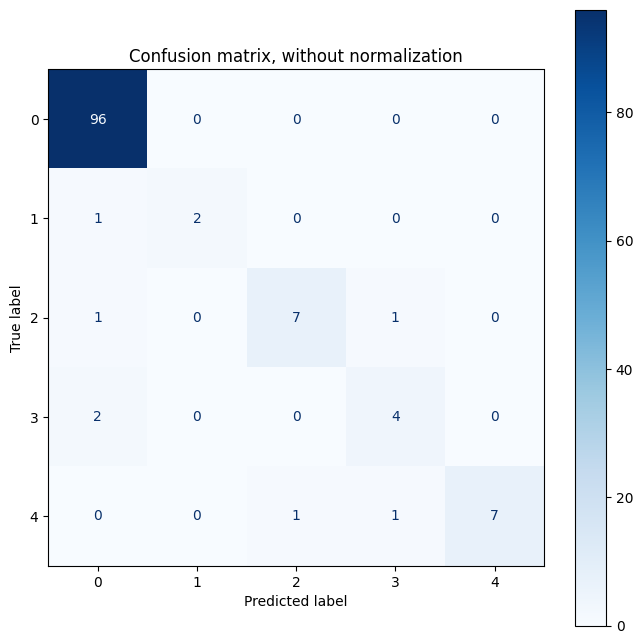

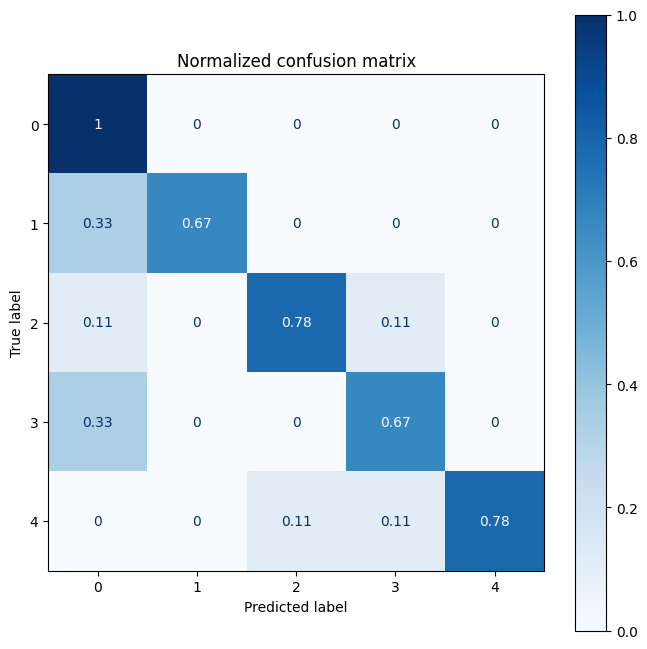

In [406]:
# save the target variable classes
class_names = le_name_map.keys()

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(8, 8))

    disp = ConfusionMatrixDisplay.from_estimator(
        model_Cat_optuna,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
        ax = ax
    )
    disp.ax_.set_title(title)
    disp.ax_.grid(False)

    print(title)
    print(disp.confusion_matrix)

In [407]:
model_Cat_optuna.feature_importances_

array([ 7.27306714,  1.10082889, 16.25686611,  8.38286102,  5.65249139,
       15.51449038,  9.05530775,  7.08640475,  6.78528517,  6.77919942,
        4.48170252, 11.63149546])

In [408]:
feature_imp = pd.DataFrame(sorted(zip(model_Cat_optuna.feature_importances_,X_train.columns)), columns=['Value','Feature'])
feature_imp

,Value,Feature
0,1.100829,Sex
1,4.481703,GGT
2,5.652491,ALT
3,6.779199,CREA
4,6.785285,CHOL
5,7.086405,CHE
6,7.273067,Age
7,8.382861,ALP
8,9.055308,BIL
9,11.631495,PROT


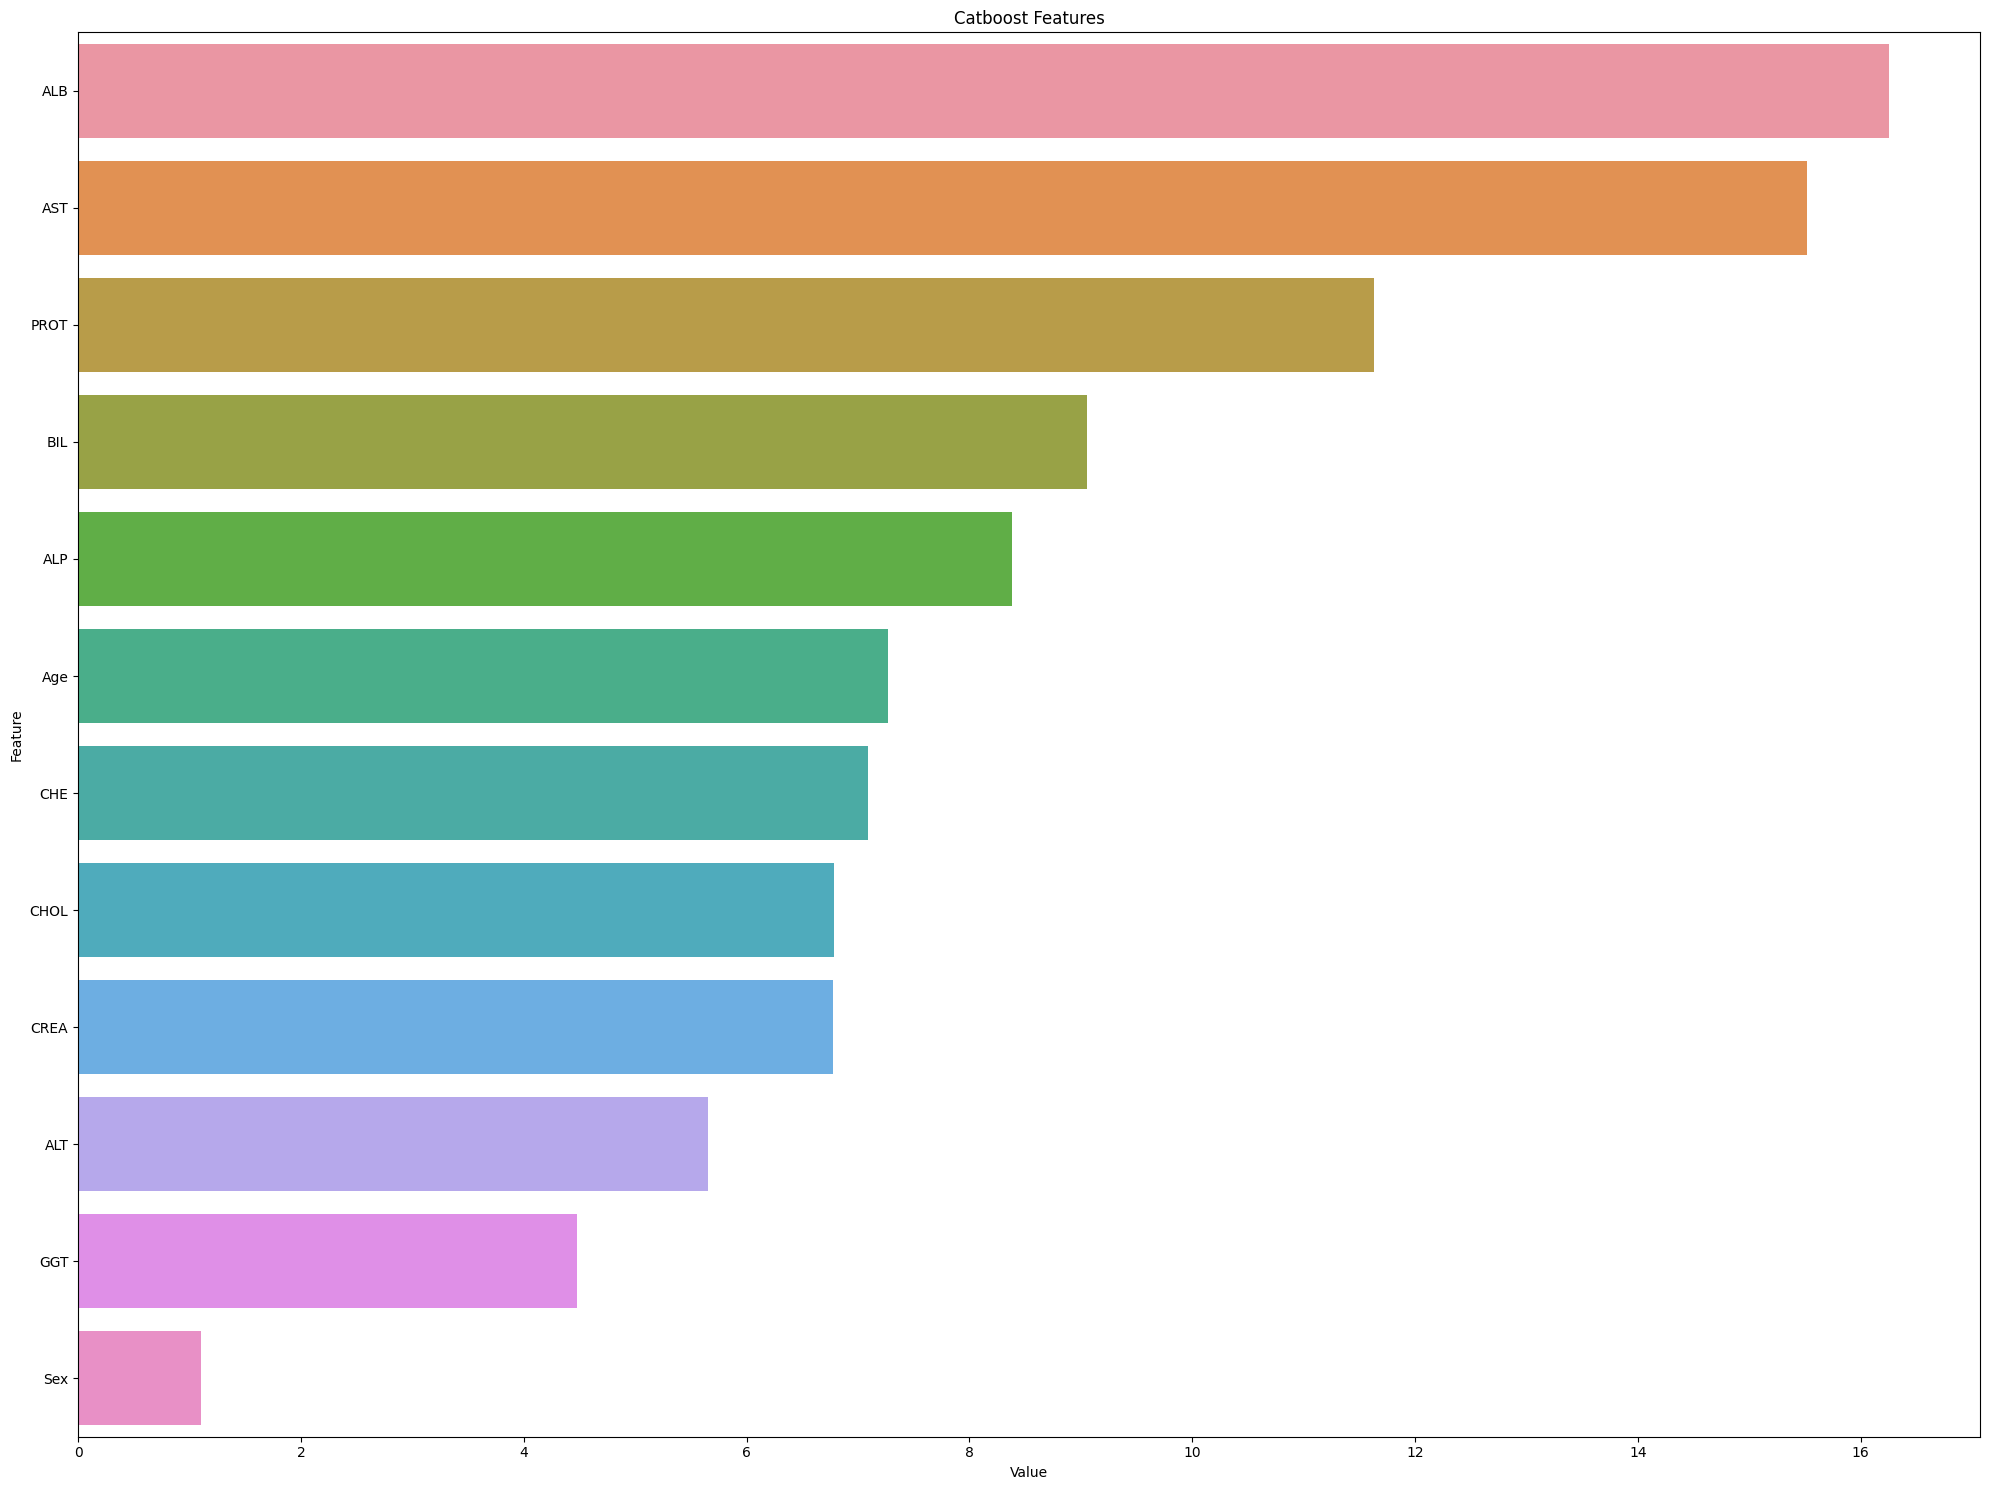

In [409]:
feature_imp = pd.DataFrame(sorted(zip(model_Cat_optuna.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Catboost Features')
plt.tight_layout()
# plt.savefig('lightgbm_fimp.png')

# XGBClassifier

In [410]:
model_xgb = XGBClassifier(use_label_encoder=False,
                      eval_metric='mlogloss')
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [411]:
y_pred_ = model_xgb.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_)
print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))

Accuracy after tuning: 100.00%


In [412]:
y_pred = model_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.24%


In [413]:
# classification report the train set
print(classification_report(y_train, y_pred_,digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       437
           1     1.0000    1.0000    1.0000       437
           2     1.0000    1.0000    1.0000       437
           3     1.0000    1.0000    1.0000       437
           4     1.0000    1.0000    1.0000       437

    accuracy                         1.0000      2185
   macro avg     1.0000    1.0000    1.0000      2185
weighted avg     1.0000    1.0000    1.0000      2185



In [414]:
# classification report for the test set
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.9406    0.9896    0.9645        96
           1     1.0000    0.6667    0.8000         3
           2     0.7143    0.5556    0.6250         9
           3     0.5000    0.5000    0.5000         6
           4     0.8571    0.6667    0.7500         9

    accuracy                         0.9024       123
   macro avg     0.8024    0.6757    0.7279       123
weighted avg     0.8979    0.9024    0.8973       123



Confusion matrix, without normalization
[[95  0  1  0  0]
 [ 1  2  0  0  0]
 [ 1  0  5  2  1]
 [ 3  0  0  3  0]
 [ 1  0  1  1  6]]
Normalized confusion matrix
[[0.98958333 0.         0.01041667 0.         0.        ]
 [0.33333333 0.66666667 0.         0.         0.        ]
 [0.11111111 0.         0.55555556 0.22222222 0.11111111]
 [0.5        0.         0.         0.5        0.        ]
 [0.11111111 0.         0.11111111 0.11111111 0.66666667]]


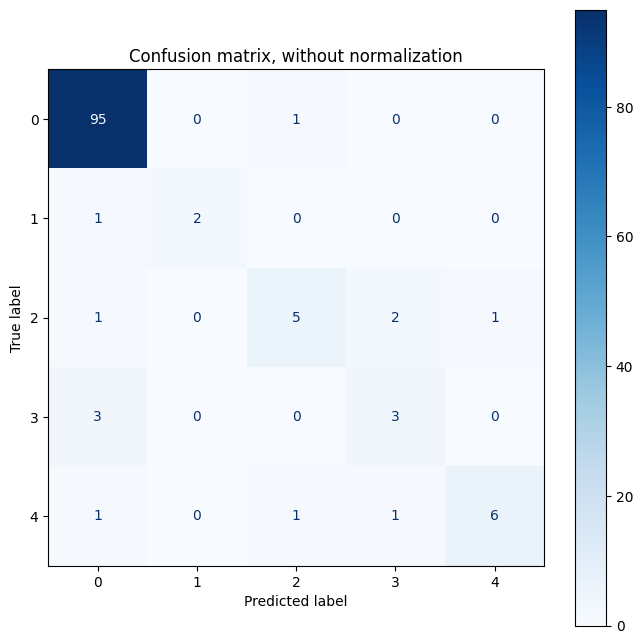

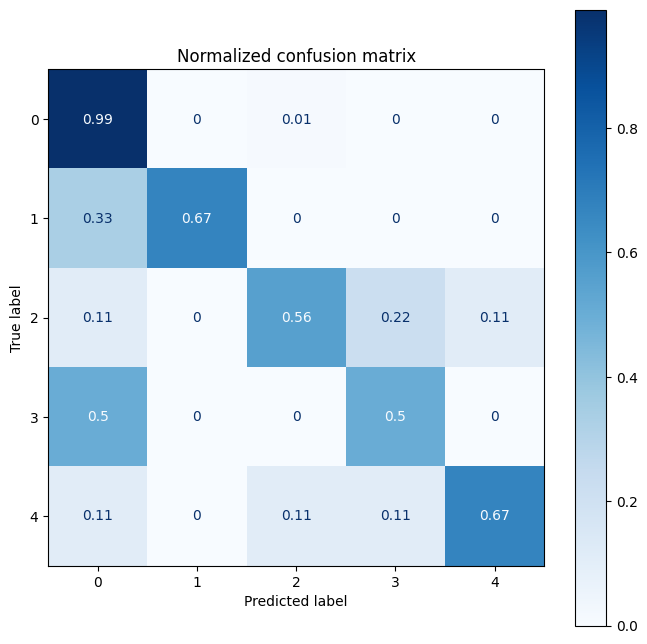

In [415]:
# save the target variable classes
class_names = le_name_map.keys()

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(8, 8))

    disp = ConfusionMatrixDisplay.from_estimator(
        model_xgb,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
        ax = ax
    )
    disp.ax_.set_title(title)
    disp.ax_.grid(False)

    print(title)
    print(disp.confusion_matrix)

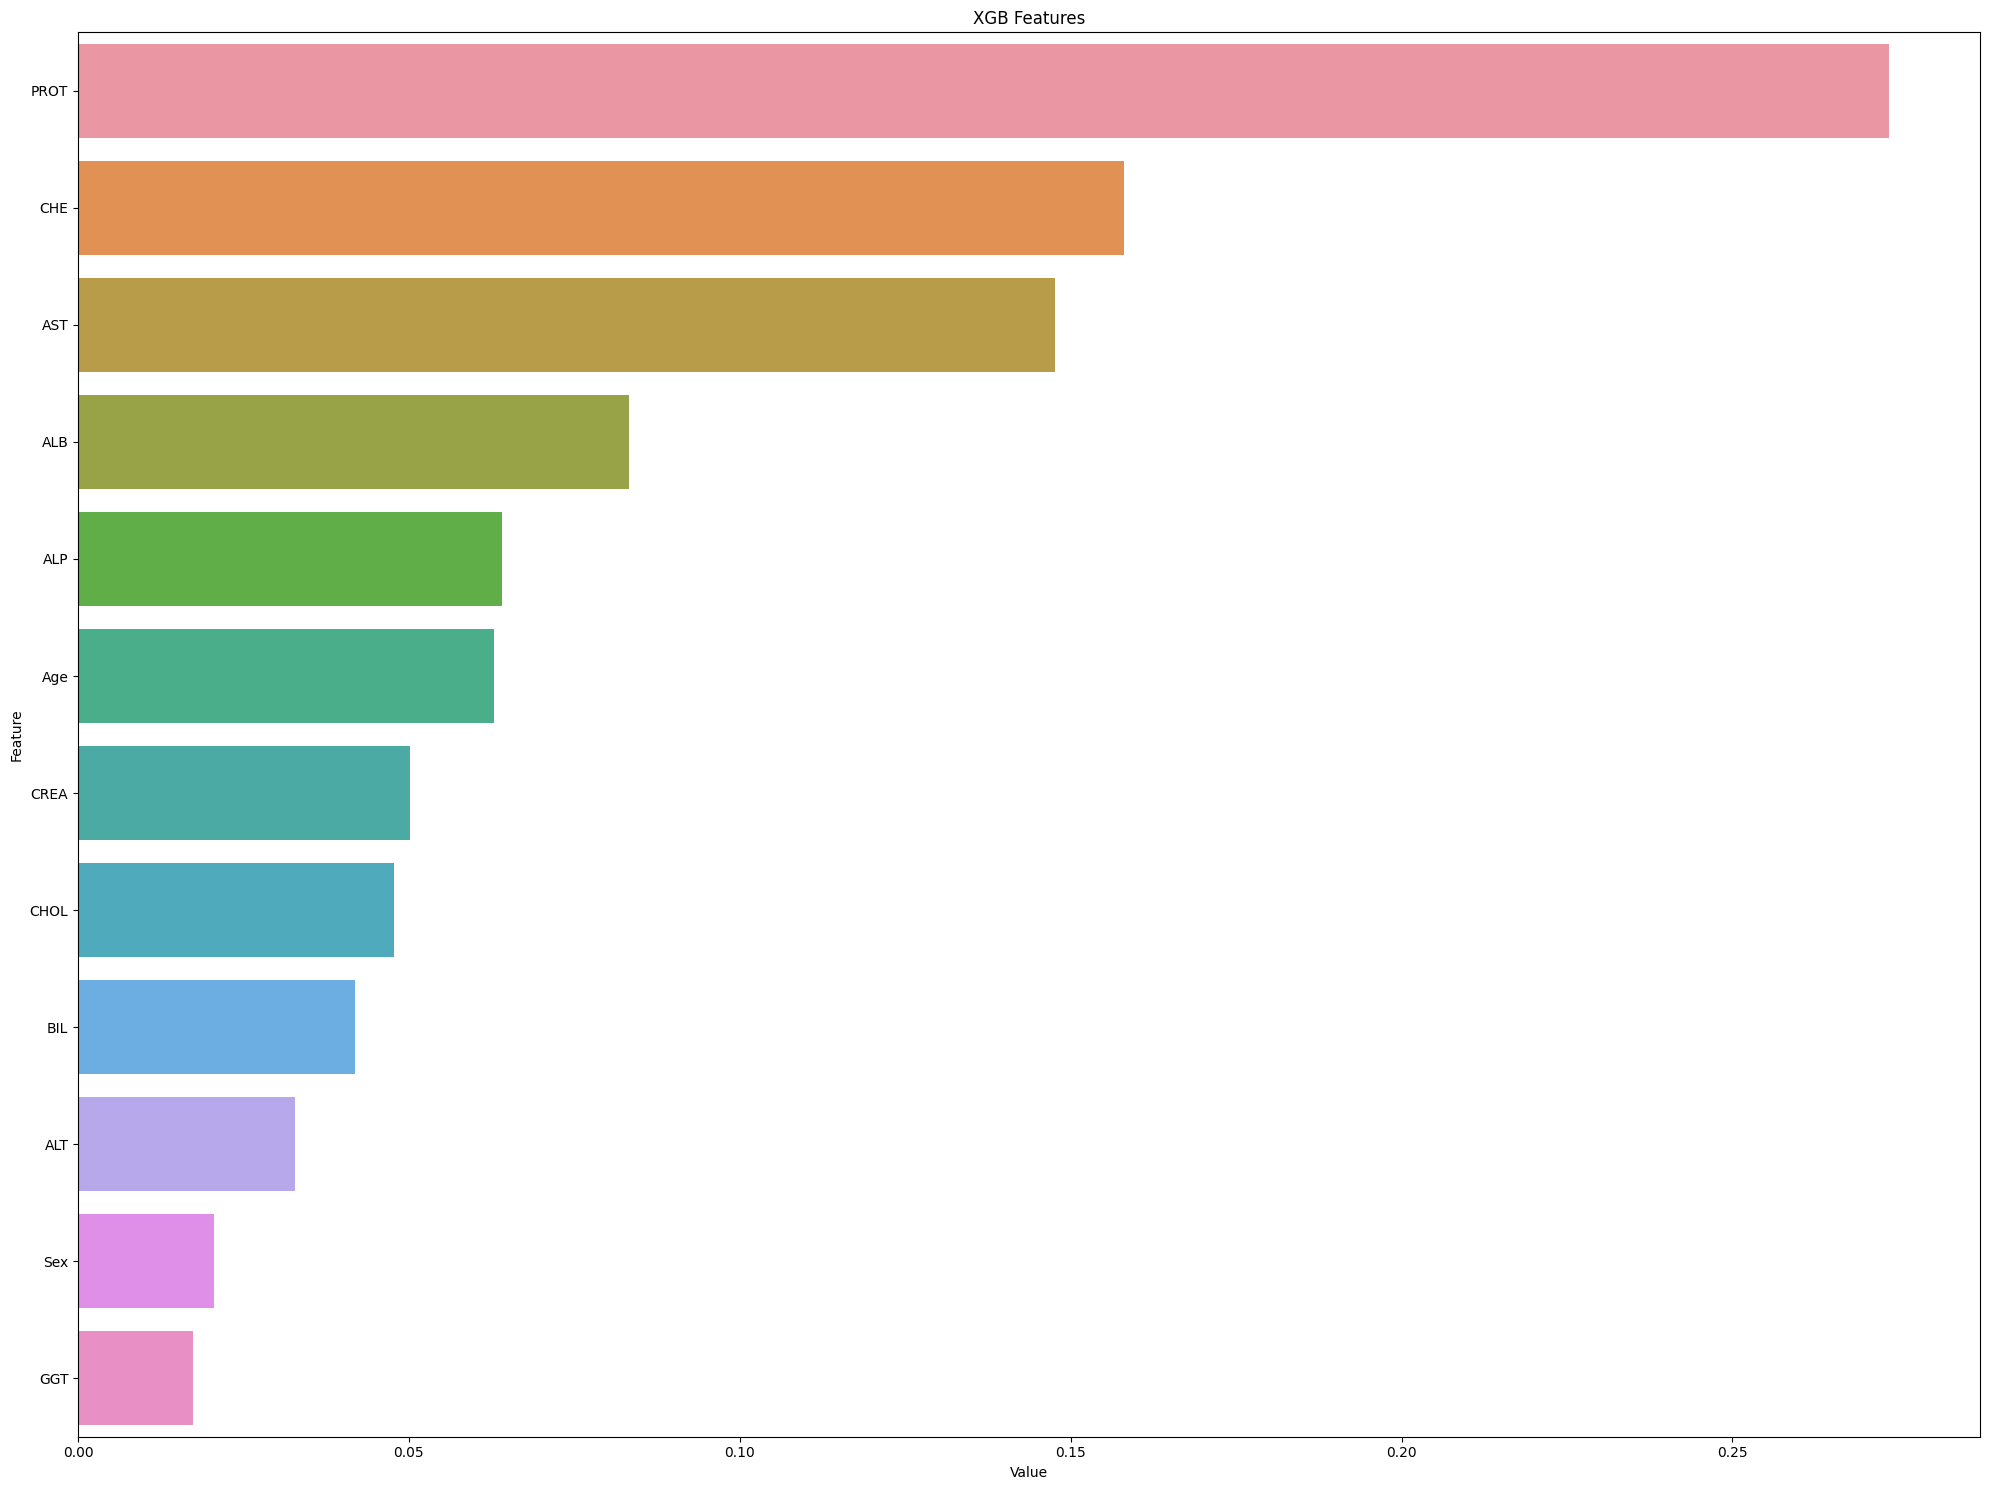

In [416]:
feature_imp = pd.DataFrame(sorted(zip(model_xgb.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('XGB Features')
plt.tight_layout()
# plt.savefig('lightgbm_fimp.png')

# XGBClassifier with Optuna

In [417]:
def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }

    # Fit the model
    optuna_model = XGBClassifier(**params)

    optuna_model.fit(X_train, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

In [418]:
study = optuna.create_study(study_name = 'xgb', direction='maximize')
study.optimize(objective, n_trials=300)

[I 2023-06-18 01:07:03,743] A new study created in memory with name: xgb
[I 2023-06-18 01:07:04,806] Trial 0 finished with value: 0.9105691056910569 and parameters: {'max_depth': 2, 'learning_rate': 0.9026539479662442, 'n_estimators': 493, 'min_child_weight': 2, 'gamma': 0.009396199475949066, 'subsample': 0.336492397239596, 'colsample_bytree': 0.20622193200663183, 'reg_alpha': 7.541816355868388e-05, 'reg_lambda': 0.001359681019815914}. Best is trial 0 with value: 0.9105691056910569.
[I 2023-06-18 01:07:05,337] Trial 1 finished with value: 0.07317073170731707 and parameters: {'max_depth': 2, 'learning_rate': 0.05228651589308127, 'n_estimators': 337, 'min_child_weight': 9, 'gamma': 1.9407865985259444e-08, 'subsample': 0.011031819560546286, 'colsample_bytree': 0.0195551392200192, 'reg_alpha': 0.00025474004039999335, 'reg_lambda': 4.4154991674115965e-07}. Best is trial 0 with value: 0.9105691056910569.
[I 2023-06-18 01:07:05,969] Trial 2 finished with value: 0.07317073170731707 and paramet

In [419]:
#without cv
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 300
Best trial:
  Value: 0.943089430894309
  Params: 
    max_depth: 4
    learning_rate: 0.1969097619840202
    n_estimators: 197
    min_child_weight: 1
    gamma: 0.09693404552771179
    subsample: 0.036768173724319515
    colsample_bytree: 0.19587409453980753
    reg_alpha: 0.41354766675033994
    reg_lambda: 0.009420448414595634


In [420]:
params = trial.params
params

{'max_depth': 4,
 'learning_rate': 0.1969097619840202,
 'n_estimators': 197,
 'min_child_weight': 1,
 'gamma': 0.09693404552771179,
 'subsample': 0.036768173724319515,
 'colsample_bytree': 0.19587409453980753,
 'reg_alpha': 0.41354766675033994,
 'reg_lambda': 0.009420448414595634}

In [421]:
#93.49
# params = {'max_depth': 8,
#           'learning_rate': 0.0401968653111479,
#           'n_estimators': 417,
#           'min_child_weight': 5,
#           'gamma': 8.62484951992736e-08,
#           'subsample': 0.3720529890025605,
#           'colsample_bytree': 0.6789848280962253,
#           'reg_alpha': 0.08090820271397661,
#           'reg_lambda': 0.0005354776011391955}
#params = trial.params
model_xgb_optuna = XGBClassifier(**params)
model_xgb_optuna.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.19587409453980753, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.09693404552771179, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1969097619840202, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=197, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [422]:
#93.49
y_pred_ = model_xgb_optuna.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_)
print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))

Accuracy after tuning: 99.04%


In [423]:
#93.49
y_pred = model_xgb_optuna.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))

Accuracy after tuning: 94.31%


In [424]:
# classification report for the train set
print(classification_report(y_train, y_pred_,digits=4))

              precision    recall  f1-score   support

           0     0.9953    0.9794    0.9873       437
           1     0.9977    1.0000    0.9989       437
           2     0.9797    0.9954    0.9875       437
           3     0.9863    0.9886    0.9874       437
           4     0.9931    0.9886    0.9908       437

    accuracy                         0.9904      2185
   macro avg     0.9904    0.9904    0.9904      2185
weighted avg     0.9904    0.9904    0.9904      2185



In [425]:
# classification report for the test set
print(classification_report(y_test, y_pred,digits=4)) #93.49

              precision    recall  f1-score   support

           0     0.9697    1.0000    0.9846        96
           1     1.0000    0.6667    0.8000         3
           2     0.8750    0.7778    0.8235         9
           3     0.5714    0.6667    0.6154         6
           4     1.0000    0.7778    0.8750         9

    accuracy                         0.9431       123
   macro avg     0.8832    0.7778    0.8197       123
weighted avg     0.9463    0.9431    0.9423       123



In [65]:
# y_pred = model_xgb_optuna.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))

In [66]:
# y_pred = model_xgb_optuna.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))

In [67]:
# print(classification_report(y_test, y_pred)) #95.12

Confusion matrix, without normalization
[[96  0  0  0  0]
 [ 1  2  0  0  0]
 [ 1  0  7  1  0]
 [ 1  0  1  4  0]
 [ 0  0  0  2  7]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.        ]
 [0.33333333 0.66666667 0.         0.         0.        ]
 [0.11111111 0.         0.77777778 0.11111111 0.        ]
 [0.16666667 0.         0.16666667 0.66666667 0.        ]
 [0.         0.         0.         0.22222222 0.77777778]]


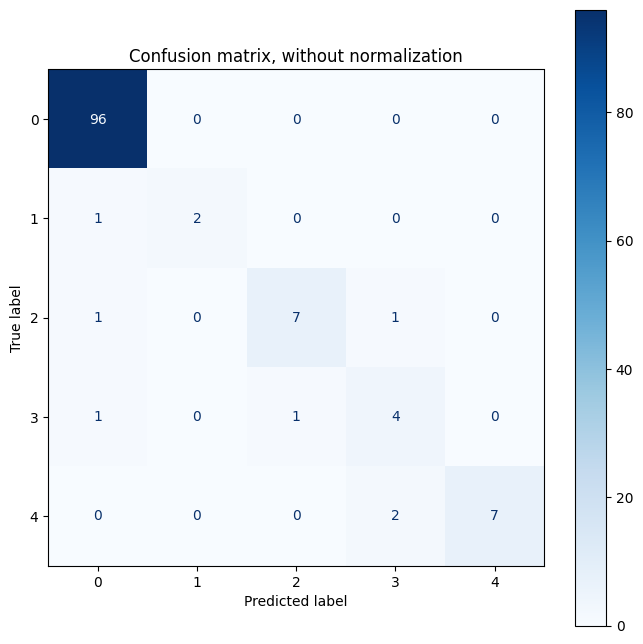

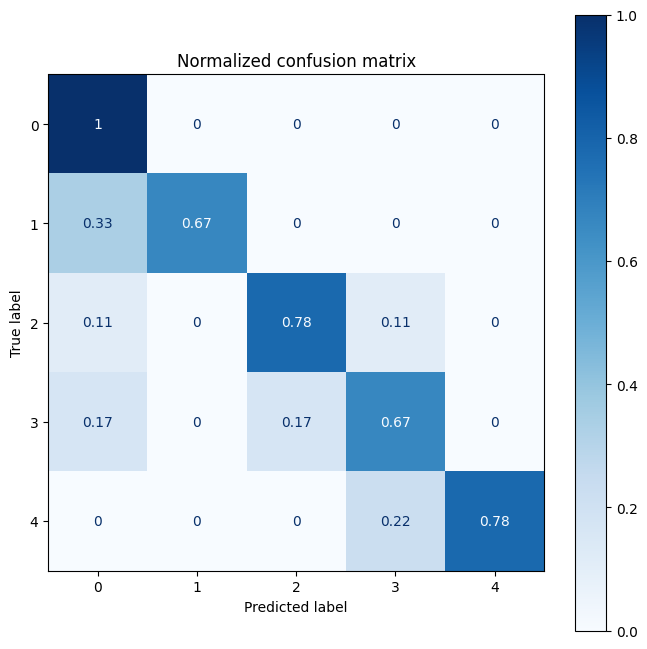

In [426]:
# save the target variable classes
class_names = le_name_map.keys()

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(8, 8))

    disp = ConfusionMatrixDisplay.from_estimator(
        model_xgb_optuna,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
        ax = ax
    )
    disp.ax_.set_title(title)
    disp.ax_.grid(False)

    print(title)
    print(disp.confusion_matrix)

In [427]:
feature_imp = pd.DataFrame(sorted(zip(model_xgb_optuna.feature_importances_,X_train.columns)), columns=['Value','Feature'])
feature_imp

,Value,Feature
0,0.043727,Sex
1,0.070667,CREA
2,0.070833,GGT
3,0.078117,CHE
4,0.082996,CHOL
5,0.083594,Age
6,0.087681,ALT
7,0.090159,BIL
8,0.091020,AST
9,0.098276,PROT


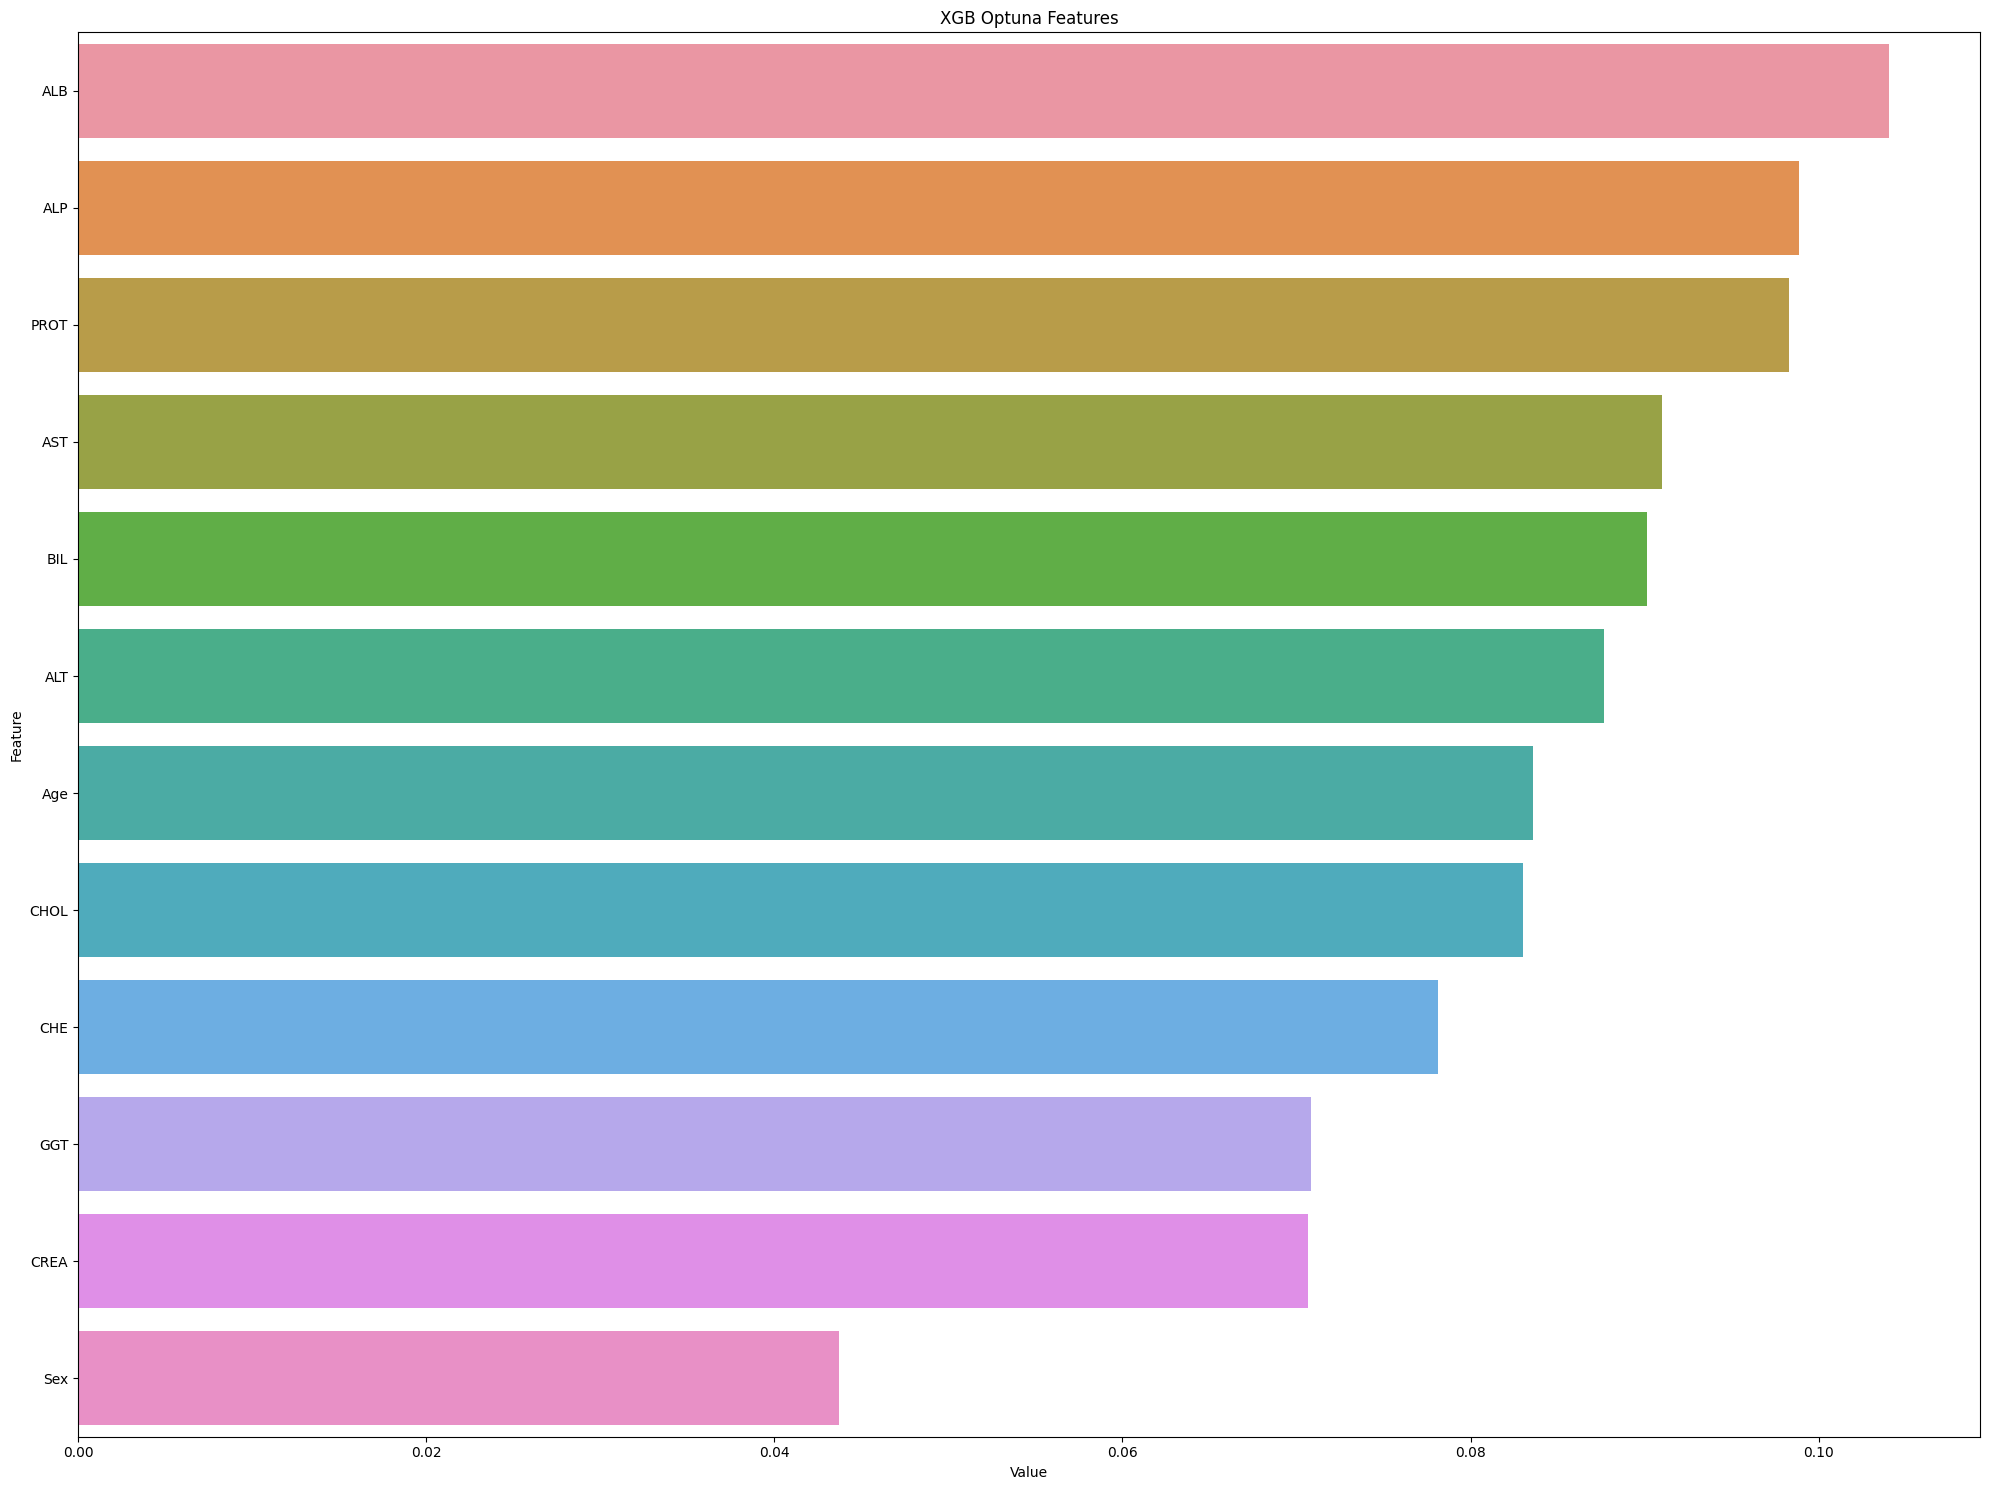

In [428]:
feature_imp = pd.DataFrame(sorted(zip(model_xgb_optuna.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('XGB Optuna Features')
plt.tight_layout()
# plt.savefig('lightgbm_fimp.png')

In [429]:
import pickle

In [485]:
file_name = '/content/drive/MyDrive/Hepatitis C Disease/my_model_XGBoost_hepatitisC_new.sav'
pickle.dump(model_xgb_optuna, open(file_name, 'wb'))

In [430]:
# file_name = '/content/drive/MyDrive/Hepatitis C Disease/my_model_hepatitisC.sav'
# pickle.dump(model_xgb_optuna, open(file_name, 'wb'))

# LGBM

In [431]:
!pip3 install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [432]:
# !pip3 install lightgbm
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.model_selection import cross_val_score
# import lightgbm as lgb

In [433]:
import lightgbm as lgb

In [434]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

LGBMClassifier()

In [435]:
y_pred_ = lgb_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_)
print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))

Accuracy after tuning: 100.00%


In [436]:
y_pred = lgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))

Accuracy after tuning: 90.24%


In [437]:
# y_pred = lgb_model.predict(X_test)
# accuracy_score(y_test, y_pred)

In [438]:
# classification report for the train set
print(classification_report(y_train, y_pred_,digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       437
           1     1.0000    1.0000    1.0000       437
           2     1.0000    1.0000    1.0000       437
           3     1.0000    1.0000    1.0000       437
           4     1.0000    1.0000    1.0000       437

    accuracy                         1.0000      2185
   macro avg     1.0000    1.0000    1.0000      2185
weighted avg     1.0000    1.0000    1.0000      2185



In [439]:
# classification report for the test set
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.9505    1.0000    0.9746        96
           1     1.0000    0.6667    0.8000         3
           2     1.0000    0.4444    0.6154         9
           3     0.3333    0.3333    0.3333         6
           4     0.7000    0.7778    0.7368         9

    accuracy                         0.9024       123
   macro avg     0.7968    0.6444    0.6920       123
weighted avg     0.9069    0.9024    0.8954       123



Confusion matrix, without normalization
[[96  0  0  0  0]
 [ 0  2  0  0  1]
 [ 0  0  4  4  1]
 [ 3  0  0  2  1]
 [ 2  0  0  0  7]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.        ]
 [0.         0.66666667 0.         0.         0.33333333]
 [0.         0.         0.44444444 0.44444444 0.11111111]
 [0.5        0.         0.         0.33333333 0.16666667]
 [0.22222222 0.         0.         0.         0.77777778]]


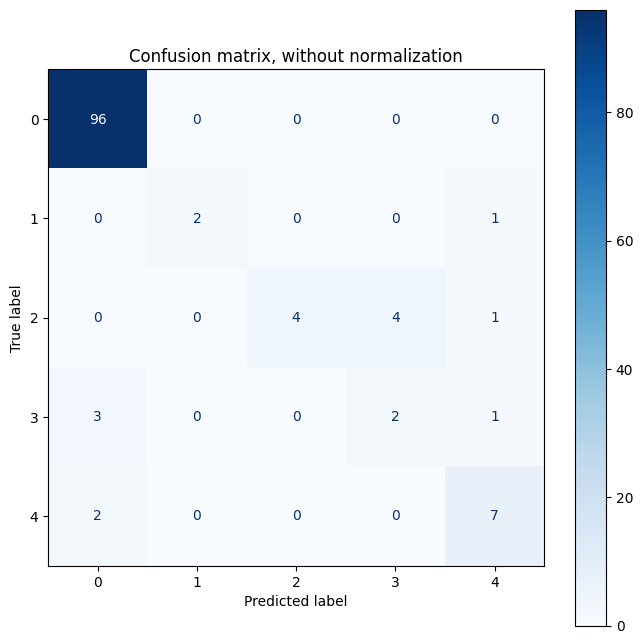

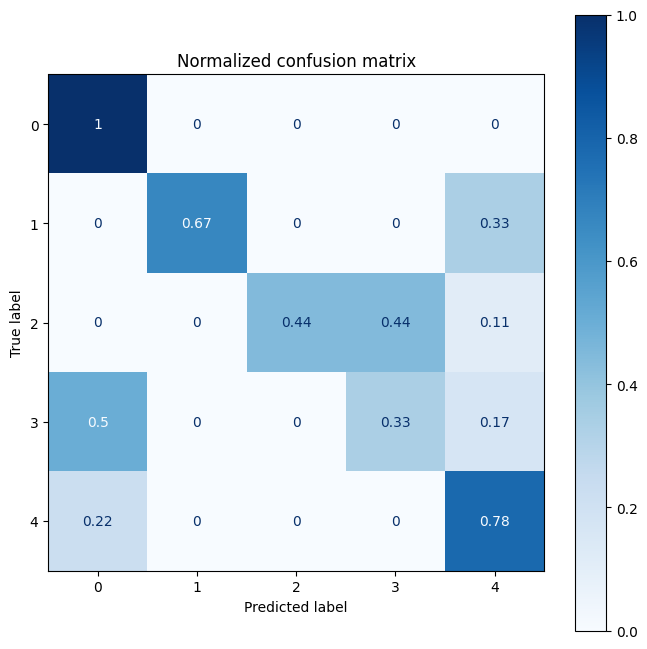

In [440]:
# save the target variable classes
class_names = le_name_map.keys()

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(8, 8))

    disp = ConfusionMatrixDisplay.from_estimator(
        lgb_model,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
        ax = ax
    )
    disp.ax_.set_title(title)
    disp.ax_.grid(False)

    print(title)
    print(disp.confusion_matrix)

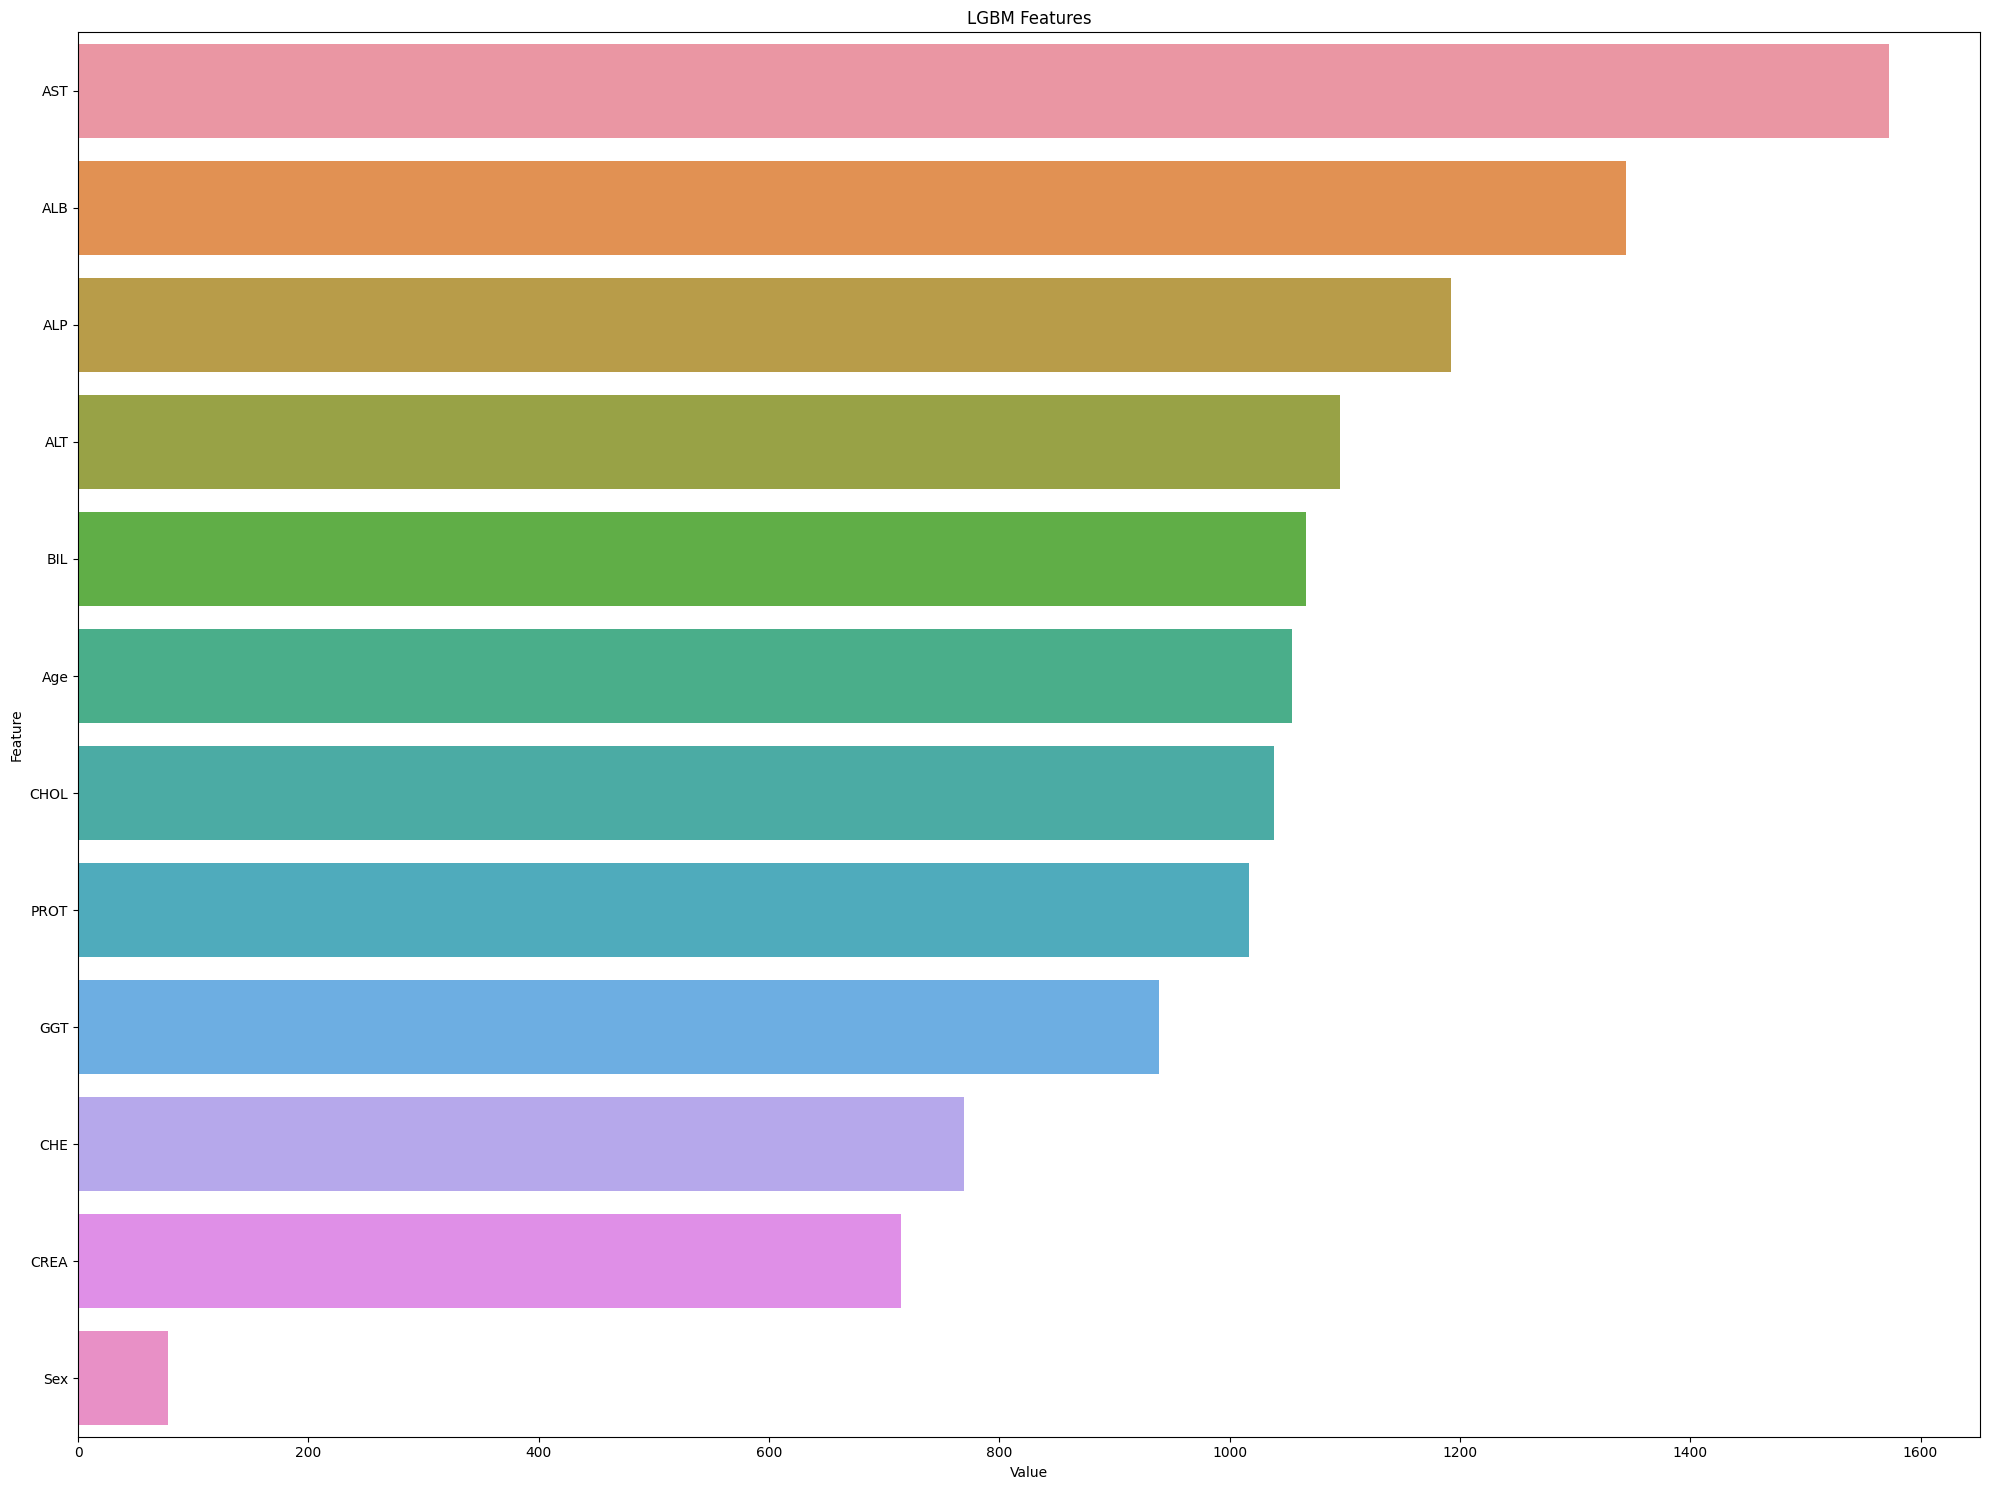

In [441]:
feature_imp = pd.DataFrame(sorted(zip(lgb_model.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LGBM Features')
plt.tight_layout()
# plt.savefig('lightgbm_fimp.png')

# LGBM with Optuna

In [442]:
def objective(trial):
    """
    Objective function to be minimized.
    """
    param = {
        "objective": "multiclass",
        "metric": "multi_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "num_class": 5,
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }
    gbm = lgb.LGBMClassifier(**param)
    gbm.fit(X_train, y_train)
    preds = gbm.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    return accuracy

In [443]:
sampler = TPESampler(seed=1)
study = optuna.create_study(study_name="lightgbm", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=300)

[I 2023-06-18 01:15:38,139] A new study created in memory with name: lightgbm


[LightGBM] [Warning] feature_fraction is set=0.5813995435791038, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5813995435791038
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.030403280126677572, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.030403280126677572
[LightGBM] [Warning] bagging_fraction is set=0.48805353449026784, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48805353449026784
[LightGBM] [Warning] lambda_l1 is set=5.6649755830282306e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.6649755830282306e-05


[I 2023-06-18 01:15:38,651] Trial 0 finished with value: 0.8943089430894309 and parameters: {'lambda_l1': 5.6649755830282306e-05, 'lambda_l2': 0.030403280126677572, 'num_leaves': 2, 'feature_fraction': 0.5813995435791038, 'bagging_fraction': 0.48805353449026784, 'bagging_freq': 1, 'min_child_samples': 22}. Best is trial 0 with value: 0.8943089430894309.


[LightGBM] [Warning] feature_fraction is set=0.6515167086419769, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6515167086419769
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.72312200494449e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.72312200494449e-05
[LightGBM] [Warning] bagging_fraction is set=0.8111317002380557, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8111317002380557
[LightGBM] [Warning] lambda_l1 is set=1.2883876209377052e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2883876209377052e-05


[I 2023-06-18 01:15:39,683] Trial 1 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 1.2883876209377052e-05, 'lambda_l2': 3.72312200494449e-05, 'num_leaves': 139, 'feature_fraction': 0.6515167086419769, 'bagging_fraction': 0.8111317002380557, 'bagging_freq': 2, 'min_child_samples': 89}. Best is trial 1 with value: 0.9105691056910569.


[LightGBM] [Warning] feature_fraction is set=0.735213897067451, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.735213897067451
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.010819509974097813, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010819509974097813
[LightGBM] [Warning] bagging_fraction is set=0.4842321631571403, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4842321631571403
[LightGBM] [Warning] lambda_l1 is set=1.763958399884789e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.763958399884789e-08


[I 2023-06-18 01:15:40,983] Trial 2 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 1.763958399884789e-08, 'lambda_l2': 0.010819509974097813, 'num_leaves': 108, 'feature_fraction': 0.735213897067451, 'bagging_fraction': 0.4842321631571403, 'bagging_freq': 2, 'min_child_samples': 81}. Best is trial 1 with value: 0.9105691056910569.


[LightGBM] [Warning] feature_fraction is set=0.9258334913776229, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9258334913776229
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=6.6193844201488494e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.6193844201488494e-06
[LightGBM] [Warning] bagging_fraction is set=0.9367639981023084, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9367639981023084
[LightGBM] [Warning] lambda_l1 is set=5.180291295699627, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.180291295699627


[I 2023-06-18 01:15:46,433] Trial 3 finished with value: 0.8861788617886179 and parameters: {'lambda_l1': 5.180291295699627, 'lambda_l2': 6.6193844201488494e-06, 'num_leaves': 178, 'feature_fraction': 0.9258334913776229, 'bagging_fraction': 0.9367639981023084, 'bagging_freq': 1, 'min_child_samples': 8}. Best is trial 1 with value: 0.9105691056910569.


[LightGBM] [Warning] feature_fraction is set=0.6526645750030313, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6526645750030313
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.8003547575557912, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8003547575557912
[LightGBM] [Warning] bagging_fraction is set=0.9747337180903012, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9747337180903012
[LightGBM] [Warning] lambda_l1 is set=3.376554594427989e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.376554594427989e-07


[I 2023-06-18 01:15:48,185] Trial 4 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 3.376554594427989e-07, 'lambda_l2': 0.8003547575557912, 'num_leaves': 27, 'feature_fraction': 0.6526645750030313, 'bagging_fraction': 0.9747337180903012, 'bagging_freq': 4, 'min_child_samples': 71}. Best is trial 1 with value: 0.9105691056910569.


[LightGBM] [Warning] feature_fraction is set=0.4109729664065151, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4109729664065151
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.015083716080906013, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.015083716080906013
[LightGBM] [Warning] bagging_fraction is set=0.8500865889669804, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8500865889669804
[LightGBM] [Warning] lambda_l1 is set=6.912588094940543e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.912588094940543e-06


[I 2023-06-18 01:15:49,188] Trial 5 finished with value: 0.8943089430894309 and parameters: {'lambda_l1': 6.912588094940543e-06, 'lambda_l2': 0.015083716080906013, 'num_leaves': 214, 'feature_fraction': 0.4109729664065151, 'bagging_fraction': 0.8500865889669804, 'bagging_freq': 7, 'min_child_samples': 76}. Best is trial 1 with value: 0.9105691056910569.


[LightGBM] [Warning] feature_fraction is set=0.6687361157055431, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6687361157055431
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.12691529280491062, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12691529280491062
[LightGBM] [Warning] bagging_fraction is set=0.9451573018558573, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9451573018558573
[LightGBM] [Warning] lambda_l1 is set=3.341919070318744e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.341919070318744e-06


[I 2023-06-18 01:15:51,858] Trial 6 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 3.341919070318744e-06, 'lambda_l2': 0.12691529280491062, 'num_leaves': 28, 'feature_fraction': 0.6687361157055431, 'bagging_fraction': 0.9451573018558573, 'bagging_freq': 3, 'min_child_samples': 32}. Best is trial 1 with value: 0.9105691056910569.


[LightGBM] [Warning] feature_fraction is set=0.5269768696000354, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5269768696000354
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.493834966470408e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.493834966470408e-08
[LightGBM] [Warning] bagging_fraction is set=0.5593279956233357, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5593279956233357
[LightGBM] [Warning] lambda_l1 is set=1.4799844388224288e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4799844388224288e-07


[I 2023-06-18 01:15:57,213] Trial 7 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 1.4799844388224288e-07, 'lambda_l2': 1.493834966470408e-08, 'num_leaves': 175, 'feature_fraction': 0.5269768696000354, 'bagging_fraction': 0.5593279956233357, 'bagging_freq': 4, 'min_child_samples': 10}. Best is trial 1 with value: 0.9105691056910569.


[LightGBM] [Warning] feature_fraction is set=0.8198550160125587, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8198550160125587
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=2.091978294467618e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.091978294467618e-07
[LightGBM] [Warning] bagging_fraction is set=0.46140065729669555, subsample=1.0 will be ignored. Current value: bagging_fraction=0.46140065729669555
[LightGBM] [Warning] lambda_l1 is set=0.0014691239860705116, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014691239860705116


[I 2023-06-18 01:16:02,468] Trial 8 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 0.0014691239860705116, 'lambda_l2': 2.091978294467618e-07, 'num_leaves': 152, 'feature_fraction': 0.8198550160125587, 'bagging_fraction': 0.46140065729669555, 'bagging_freq': 3, 'min_child_samples': 71}. Best is trial 1 with value: 0.9105691056910569.


[LightGBM] [Warning] feature_fraction is set=0.7982767871318732, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7982767871318732
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=2.8156659603215856e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8156659603215856e-08
[LightGBM] [Warning] bagging_fraction is set=0.7089334672349852, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7089334672349852
[LightGBM] [Warning] lambda_l1 is set=5.340887446119036e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.340887446119036e-05


[I 2023-06-18 01:16:05,045] Trial 9 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 5.340887446119036e-05, 'lambda_l2': 2.8156659603215856e-08, 'num_leaves': 138, 'feature_fraction': 0.7982767871318732, 'bagging_fraction': 0.7089334672349852, 'bagging_freq': 7, 'min_child_samples': 61}. Best is trial 1 with value: 0.9105691056910569.


[LightGBM] [Warning] feature_fraction is set=0.9925937090708492, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9925937090708492
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.00011671896648113094, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00011671896648113094
[LightGBM] [Warning] bagging_fraction is set=0.7571650099530449, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7571650099530449
[LightGBM] [Warning] lambda_l1 is set=0.004454924752485826, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004454924752485826


[I 2023-06-18 01:16:06,272] Trial 10 finished with value: 0.8943089430894309 and parameters: {'lambda_l1': 0.004454924752485826, 'lambda_l2': 0.00011671896648113094, 'num_leaves': 83, 'feature_fraction': 0.9925937090708492, 'bagging_fraction': 0.7571650099530449, 'bagging_freq': 6, 'min_child_samples': 92}. Best is trial 1 with value: 0.9105691056910569.


[LightGBM] [Warning] feature_fraction is set=0.65017632846019, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.65017632846019
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.00013871569811411266, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00013871569811411266
[LightGBM] [Warning] bagging_fraction is set=0.8573679084176953, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8573679084176953
[LightGBM] [Warning] lambda_l1 is set=1.9379048385844075e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9379048385844075e-06


[I 2023-06-18 01:16:10,537] Trial 11 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 1.9379048385844075e-06, 'lambda_l2': 0.00013871569811411266, 'num_leaves': 63, 'feature_fraction': 0.65017632846019, 'bagging_fraction': 0.8573679084176953, 'bagging_freq': 3, 'min_child_samples': 47}. Best is trial 1 with value: 0.9105691056910569.


[LightGBM] [Warning] feature_fraction is set=0.7217525427370965, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7217525427370965
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.014415325860934, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.014415325860934
[LightGBM] [Warning] bagging_fraction is set=0.996775506576717, subsample=1.0 will be ignored. Current value: bagging_fraction=0.996775506576717
[LightGBM] [Warning] lambda_l1 is set=5.34348716152025e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.34348716152025e-06


[I 2023-06-18 01:16:11,966] Trial 12 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 5.34348716152025e-06, 'lambda_l2': 6.014415325860934, 'num_leaves': 235, 'feature_fraction': 0.7217525427370965, 'bagging_fraction': 0.996775506576717, 'bagging_freq': 2, 'min_child_samples': 39}. Best is trial 1 with value: 0.9105691056910569.


[LightGBM] [Warning] feature_fraction is set=0.5565460177587117, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5565460177587117
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.0223029224379178e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0223029224379178e-05
[LightGBM] [Warning] bagging_fraction is set=0.8532354135796232, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8532354135796232
[LightGBM] [Warning] lambda_l1 is set=3.1554554397498345e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.1554554397498345e-08


[I 2023-06-18 01:16:17,458] Trial 13 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 3.1554554397498345e-08, 'lambda_l2': 1.0223029224379178e-05, 'num_leaves': 58, 'feature_fraction': 0.5565460177587117, 'bagging_fraction': 0.8532354135796232, 'bagging_freq': 5, 'min_child_samples': 36}. Best is trial 1 with value: 0.9105691056910569.


[LightGBM] [Warning] feature_fraction is set=0.6470873983243278, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6470873983243278
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.0019099166527460144, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0019099166527460144
[LightGBM] [Warning] bagging_fraction is set=0.7687611898372699, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7687611898372699
[LightGBM] [Warning] lambda_l1 is set=0.00022117781355932714, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00022117781355932714


[I 2023-06-18 01:16:20,154] Trial 14 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 0.00022117781355932714, 'lambda_l2': 0.0019099166527460144, 'num_leaves': 100, 'feature_fraction': 0.6470873983243278, 'bagging_fraction': 0.7687611898372699, 'bagging_freq': 3, 'min_child_samples': 94}. Best is trial 1 with value: 0.9105691056910569.


[LightGBM] [Warning] feature_fraction is set=0.7775490349970883, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7775490349970883
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.20114681966801765, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20114681966801765
[LightGBM] [Warning] bagging_fraction is set=0.6186165201050345, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6186165201050345
[LightGBM] [Warning] lambda_l1 is set=6.631854360996013e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.631854360996013e-07


[I 2023-06-18 01:16:22,075] Trial 15 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 6.631854360996013e-07, 'lambda_l2': 0.20114681966801765, 'num_leaves': 39, 'feature_fraction': 0.7775490349970883, 'bagging_fraction': 0.6186165201050345, 'bagging_freq': 2, 'min_child_samples': 23}. Best is trial 15 with value: 0.9186991869918699.


[LightGBM] [Warning] feature_fraction is set=0.8558583741821317, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8558583741821317
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0010909241970327706, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0010909241970327706
[LightGBM] [Warning] bagging_fraction is set=0.6230390639898936, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6230390639898936
[LightGBM] [Warning] lambda_l1 is set=3.465301475183191e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.465301475183191e-07


[I 2023-06-18 01:16:23,409] Trial 16 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 3.465301475183191e-07, 'lambda_l2': 0.0010909241970327706, 'num_leaves': 121, 'feature_fraction': 0.8558583741821317, 'bagging_fraction': 0.6230390639898936, 'bagging_freq': 2, 'min_child_samples': 57}. Best is trial 15 with value: 0.9186991869918699.


[LightGBM] [Warning] feature_fraction is set=0.7819210409603012, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7819210409603012
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.4070971490754624, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4070971490754624
[LightGBM] [Warning] bagging_fraction is set=0.6264189801076347, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6264189801076347
[LightGBM] [Warning] lambda_l1 is set=1.2348939116317215e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2348939116317215e-08


[I 2023-06-18 01:16:24,794] Trial 17 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.2348939116317215e-08, 'lambda_l2': 0.4070971490754624, 'num_leaves': 168, 'feature_fraction': 0.7819210409603012, 'bagging_fraction': 0.6264189801076347, 'bagging_freq': 1, 'min_child_samples': 24}. Best is trial 15 with value: 0.9186991869918699.


[LightGBM] [Warning] feature_fraction is set=0.787837177105571, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.787837177105571
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.6292071037277223, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6292071037277223
[LightGBM] [Warning] bagging_fraction is set=0.6500744051398671, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6500744051398671
[LightGBM] [Warning] lambda_l1 is set=1.4246409690460757e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4246409690460757e-08


[I 2023-06-18 01:16:25,595] Trial 18 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 1.4246409690460757e-08, 'lambda_l2': 0.6292071037277223, 'num_leaves': 185, 'feature_fraction': 0.787837177105571, 'bagging_fraction': 0.6500744051398671, 'bagging_freq': 1, 'min_child_samples': 19}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.8777225253120567, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8777225253120567
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=8.512689721850974, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.512689721850974
[LightGBM] [Warning] bagging_fraction is set=0.6670409142592798, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6670409142592798
[LightGBM] [Warning] lambda_l1 is set=1.0127530701910712e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0127530701910712e-07


[I 2023-06-18 01:16:26,031] Trial 19 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 1.0127530701910712e-07, 'lambda_l2': 8.512689721850974, 'num_leaves': 203, 'feature_fraction': 0.8777225253120567, 'bagging_fraction': 0.6670409142592798, 'bagging_freq': 1, 'min_child_samples': 16}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.7507056926060659, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7507056926060659
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.3812102556374575, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3812102556374575
[LightGBM] [Warning] bagging_fraction is set=0.4001377827470478, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4001377827470478
[LightGBM] [Warning] lambda_l1 is set=8.848018491524542e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.848018491524542e-07


[I 2023-06-18 01:16:26,326] Trial 20 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 8.848018491524542e-07, 'lambda_l2': 1.3812102556374575, 'num_leaves': 241, 'feature_fraction': 0.7507056926060659, 'bagging_fraction': 0.4001377827470478, 'bagging_freq': 5, 'min_child_samples': 48}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.7658164138178464, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7658164138178464
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.0837486793067437, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0837486793067437
[LightGBM] [Warning] bagging_fraction is set=0.406761576936488, subsample=1.0 will be ignored. Current value: bagging_fraction=0.406761576936488
[LightGBM] [Warning] lambda_l1 is set=6.288791264766136e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.288791264766136e-07


[I 2023-06-18 01:16:26,647] Trial 21 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 6.288791264766136e-07, 'lambda_l2': 1.0837486793067437, 'num_leaves': 251, 'feature_fraction': 0.7658164138178464, 'bagging_fraction': 0.406761576936488, 'bagging_freq': 5, 'min_child_samples': 45}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.7412690125970802, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7412690125970802
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.5658554888221687, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5658554888221687
[LightGBM] [Warning] bagging_fraction is set=0.43090137713561605, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43090137713561605
[LightGBM] [Warning] lambda_l1 is set=1.0978369226436334e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0978369226436334e-08


[I 2023-06-18 01:16:26,970] Trial 22 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 1.0978369226436334e-08, 'lambda_l2': 1.5658554888221687, 'num_leaves': 256, 'feature_fraction': 0.7412690125970802, 'bagging_fraction': 0.43090137713561605, 'bagging_freq': 5, 'min_child_samples': 47}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.8360390835843867, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8360390835843867
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=2.1752063950413056, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1752063950413056
[LightGBM] [Warning] bagging_fraction is set=0.40603032519593835, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40603032519593835
[LightGBM] [Warning] lambda_l1 is set=9.727731163263994e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.727731163263994e-08


[I 2023-06-18 01:16:27,288] Trial 23 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 9.727731163263994e-08, 'lambda_l2': 2.1752063950413056, 'num_leaves': 253, 'feature_fraction': 0.8360390835843867, 'bagging_fraction': 0.40603032519593835, 'bagging_freq': 5, 'min_child_samples': 44}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.7592975186123951, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7592975186123951
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.13044226023511288, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13044226023511288
[LightGBM] [Warning] bagging_fraction is set=0.5423027444810916, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5423027444810916
[LightGBM] [Warning] lambda_l1 is set=7.679037017951938e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.679037017951938e-07


[I 2023-06-18 01:16:27,635] Trial 24 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 7.679037017951938e-07, 'lambda_l2': 0.13044226023511288, 'num_leaves': 213, 'feature_fraction': 0.7592975186123951, 'bagging_fraction': 0.5423027444810916, 'bagging_freq': 6, 'min_child_samples': 62}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.7175102990598056, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7175102990598056
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=7.538959183770321, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.538959183770321
[LightGBM] [Warning] bagging_fraction is set=0.41098784014705014, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41098784014705014
[LightGBM] [Warning] lambda_l1 is set=7.70764354786588e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.70764354786588e-08


[I 2023-06-18 01:16:27,953] Trial 25 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 7.70764354786588e-08, 'lambda_l2': 7.538959183770321, 'num_leaves': 234, 'feature_fraction': 0.7175102990598056, 'bagging_fraction': 0.41098784014705014, 'bagging_freq': 6, 'min_child_samples': 29}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.7994135136304457, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7994135136304457
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.8487882476833392, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8487882476833392
[LightGBM] [Warning] bagging_fraction is set=0.4011104448807995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4011104448807995
[LightGBM] [Warning] lambda_l1 is set=5.800395970311268e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.800395970311268e-08


[I 2023-06-18 01:16:28,262] Trial 26 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 5.800395970311268e-08, 'lambda_l2': 0.8487882476833392, 'num_leaves': 197, 'feature_fraction': 0.7994135136304457, 'bagging_fraction': 0.4011104448807995, 'bagging_freq': 5, 'min_child_samples': 53}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.8616211261834247, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8616211261834247
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.04826748019074356, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04826748019074356
[LightGBM] [Warning] bagging_fraction is set=0.5090733461166528, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5090733461166528
[LightGBM] [Warning] lambda_l1 is set=6.175052296870286e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.175052296870286e-07


[I 2023-06-18 01:16:28,692] Trial 27 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 6.175052296870286e-07, 'lambda_l2': 0.04826748019074356, 'num_leaves': 235, 'feature_fraction': 0.8616211261834247, 'bagging_fraction': 0.5090733461166528, 'bagging_freq': 4, 'min_child_samples': 40}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.6959859086193826, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6959859086193826
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.33852299303611527, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.33852299303611527
[LightGBM] [Warning] bagging_fraction is set=0.45787649597998825, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45787649597998825
[LightGBM] [Warning] lambda_l1 is set=1.906706371612671e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.906706371612671e-06


[I 2023-06-18 01:16:29,090] Trial 28 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 1.906706371612671e-06, 'lambda_l2': 0.33852299303611527, 'num_leaves': 229, 'feature_fraction': 0.6959859086193826, 'bagging_fraction': 0.45787649597998825, 'bagging_freq': 6, 'min_child_samples': 14}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.7665308801438957, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7665308801438957
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.03990574174322415, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03990574174322415
[LightGBM] [Warning] bagging_fraction is set=0.5070624693041279, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5070624693041279
[LightGBM] [Warning] lambda_l1 is set=3.444864549788374e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.444864549788374e-08


[I 2023-06-18 01:16:29,621] Trial 29 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 3.444864549788374e-08, 'lambda_l2': 0.03990574174322415, 'num_leaves': 191, 'feature_fraction': 0.7665308801438957, 'bagging_fraction': 0.5070624693041279, 'bagging_freq': 4, 'min_child_samples': 5}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.8979890665898747, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8979890665898747
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=2.415429659239267, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.415429659239267
[LightGBM] [Warning] bagging_fraction is set=0.4452016922858619, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4452016922858619
[LightGBM] [Warning] lambda_l1 is set=2.7860303312311446e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7860303312311446e-05


[I 2023-06-18 01:16:34,093] Trial 30 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 2.7860303312311446e-05, 'lambda_l2': 2.415429659239267, 'num_leaves': 221, 'feature_fraction': 0.8979890665898747, 'bagging_fraction': 0.4452016922858619, 'bagging_freq': 5, 'min_child_samples': 29}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.805015442723271, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.805015442723271
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.21279253841283524, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.21279253841283524
[LightGBM] [Warning] bagging_fraction is set=0.5643044954637384, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5643044954637384
[LightGBM] [Warning] lambda_l1 is set=3.259671913336785e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.259671913336785e-07


[I 2023-06-18 01:16:34,494] Trial 31 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 3.259671913336785e-07, 'lambda_l2': 0.21279253841283524, 'num_leaves': 254, 'feature_fraction': 0.805015442723271, 'bagging_fraction': 0.5643044954637384, 'bagging_freq': 1, 'min_child_samples': 21}. Best is trial 18 with value: 0.926829268292683.
[I 2023-06-18 01:16:34,746] Trial 32 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 9.81006658580273e-07, 'lambda_l2': 0.7737357495973549, 'num_leaves': 4, 'feature_fraction': 0.769917718203898, 'bagging_fraction': 0.5877520768461129, 'bagging_freq': 2, 'min_child_samples': 20}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.769917718203898, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.769917718203898
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.7737357495973549, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7737357495973549
[LightGBM] [Warning] bagging_fraction is set=0.5877520768461129, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5877520768461129
[LightGBM] [Warning] lambda_l1 is set=9.81006658580273e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.81006658580273e-07
[LightGBM] [Warning] feature_fraction is set=0.8224922098990209, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8224922098990209
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.07822377640837486, r

[I 2023-06-18 01:16:35,140] Trial 33 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.5379394563170445e-05, 'lambda_l2': 0.07822377640837486, 'num_leaves': 160, 'feature_fraction': 0.8224922098990209, 'bagging_fraction': 0.5189264165669488, 'bagging_freq': 1, 'min_child_samples': 33}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.7567431534165167, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7567431534165167
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.30744064290069617, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.30744064290069617
[LightGBM] [Warning] bagging_fraction is set=0.47979602581952996, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47979602581952996
[LightGBM] [Warning] lambda_l1 is set=2.1008999632456363e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1008999632456363e-07


[I 2023-06-18 01:16:35,521] Trial 34 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 2.1008999632456363e-07, 'lambda_l2': 0.30744064290069617, 'num_leaves': 191, 'feature_fraction': 0.7567431534165167, 'bagging_fraction': 0.47979602581952996, 'bagging_freq': 2, 'min_child_samples': 26}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.7036787079993434, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7036787079993434
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.02020020384566988, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02020020384566988
[LightGBM] [Warning] bagging_fraction is set=0.44347010276531085, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44347010276531085
[LightGBM] [Warning] lambda_l1 is set=3.12172073487632e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.12172073487632e-08


[I 2023-06-18 01:16:35,913] Trial 35 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 3.12172073487632e-08, 'lambda_l2': 0.02020020384566988, 'num_leaves': 244, 'feature_fraction': 0.7036787079993434, 'bagging_fraction': 0.44347010276531085, 'bagging_freq': 5, 'min_child_samples': 52}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.7462085933722229, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7462085933722229
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.007435735985940913, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.007435735985940913
[LightGBM] [Warning] bagging_fraction is set=0.48436213117818516, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48436213117818516
[LightGBM] [Warning] lambda_l1 is set=1.3268834993022962e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3268834993022962e-06


[I 2023-06-18 01:16:36,234] Trial 36 finished with value: 0.8943089430894309 and parameters: {'lambda_l1': 1.3268834993022962e-06, 'lambda_l2': 0.007435735985940913, 'num_leaves': 207, 'feature_fraction': 0.7462085933722229, 'bagging_fraction': 0.48436213117818516, 'bagging_freq': 4, 'min_child_samples': 84}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.8290097149096802, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8290097149096802
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.7937974585885257, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7937974585885257
[LightGBM] [Warning] bagging_fraction is set=0.5320646726609932, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5320646726609932
[LightGBM] [Warning] lambda_l1 is set=9.488471682531144e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.488471682531144e-06


[I 2023-06-18 01:16:36,683] Trial 37 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 9.488471682531144e-06, 'lambda_l2': 1.7937974585885257, 'num_leaves': 148, 'feature_fraction': 0.8290097149096802, 'bagging_fraction': 0.5320646726609932, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.6779102247386313, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6779102247386313
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.0691257588432643, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0691257588432643
[LightGBM] [Warning] bagging_fraction is set=0.5932161866817637, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5932161866817637
[LightGBM] [Warning] lambda_l1 is set=2.5813421413524944e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5813421413524944e-07


[I 2023-06-18 01:16:37,018] Trial 38 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 2.5813421413524944e-07, 'lambda_l2': 0.0691257588432643, 'num_leaves': 187, 'feature_fraction': 0.6779102247386313, 'bagging_fraction': 0.5932161866817637, 'bagging_freq': 1, 'min_child_samples': 64}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.78766567934454, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.78766567934454
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.20538658276321406, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20538658276321406
[LightGBM] [Warning] bagging_fraction is set=0.4766744223755588, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4766744223755588
[LightGBM] [Warning] lambda_l1 is set=1.1144764061419137e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1144764061419137e-08


[I 2023-06-18 01:16:37,374] Trial 39 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.1144764061419137e-08, 'lambda_l2': 0.20538658276321406, 'num_leaves': 220, 'feature_fraction': 0.78766567934454, 'bagging_fraction': 0.4766744223755588, 'bagging_freq': 4, 'min_child_samples': 38}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.7223118346620553, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7223118346620553
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.007306072121421825, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.007306072121421825
[LightGBM] [Warning] bagging_fraction is set=0.6765812072803409, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6765812072803409
[LightGBM] [Warning] lambda_l1 is set=4.1492077942972545e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.1492077942972545e-06


[I 2023-06-18 01:16:37,898] Trial 40 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 4.1492077942972545e-06, 'lambda_l2': 0.007306072121421825, 'num_leaves': 44, 'feature_fraction': 0.7223118346620553, 'bagging_fraction': 0.6765812072803409, 'bagging_freq': 6, 'min_child_samples': 18}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.7825100118077213, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7825100118077213
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.4225492718109487, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4225492718109487
[LightGBM] [Warning] bagging_fraction is set=0.6159645563834555, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6159645563834555
[LightGBM] [Warning] lambda_l1 is set=1.9578005942861987e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9578005942861987e-08


[I 2023-06-18 01:16:38,285] Trial 41 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.9578005942861987e-08, 'lambda_l2': 0.4225492718109487, 'num_leaves': 170, 'feature_fraction': 0.7825100118077213, 'bagging_fraction': 0.6159645563834555, 'bagging_freq': 1, 'min_child_samples': 29}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.7838797813012444, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7838797813012444
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.760702065199791, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.760702065199791
[LightGBM] [Warning] bagging_fraction is set=0.6372476463367743, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6372476463367743
[LightGBM] [Warning] lambda_l1 is set=5.240886045765141e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.240886045765141e-08


[I 2023-06-18 01:16:38,709] Trial 42 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 5.240886045765141e-08, 'lambda_l2': 0.760702065199791, 'num_leaves': 124, 'feature_fraction': 0.7838797813012444, 'bagging_fraction': 0.6372476463367743, 'bagging_freq': 1, 'min_child_samples': 26}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.8381976436366183, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8381976436366183
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.5227220566335906, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.5227220566335906
[LightGBM] [Warning] bagging_fraction is set=0.5651098078402337, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5651098078402337
[LightGBM] [Warning] lambda_l1 is set=1.6947517842464473e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6947517842464473e-07


[I 2023-06-18 01:16:39,126] Trial 43 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.6947517842464473e-07, 'lambda_l2': 3.5227220566335906, 'num_leaves': 163, 'feature_fraction': 0.8381976436366183, 'bagging_fraction': 0.5651098078402337, 'bagging_freq': 2, 'min_child_samples': 10}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.7472876142987727, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7472876142987727
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.7033183572929724, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7033183572929724
[LightGBM] [Warning] bagging_fraction is set=0.7050852814606429, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7050852814606429
[LightGBM] [Warning] lambda_l1 is set=1.1953603734885567e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1953603734885567e-08


[I 2023-06-18 01:16:39,467] Trial 44 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 1.1953603734885567e-08, 'lambda_l2': 0.7033183572929724, 'num_leaves': 83, 'feature_fraction': 0.7472876142987727, 'bagging_fraction': 0.7050852814606429, 'bagging_freq': 1, 'min_child_samples': 44}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.814914063935372, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.814914063935372
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=9.896354740160291, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.896354740160291
[LightGBM] [Warning] bagging_fraction is set=0.6486024542215673, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6486024542215673
[LightGBM] [Warning] lambda_l1 is set=3.932372982173691e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.932372982173691e-08


[I 2023-06-18 01:16:39,865] Trial 45 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 3.932372982173691e-08, 'lambda_l2': 9.896354740160291, 'num_leaves': 182, 'feature_fraction': 0.814914063935372, 'bagging_fraction': 0.6486024542215673, 'bagging_freq': 2, 'min_child_samples': 24}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.6852625979010173, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6852625979010173
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.13443545117081596, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13443545117081596
[LightGBM] [Warning] bagging_fraction is set=0.6104303962921789, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6104303962921789
[LightGBM] [Warning] lambda_l1 is set=5.889479885043497e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.889479885043497e-07


[I 2023-06-18 01:16:40,259] Trial 46 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 5.889479885043497e-07, 'lambda_l2': 0.13443545117081596, 'num_leaves': 137, 'feature_fraction': 0.6852625979010173, 'bagging_fraction': 0.6104303962921789, 'bagging_freq': 2, 'min_child_samples': 33}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.7309750333909241, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7309750333909241
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.026418183158026513, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.026418183158026513
[LightGBM] [Warning] bagging_fraction is set=0.5874365621649316, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5874365621649316
[LightGBM] [Warning] lambda_l1 is set=2.0579240560555216e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0579240560555216e-06


[I 2023-06-18 01:16:40,569] Trial 47 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 2.0579240560555216e-06, 'lambda_l2': 0.026418183158026513, 'num_leaves': 107, 'feature_fraction': 0.7309750333909241, 'bagging_fraction': 0.5874365621649316, 'bagging_freq': 7, 'min_child_samples': 99}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.7980868244886425, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7980868244886425
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=2.891297519808212, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.891297519808212
[LightGBM] [Warning] bagging_fraction is set=0.7327759956922314, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7327759956922314
[LightGBM] [Warning] lambda_l1 is set=1.3731060833895525e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3731060833895525e-07


[I 2023-06-18 01:16:40,954] Trial 48 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 1.3731060833895525e-07, 'lambda_l2': 2.891297519808212, 'num_leaves': 242, 'feature_fraction': 0.7980868244886425, 'bagging_fraction': 0.7327759956922314, 'bagging_freq': 3, 'min_child_samples': 55}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.6222420461640132, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6222420461640132
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.3709095972535078, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3709095972535078
[LightGBM] [Warning] bagging_fraction is set=0.6522043064608307, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6522043064608307
[LightGBM] [Warning] lambda_l1 is set=4.563278328672213e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.563278328672213e-06


[I 2023-06-18 01:16:41,242] Trial 49 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 4.563278328672213e-06, 'lambda_l2': 0.3709095972535078, 'num_leaves': 12, 'feature_fraction': 0.6222420461640132, 'bagging_fraction': 0.6522043064608307, 'bagging_freq': 1, 'min_child_samples': 75}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.7229696817286633, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7229696817286633
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.2962666106575484, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2962666106575484
[LightGBM] [Warning] bagging_fraction is set=0.6782892866539315, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6782892866539315
[LightGBM] [Warning] lambda_l1 is set=4.253087650171456e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.253087650171456e-07


[I 2023-06-18 01:16:41,579] Trial 50 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 4.253087650171456e-07, 'lambda_l2': 1.2962666106575484, 'num_leaves': 150, 'feature_fraction': 0.7229696817286633, 'bagging_fraction': 0.6782892866539315, 'bagging_freq': 5, 'min_child_samples': 69}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.8299694386898272, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8299694386898272
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=3.4591184609461267, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.4591184609461267
[LightGBM] [Warning] bagging_fraction is set=0.4102747603089783, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4102747603089783
[LightGBM] [Warning] lambda_l1 is set=8.70367344512991e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.70367344512991e-08


[I 2023-06-18 01:16:41,922] Trial 51 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 8.70367344512991e-08, 'lambda_l2': 3.4591184609461267, 'num_leaves': 247, 'feature_fraction': 0.8299694386898272, 'bagging_fraction': 0.4102747603089783, 'bagging_freq': 5, 'min_child_samples': 42}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.8454595122575133, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8454595122575133
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=4.463922019475225, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.463922019475225
[LightGBM] [Warning] bagging_fraction is set=0.4276414454494221, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4276414454494221
[LightGBM] [Warning] lambda_l1 is set=2.38994496317732e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.38994496317732e-08


[I 2023-06-18 01:16:42,220] Trial 52 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 2.38994496317732e-08, 'lambda_l2': 4.463922019475225, 'num_leaves': 222, 'feature_fraction': 0.8454595122575133, 'bagging_fraction': 0.4276414454494221, 'bagging_freq': 4, 'min_child_samples': 48}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.7769228546149256, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7769228546149256
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.4981814898145744, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4981814898145744
[LightGBM] [Warning] bagging_fraction is set=0.4300986695480378, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4300986695480378
[LightGBM] [Warning] lambda_l1 is set=8.014234183185831e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.014234183185831e-08


[I 2023-06-18 01:16:42,529] Trial 53 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 8.014234183185831e-08, 'lambda_l2': 1.4981814898145744, 'num_leaves': 247, 'feature_fraction': 0.7769228546149256, 'bagging_fraction': 0.4300986695480378, 'bagging_freq': 5, 'min_child_samples': 43}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.8151431478018083, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8151431478018083
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.10373002218315619, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10373002218315619
[LightGBM] [Warning] bagging_fraction is set=0.45407954110501936, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45407954110501936
[LightGBM] [Warning] lambda_l1 is set=1.0065687217266355e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0065687217266355e-08


[I 2023-06-18 01:16:42,890] Trial 54 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 1.0065687217266355e-08, 'lambda_l2': 0.10373002218315619, 'num_leaves': 205, 'feature_fraction': 0.8151431478018083, 'bagging_fraction': 0.45407954110501936, 'bagging_freq': 6, 'min_child_samples': 50}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.872288716997463, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.872288716997463
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=3.8368855039772334, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.8368855039772334
[LightGBM] [Warning] bagging_fraction is set=0.40186194154930305, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40186194154930305
[LightGBM] [Warning] lambda_l1 is set=1.4583316204301576e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4583316204301576e-07


[I 2023-06-18 01:16:43,168] Trial 55 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.4583316204301576e-07, 'lambda_l2': 3.8368855039772334, 'num_leaves': 228, 'feature_fraction': 0.872288716997463, 'bagging_fraction': 0.40186194154930305, 'bagging_freq': 5, 'min_child_samples': 57}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.7522514059083519, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7522514059083519
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.6993557716284219, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6993557716284219
[LightGBM] [Warning] bagging_fraction is set=0.4990638731672506, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4990638731672506
[LightGBM] [Warning] lambda_l1 is set=5.348719782982196e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.348719782982196e-08


[I 2023-06-18 01:16:43,515] Trial 56 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 5.348719782982196e-08, 'lambda_l2': 0.6993557716284219, 'num_leaves': 83, 'feature_fraction': 0.7522514059083519, 'bagging_fraction': 0.4990638731672506, 'bagging_freq': 5, 'min_child_samples': 35}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.7047672758769169, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7047672758769169
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=8.021626522426837, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.021626522426837
[LightGBM] [Warning] bagging_fraction is set=0.47565310444507564, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47565310444507564
[LightGBM] [Warning] lambda_l1 is set=1.9876741786123725e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9876741786123725e-08


[I 2023-06-18 01:16:43,820] Trial 57 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 1.9876741786123725e-08, 'lambda_l2': 8.021626522426837, 'num_leaves': 172, 'feature_fraction': 0.7047672758769169, 'bagging_fraction': 0.47565310444507564, 'bagging_freq': 4, 'min_child_samples': 41}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.798674082979946, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.798674082979946
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.164379226871594, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.164379226871594
[LightGBM] [Warning] bagging_fraction is set=0.41915634843314403, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41915634843314403
[LightGBM] [Warning] lambda_l1 is set=6.824568297404526e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.824568297404526e-07


[I 2023-06-18 01:16:45,091] Trial 58 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 6.824568297404526e-07, 'lambda_l2': 0.164379226871594, 'num_leaves': 241, 'feature_fraction': 0.798674082979946, 'bagging_fraction': 0.41915634843314403, 'bagging_freq': 6, 'min_child_samples': 23}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.8943323345410764, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8943323345410764
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.415117061555127, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.415117061555127
[LightGBM] [Warning] bagging_fraction is set=0.5389553256090482, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5389553256090482
[LightGBM] [Warning] lambda_l1 is set=2.5157872772114926e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5157872772114926e-07


[I 2023-06-18 01:16:48,933] Trial 59 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 2.5157872772114926e-07, 'lambda_l2': 1.415117061555127, 'num_leaves': 211, 'feature_fraction': 0.8943323345410764, 'bagging_fraction': 0.5389553256090482, 'bagging_freq': 2, 'min_child_samples': 17}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.7696695795319344, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7696695795319344
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=4.954245960285529, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.954245960285529
[LightGBM] [Warning] bagging_fraction is set=0.44415287357652966, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44415287357652966
[LightGBM] [Warning] lambda_l1 is set=1.1360091806022184e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1360091806022184e-07


[I 2023-06-18 01:16:49,262] Trial 60 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 1.1360091806022184e-07, 'lambda_l2': 4.954245960285529, 'num_leaves': 200, 'feature_fraction': 0.7696695795319344, 'bagging_fraction': 0.44415287357652966, 'bagging_freq': 1, 'min_child_samples': 59}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.7634999109194246, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7634999109194246
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=4.679484472779827, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.679484472779827
[LightGBM] [Warning] bagging_fraction is set=0.4408703002125619, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4408703002125619
[LightGBM] [Warning] lambda_l1 is set=8.643242049580179e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.643242049580179e-08


[I 2023-06-18 01:16:49,561] Trial 61 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 8.643242049580179e-08, 'lambda_l2': 4.679484472779827, 'num_leaves': 200, 'feature_fraction': 0.7634999109194246, 'bagging_fraction': 0.4408703002125619, 'bagging_freq': 1, 'min_child_samples': 60}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.7661000156363622, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7661000156363622
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=4.378128506757946, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.378128506757946
[LightGBM] [Warning] bagging_fraction is set=0.44083677348187705, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44083677348187705
[LightGBM] [Warning] lambda_l1 is set=7.511291778365106e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.511291778365106e-08


[I 2023-06-18 01:16:49,884] Trial 62 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 7.511291778365106e-08, 'lambda_l2': 4.378128506757946, 'num_leaves': 201, 'feature_fraction': 0.7661000156363622, 'bagging_fraction': 0.44083677348187705, 'bagging_freq': 1, 'min_child_samples': 65}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.7385600396298315, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7385600396298315
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.6711759150185923, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.6711759150185923
[LightGBM] [Warning] bagging_fraction is set=0.4196587010977534, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4196587010977534
[LightGBM] [Warning] lambda_l1 is set=1.2010171590262162e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2010171590262162e-06


[I 2023-06-18 01:16:50,211] Trial 63 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.2010171590262162e-06, 'lambda_l2': 2.6711759150185923, 'num_leaves': 230, 'feature_fraction': 0.7385600396298315, 'bagging_fraction': 0.4196587010977534, 'bagging_freq': 1, 'min_child_samples': 67}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.8522081680516158, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8522081680516158
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=5.808018316479671, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.808018316479671
[LightGBM] [Warning] bagging_fraction is set=0.4648075859668186, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4648075859668186
[LightGBM] [Warning] lambda_l1 is set=3.936428757744218e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.936428757744218e-07


[I 2023-06-18 01:16:50,520] Trial 64 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 3.936428757744218e-07, 'lambda_l2': 5.808018316479671, 'num_leaves': 255, 'feature_fraction': 0.8522081680516158, 'bagging_fraction': 0.4648075859668186, 'bagging_freq': 1, 'min_child_samples': 58}. Best is trial 18 with value: 0.926829268292683.


[LightGBM] [Warning] feature_fraction is set=0.8172967969338553, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8172967969338553
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.298799786638507, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.298799786638507
[LightGBM] [Warning] bagging_fraction is set=0.4416506568253437, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4416506568253437
[LightGBM] [Warning] lambda_l1 is set=1.4597870130183187e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4597870130183187e-07


[I 2023-06-18 01:16:50,847] Trial 65 finished with value: 0.9349593495934959 and parameters: {'lambda_l1': 1.4597870130183187e-07, 'lambda_l2': 1.298799786638507, 'num_leaves': 214, 'feature_fraction': 0.8172967969338553, 'bagging_fraction': 0.4416506568253437, 'bagging_freq': 2, 'min_child_samples': 60}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8238221126713633, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8238221126713633
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.1517865484508172, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1517865484508172
[LightGBM] [Warning] bagging_fraction is set=0.448388277711755, subsample=1.0 will be ignored. Current value: bagging_fraction=0.448388277711755
[LightGBM] [Warning] lambda_l1 is set=1.0305796399557674e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0305796399557674e-07


[I 2023-06-18 01:16:51,201] Trial 66 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.0305796399557674e-07, 'lambda_l2': 1.1517865484508172, 'num_leaves': 217, 'feature_fraction': 0.8238221126713633, 'bagging_fraction': 0.448388277711755, 'bagging_freq': 1, 'min_child_samples': 59}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8115663762604421, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8115663762604421
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.2734557824622303, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2734557824622303
[LightGBM] [Warning] bagging_fraction is set=0.400416922850123, subsample=1.0 will be ignored. Current value: bagging_fraction=0.400416922850123
[LightGBM] [Warning] lambda_l1 is set=3.385977658239812e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.385977658239812e-08


[I 2023-06-18 01:16:51,641] Trial 67 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 3.385977658239812e-08, 'lambda_l2': 2.2734557824622303, 'num_leaves': 237, 'feature_fraction': 0.8115663762604421, 'bagging_fraction': 0.400416922850123, 'bagging_freq': 2, 'min_child_samples': 54}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7558468564894516, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7558468564894516
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=8.888196978332578, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.888196978332578
[LightGBM] [Warning] bagging_fraction is set=0.422819142996632, subsample=1.0 will be ignored. Current value: bagging_fraction=0.422819142996632
[LightGBM] [Warning] lambda_l1 is set=1.3719051493005974e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3719051493005974e-07


[I 2023-06-18 01:16:52,471] Trial 68 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 1.3719051493005974e-07, 'lambda_l2': 8.888196978332578, 'num_leaves': 193, 'feature_fraction': 0.7558468564894516, 'bagging_fraction': 0.422819142996632, 'bagging_freq': 5, 'min_child_samples': 61}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8421317262187824, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8421317262187824
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.49365297052420404, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.49365297052420404
[LightGBM] [Warning] bagging_fraction is set=0.4606359987585477, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4606359987585477
[LightGBM] [Warning] lambda_l1 is set=2.7251397901046332e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7251397901046332e-06


[I 2023-06-18 01:16:53,068] Trial 69 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 2.7251397901046332e-06, 'lambda_l2': 0.49365297052420404, 'num_leaves': 181, 'feature_fraction': 0.8421317262187824, 'bagging_fraction': 0.4606359987585477, 'bagging_freq': 1, 'min_child_samples': 73}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.793097146176162, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.793097146176162
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.1050877110559718, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1050877110559718
[LightGBM] [Warning] bagging_fraction is set=0.49765239989585586, subsample=1.0 will be ignored. Current value: bagging_fraction=0.49765239989585586
[LightGBM] [Warning] lambda_l1 is set=2.1482032179550153e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1482032179550153e-08


[I 2023-06-18 01:16:53,407] Trial 70 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 2.1482032179550153e-08, 'lambda_l2': 1.1050877110559718, 'num_leaves': 248, 'feature_fraction': 0.793097146176162, 'bagging_fraction': 0.49765239989585586, 'bagging_freq': 3, 'min_child_samples': 81}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7628989224460511, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7628989224460511
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.278745806544162, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.278745806544162
[LightGBM] [Warning] bagging_fraction is set=0.4432744401880215, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4432744401880215
[LightGBM] [Warning] lambda_l1 is set=2.7542545666541284e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7542545666541284e-07


[I 2023-06-18 01:16:53,728] Trial 71 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 2.7542545666541284e-07, 'lambda_l2': 4.278745806544162, 'num_leaves': 229, 'feature_fraction': 0.7628989224460511, 'bagging_fraction': 0.4432744401880215, 'bagging_freq': 2, 'min_child_samples': 49}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7878923735705478, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7878923735705478
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.24349972775061438, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.24349972775061438
[LightGBM] [Warning] bagging_fraction is set=0.4201954395178657, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4201954395178657
[LightGBM] [Warning] lambda_l1 is set=9.809075247402382e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.809075247402382e-07


[I 2023-06-18 01:16:54,056] Trial 72 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 9.809075247402382e-07, 'lambda_l2': 0.24349972775061438, 'num_leaves': 214, 'feature_fraction': 0.7878923735705478, 'bagging_fraction': 0.4201954395178657, 'bagging_freq': 3, 'min_child_samples': 52}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7767944268031007, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7767944268031007
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.217990318639764, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.217990318639764
[LightGBM] [Warning] bagging_fraction is set=0.4703712094031585, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4703712094031585
[LightGBM] [Warning] lambda_l1 is set=5.051822867676345e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.051822867676345e-07


[I 2023-06-18 01:16:54,396] Trial 73 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 5.051822867676345e-07, 'lambda_l2': 2.217990318639764, 'num_leaves': 198, 'feature_fraction': 0.7767944268031007, 'bagging_fraction': 0.4703712094031585, 'bagging_freq': 2, 'min_child_samples': 46}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7334157850921297, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7334157850921297
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.4631378069975353, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4631378069975353
[LightGBM] [Warning] bagging_fraction is set=0.4895746810236117, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4895746810236117
[LightGBM] [Warning] lambda_l1 is set=4.925186346205548e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.925186346205548e-08


[I 2023-06-18 01:16:54,725] Trial 74 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 4.925186346205548e-08, 'lambda_l2': 0.4631378069975353, 'num_leaves': 224, 'feature_fraction': 0.7334157850921297, 'bagging_fraction': 0.4895746810236117, 'bagging_freq': 1, 'min_child_samples': 61}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8096431276516786, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8096431276516786
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=5.2445968658856, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.2445968658856
[LightGBM] [Warning] bagging_fraction is set=0.43808236132376555, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43808236132376555
[LightGBM] [Warning] lambda_l1 is set=9.507954763083537e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.507954763083537e-08


[I 2023-06-18 01:16:55,039] Trial 75 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 9.507954763083537e-08, 'lambda_l2': 5.2445968658856, 'num_leaves': 68, 'feature_fraction': 0.8096431276516786, 'bagging_fraction': 0.43808236132376555, 'bagging_freq': 5, 'min_child_samples': 55}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8260739665201182, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8260739665201182
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.888088610888104, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.888088610888104
[LightGBM] [Warning] bagging_fraction is set=0.4009094107390591, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4009094107390591
[LightGBM] [Warning] lambda_l1 is set=2.0608357285141535e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0608357285141535e-07


[I 2023-06-18 01:16:55,409] Trial 76 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 2.0608357285141535e-07, 'lambda_l2': 0.888088610888104, 'num_leaves': 238, 'feature_fraction': 0.8260739665201182, 'bagging_fraction': 0.4009094107390591, 'bagging_freq': 4, 'min_child_samples': 38}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8319295290480195, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8319295290480195
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.8462735004199093, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8462735004199093
[LightGBM] [Warning] bagging_fraction is set=0.40113276583191027, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40113276583191027
[LightGBM] [Warning] lambda_l1 is set=2.102650346425487e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.102650346425487e-07


[I 2023-06-18 01:16:55,775] Trial 77 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 2.102650346425487e-07, 'lambda_l2': 0.8462735004199093, 'num_leaves': 250, 'feature_fraction': 0.8319295290480195, 'bagging_fraction': 0.40113276583191027, 'bagging_freq': 4, 'min_child_samples': 36}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8045814347664055, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8045814347664055
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.7329531606302804, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7329531606302804
[LightGBM] [Warning] bagging_fraction is set=0.4176564884445199, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4176564884445199
[LightGBM] [Warning] lambda_l1 is set=4.667287909118526e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.667287909118526e-08


[I 2023-06-18 01:16:56,113] Trial 78 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 4.667287909118526e-08, 'lambda_l2': 1.7329531606302804, 'num_leaves': 237, 'feature_fraction': 0.8045814347664055, 'bagging_fraction': 0.4176564884445199, 'bagging_freq': 6, 'min_child_samples': 42}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8624179053664646, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8624179053664646
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.5347880659741842, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5347880659741842
[LightGBM] [Warning] bagging_fraction is set=0.4634831350083088, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4634831350083088
[LightGBM] [Warning] lambda_l1 is set=1.4863081056681224e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4863081056681224e-06


[I 2023-06-18 01:16:56,472] Trial 79 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 1.4863081056681224e-06, 'lambda_l2': 0.5347880659741842, 'num_leaves': 214, 'feature_fraction': 0.8624179053664646, 'bagging_fraction': 0.4634831350083088, 'bagging_freq': 4, 'min_child_samples': 50}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8238930714920503, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8238930714920503
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.2908367563444642, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2908367563444642
[LightGBM] [Warning] bagging_fraction is set=0.4317193618742139, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4317193618742139
[LightGBM] [Warning] lambda_l1 is set=1.7955490497749708e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7955490497749708e-07


[I 2023-06-18 01:16:56,834] Trial 80 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 1.7955490497749708e-07, 'lambda_l2': 0.2908367563444642, 'num_leaves': 209, 'feature_fraction': 0.8238930714920503, 'bagging_fraction': 0.4317193618742139, 'bagging_freq': 5, 'min_child_samples': 46}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8278361530905057, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8278361530905057
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=3.013735209637068, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.013735209637068
[LightGBM] [Warning] bagging_fraction is set=0.43104771002570963, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43104771002570963
[LightGBM] [Warning] lambda_l1 is set=1.6340921810370447e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6340921810370447e-07


[I 2023-06-18 01:16:57,169] Trial 81 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 1.6340921810370447e-07, 'lambda_l2': 3.013735209637068, 'num_leaves': 206, 'feature_fraction': 0.8278361530905057, 'bagging_fraction': 0.43104771002570963, 'bagging_freq': 5, 'min_child_samples': 46}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7776872885230083, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7776872885230083
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.2777070873882149, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2777070873882149
[LightGBM] [Warning] bagging_fraction is set=0.44908216270278256, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44908216270278256
[LightGBM] [Warning] lambda_l1 is set=6.366523527106079e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.366523527106079e-08


[I 2023-06-18 01:16:57,545] Trial 82 finished with value: 0.8943089430894309 and parameters: {'lambda_l1': 6.366523527106079e-08, 'lambda_l2': 0.2777070873882149, 'num_leaves': 240, 'feature_fraction': 0.7776872885230083, 'bagging_fraction': 0.44908216270278256, 'bagging_freq': 5, 'min_child_samples': 40}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8453380902407185, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8453380902407185
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.0490157105207403, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0490157105207403
[LightGBM] [Warning] bagging_fraction is set=0.411453233922454, subsample=1.0 will be ignored. Current value: bagging_fraction=0.411453233922454
[LightGBM] [Warning] lambda_l1 is set=3.3629270385097346e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.3629270385097346e-07


[I 2023-06-18 01:16:57,888] Trial 83 finished with value: 0.9349593495934959 and parameters: {'lambda_l1': 3.3629270385097346e-07, 'lambda_l2': 1.0490157105207403, 'num_leaves': 187, 'feature_fraction': 0.8453380902407185, 'bagging_fraction': 0.411453233922454, 'bagging_freq': 6, 'min_child_samples': 45}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7623525466943081, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7623525466943081
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.0428580961796723, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0428580961796723
[LightGBM] [Warning] bagging_fraction is set=0.4117040950243872, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4117040950243872
[LightGBM] [Warning] lambda_l1 is set=3.0024815061075164e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.0024815061075164e-07


[I 2023-06-18 01:16:58,208] Trial 84 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 3.0024815061075164e-07, 'lambda_l2': 1.0428580961796723, 'num_leaves': 186, 'feature_fraction': 0.7623525466943081, 'bagging_fraction': 0.4117040950243872, 'bagging_freq': 7, 'min_child_samples': 64}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8483405368235768, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8483405368235768
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=9.855734063652386, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.855734063652386
[LightGBM] [Warning] bagging_fraction is set=0.45694275386100935, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45694275386100935
[LightGBM] [Warning] lambda_l1 is set=5.599026030652153e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.599026030652153e-07


[I 2023-06-18 01:16:58,565] Trial 85 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 5.599026030652153e-07, 'lambda_l2': 9.855734063652386, 'num_leaves': 176, 'feature_fraction': 0.8483405368235768, 'bagging_fraction': 0.45694275386100935, 'bagging_freq': 6, 'min_child_samples': 38}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.741210624240028, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.741210624240028
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=2.27104283899784, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.27104283899784
[LightGBM] [Warning] bagging_fraction is set=0.4148088298719213, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4148088298719213
[LightGBM] [Warning] lambda_l1 is set=2.2003914304299652e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2003914304299652e-08


[I 2023-06-18 01:16:59,072] Trial 86 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 2.2003914304299652e-08, 'lambda_l2': 2.27104283899784, 'num_leaves': 195, 'feature_fraction': 0.741210624240028, 'bagging_fraction': 0.4148088298719213, 'bagging_freq': 7, 'min_child_samples': 51}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7985903973380248, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7985903973380248
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.6176558383206873, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6176558383206873
[LightGBM] [Warning] bagging_fraction is set=0.4818251564479246, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4818251564479246
[LightGBM] [Warning] lambda_l1 is set=8.413849451981193e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.413849451981193e-07


[I 2023-06-18 01:17:01,881] Trial 87 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 8.413849451981193e-07, 'lambda_l2': 0.6176558383206873, 'num_leaves': 232, 'feature_fraction': 0.7985903973380248, 'bagging_fraction': 0.4818251564479246, 'bagging_freq': 6, 'min_child_samples': 31}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8367648196634112, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8367648196634112
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.5191001109760442, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5191001109760442
[LightGBM] [Warning] bagging_fraction is set=0.5142774564521011, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5142774564521011
[LightGBM] [Warning] lambda_l1 is set=1.0190901023179763e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0190901023179763e-07


[I 2023-06-18 01:17:03,769] Trial 88 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 1.0190901023179763e-07, 'lambda_l2': 1.5191001109760442, 'num_leaves': 248, 'feature_fraction': 0.8367648196634112, 'bagging_fraction': 0.5142774564521011, 'bagging_freq': 6, 'min_child_samples': 55}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8587238772587305, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8587238772587305
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=4.276715130257546, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.276715130257546
[LightGBM] [Warning] bagging_fraction is set=0.40714715085333003, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40714715085333003
[LightGBM] [Warning] lambda_l1 is set=2.779697582343411e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.779697582343411e-06


[I 2023-06-18 01:17:04,079] Trial 89 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 2.779697582343411e-06, 'lambda_l2': 4.276715130257546, 'num_leaves': 223, 'feature_fraction': 0.8587238772587305, 'bagging_fraction': 0.40714715085333003, 'bagging_freq': 1, 'min_child_samples': 44}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7145635096870225, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7145635096870225
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.07519577258678088, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07519577258678088
[LightGBM] [Warning] bagging_fraction is set=0.4367384923780872, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4367384923780872
[LightGBM] [Warning] lambda_l1 is set=3.641690374281209e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.641690374281209e-08


[I 2023-06-18 01:17:04,407] Trial 90 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 3.641690374281209e-08, 'lambda_l2': 0.07519577258678088, 'num_leaves': 162, 'feature_fraction': 0.7145635096870225, 'bagging_fraction': 0.4367384923780872, 'bagging_freq': 4, 'min_child_samples': 59}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.816224697612237, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.816224697612237
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.3232122949798752, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3232122949798752
[LightGBM] [Warning] bagging_fraction is set=0.43415807094913866, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43415807094913866
[LightGBM] [Warning] lambda_l1 is set=2.1359661062407934e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1359661062407934e-07


[I 2023-06-18 01:17:04,764] Trial 91 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 2.1359661062407934e-07, 'lambda_l2': 0.3232122949798752, 'num_leaves': 207, 'feature_fraction': 0.816224697612237, 'bagging_fraction': 0.43415807094913866, 'bagging_freq': 5, 'min_child_samples': 47}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7874288242305756, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7874288242305756
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.1215299522114004, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1215299522114004
[LightGBM] [Warning] bagging_fraction is set=0.4297188256184801, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4297188256184801
[LightGBM] [Warning] lambda_l1 is set=4.098020123421864e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.098020123421864e-07


[I 2023-06-18 01:17:05,111] Trial 92 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 4.098020123421864e-07, 'lambda_l2': 1.1215299522114004, 'num_leaves': 187, 'feature_fraction': 0.7874288242305756, 'bagging_fraction': 0.4297188256184801, 'bagging_freq': 5, 'min_child_samples': 38}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8225355275434724, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8225355275434724
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=5.976327775936817, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.976327775936817
[LightGBM] [Warning] bagging_fraction is set=0.44683718480075374, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44683718480075374
[LightGBM] [Warning] lambda_l1 is set=1.200573555156269e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.200573555156269e-07


[I 2023-06-18 01:17:05,433] Trial 93 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.200573555156269e-07, 'lambda_l2': 5.976327775936817, 'num_leaves': 201, 'feature_fraction': 0.8225355275434724, 'bagging_fraction': 0.44683718480075374, 'bagging_freq': 5, 'min_child_samples': 42}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7700853266454227, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7700853266454227
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=2.938334551916317, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.938334551916317
[LightGBM] [Warning] bagging_fraction is set=0.4687793616117988, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4687793616117988
[LightGBM] [Warning] lambda_l1 is set=6.961505638033785e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.961505638033785e-08


[I 2023-06-18 01:17:05,750] Trial 94 finished with value: 0.8943089430894309 and parameters: {'lambda_l1': 6.961505638033785e-08, 'lambda_l2': 2.938334551916317, 'num_leaves': 218, 'feature_fraction': 0.7700853266454227, 'bagging_fraction': 0.4687793616117988, 'bagging_freq': 5, 'min_child_samples': 68}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8781389784312077, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8781389784312077
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.14052124929125806, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.14052124929125806
[LightGBM] [Warning] bagging_fraction is set=0.4011945099126003, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4011945099126003
[LightGBM] [Warning] lambda_l1 is set=3.4657740119569057e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.4657740119569057e-07


[I 2023-06-18 01:17:06,121] Trial 95 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 3.4657740119569057e-07, 'lambda_l2': 0.14052124929125806, 'num_leaves': 226, 'feature_fraction': 0.8781389784312077, 'bagging_fraction': 0.4011945099126003, 'bagging_freq': 1, 'min_child_samples': 46}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.806565490929831, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.806565490929831
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.7128039605277313, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7128039605277313
[LightGBM] [Warning] bagging_fraction is set=0.4553187292471728, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4553187292471728
[LightGBM] [Warning] lambda_l1 is set=1.7985840147028642e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7985840147028642e-07


[I 2023-06-18 01:17:06,455] Trial 96 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 1.7985840147028642e-07, 'lambda_l2': 0.7128039605277313, 'num_leaves': 256, 'feature_fraction': 0.806565490929831, 'bagging_fraction': 0.4553187292471728, 'bagging_freq': 4, 'min_child_samples': 53}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.75446060007573, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.75446060007573
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.761082351732259, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.761082351732259
[LightGBM] [Warning] bagging_fraction is set=0.4164588388092074, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4164588388092074
[LightGBM] [Warning] lambda_l1 is set=1.4512897530254307e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4512897530254307e-08


[I 2023-06-18 01:17:06,782] Trial 97 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 1.4512897530254307e-08, 'lambda_l2': 1.761082351732259, 'num_leaves': 245, 'feature_fraction': 0.75446060007573, 'bagging_fraction': 0.4164588388092074, 'bagging_freq': 6, 'min_child_samples': 49}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7870942077705801, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7870942077705801
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.38734805918389775, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.38734805918389775
[LightGBM] [Warning] bagging_fraction is set=0.42679819858592083, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42679819858592083
[LightGBM] [Warning] lambda_l1 is set=2.8261185813956705e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.8261185813956705e-08


[I 2023-06-18 01:17:07,100] Trial 98 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 2.8261185813956705e-08, 'lambda_l2': 0.38734805918389775, 'num_leaves': 212, 'feature_fraction': 0.7870942077705801, 'bagging_fraction': 0.42679819858592083, 'bagging_freq': 3, 'min_child_samples': 57}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8359452941747857, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8359452941747857
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=6.003936282822582, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.003936282822582
[LightGBM] [Warning] bagging_fraction is set=0.49042788229436174, subsample=1.0 will be ignored. Current value: bagging_fraction=0.49042788229436174
[LightGBM] [Warning] lambda_l1 is set=1.5865709505447253e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5865709505447253e-06


[I 2023-06-18 01:17:07,443] Trial 99 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 1.5865709505447253e-06, 'lambda_l2': 6.003936282822582, 'num_leaves': 234, 'feature_fraction': 0.8359452941747857, 'bagging_fraction': 0.49042788229436174, 'bagging_freq': 1, 'min_child_samples': 44}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8244552649740934, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8244552649740934
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.21307726354981993, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.21307726354981993
[LightGBM] [Warning] bagging_fraction is set=0.4107110804666456, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4107110804666456
[LightGBM] [Warning] lambda_l1 is set=8.540309298515964e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.540309298515964e-07


[I 2023-06-18 01:17:07,958] Trial 100 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 8.540309298515964e-07, 'lambda_l2': 0.21307726354981993, 'num_leaves': 241, 'feature_fraction': 0.8244552649740934, 'bagging_fraction': 0.4107110804666456, 'bagging_freq': 5, 'min_child_samples': 6}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8280160208762772, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8280160208762772
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=3.172099517694306, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.172099517694306
[LightGBM] [Warning] bagging_fraction is set=0.430847286895188, subsample=1.0 will be ignored. Current value: bagging_fraction=0.430847286895188
[LightGBM] [Warning] lambda_l1 is set=1.5698828312447286e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5698828312447286e-07


[I 2023-06-18 01:17:08,278] Trial 101 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.5698828312447286e-07, 'lambda_l2': 3.172099517694306, 'num_leaves': 204, 'feature_fraction': 0.8280160208762772, 'bagging_fraction': 0.430847286895188, 'bagging_freq': 5, 'min_child_samples': 45}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7960081933316535, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7960081933316535
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=3.3090006989568757, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.3090006989568757
[LightGBM] [Warning] bagging_fraction is set=0.43606078204902493, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43606078204902493
[LightGBM] [Warning] lambda_l1 is set=7.51265656480107e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.51265656480107e-08


[I 2023-06-18 01:17:08,625] Trial 102 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 7.51265656480107e-08, 'lambda_l2': 3.3090006989568757, 'num_leaves': 190, 'feature_fraction': 0.7960081933316535, 'bagging_fraction': 0.43606078204902493, 'bagging_freq': 5, 'min_child_samples': 35}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8456029560578922, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8456029560578922
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.0440626583888875, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0440626583888875
[LightGBM] [Warning] bagging_fraction is set=0.46883545669653837, subsample=1.0 will be ignored. Current value: bagging_fraction=0.46883545669653837
[LightGBM] [Warning] lambda_l1 is set=2.1824761850291358e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1824761850291358e-07


[I 2023-06-18 01:17:08,996] Trial 103 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 2.1824761850291358e-07, 'lambda_l2': 1.0440626583888875, 'num_leaves': 209, 'feature_fraction': 0.8456029560578922, 'bagging_fraction': 0.46883545669653837, 'bagging_freq': 5, 'min_child_samples': 51}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7716669195732944, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7716669195732944
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=2.0884373035049975, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0884373035049975
[LightGBM] [Warning] bagging_fraction is set=0.45046299652573846, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45046299652573846
[LightGBM] [Warning] lambda_l1 is set=1.4606826635164175e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4606826635164175e-07


[I 2023-06-18 01:17:09,322] Trial 104 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.4606826635164175e-07, 'lambda_l2': 2.0884373035049975, 'num_leaves': 198, 'feature_fraction': 0.7716669195732944, 'bagging_fraction': 0.45046299652573846, 'bagging_freq': 5, 'min_child_samples': 41}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8160287541506167, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8160287541506167
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=6.435908412972569, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.435908412972569
[LightGBM] [Warning] bagging_fraction is set=0.426764292189921, subsample=1.0 will be ignored. Current value: bagging_fraction=0.426764292189921
[LightGBM] [Warning] lambda_l1 is set=4.052355705353299e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.052355705353299e-07


[I 2023-06-18 01:17:09,652] Trial 105 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 4.052355705353299e-07, 'lambda_l2': 6.435908412972569, 'num_leaves': 218, 'feature_fraction': 0.8160287541506167, 'bagging_fraction': 0.426764292189921, 'bagging_freq': 4, 'min_child_samples': 47}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8078574859653684, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8078574859653684
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.5226583100582487, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5226583100582487
[LightGBM] [Warning] bagging_fraction is set=0.4119037597070724, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4119037597070724
[LightGBM] [Warning] lambda_l1 is set=3.4367707414948474e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.4367707414948474e-08


[I 2023-06-18 01:17:09,980] Trial 106 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 3.4367707414948474e-08, 'lambda_l2': 0.5226583100582487, 'num_leaves': 178, 'feature_fraction': 0.8078574859653684, 'bagging_fraction': 0.4119037597070724, 'bagging_freq': 6, 'min_child_samples': 63}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7424894736714888, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7424894736714888
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.4439977113066984, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4439977113066984
[LightGBM] [Warning] bagging_fraction is set=0.4764299465187208, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4764299465187208
[LightGBM] [Warning] lambda_l1 is set=1.5218229867511466e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5218229867511466e-08


[I 2023-06-18 01:17:10,293] Trial 107 finished with value: 0.8943089430894309 and parameters: {'lambda_l1': 1.5218229867511466e-08, 'lambda_l2': 1.4439977113066984, 'num_leaves': 251, 'feature_fraction': 0.7424894736714888, 'bagging_fraction': 0.4764299465187208, 'bagging_freq': 5, 'min_child_samples': 66}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8323119156414923, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8323119156414923
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.8070699409845097, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8070699409845097
[LightGBM] [Warning] bagging_fraction is set=0.44134975678906724, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44134975678906724
[LightGBM] [Warning] lambda_l1 is set=1.0841766006580924e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0841766006580924e-07


[I 2023-06-18 01:17:10,633] Trial 108 finished with value: 0.9349593495934959 and parameters: {'lambda_l1': 1.0841766006580924e-07, 'lambda_l2': 0.8070699409845097, 'num_leaves': 208, 'feature_fraction': 0.8323119156414923, 'bagging_fraction': 0.44134975678906724, 'bagging_freq': 2, 'min_child_samples': 71}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7931709486402885, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7931709486402885
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.8416739359590413, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8416739359590413
[LightGBM] [Warning] bagging_fraction is set=0.4438875585777438, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4438875585777438
[LightGBM] [Warning] lambda_l1 is set=5.9309690359408355e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.9309690359408355e-08


[I 2023-06-18 01:17:10,967] Trial 109 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 5.9309690359408355e-08, 'lambda_l2': 0.8416739359590413, 'num_leaves': 226, 'feature_fraction': 0.7931709486402885, 'bagging_fraction': 0.4438875585777438, 'bagging_freq': 2, 'min_child_samples': 90}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8681758736013337, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8681758736013337
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.26090073814476167, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.26090073814476167
[LightGBM] [Warning] bagging_fraction is set=0.4004586556830724, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4004586556830724
[LightGBM] [Warning] lambda_l1 is set=1.1041949061739663e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1041949061739663e-07


[I 2023-06-18 01:17:11,273] Trial 110 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.1041949061739663e-07, 'lambda_l2': 0.26090073814476167, 'num_leaves': 183, 'feature_fraction': 0.8681758736013337, 'bagging_fraction': 0.4004586556830724, 'bagging_freq': 1, 'min_child_samples': 60}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8494212968810181, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8494212968810181
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.8583185117598577, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8583185117598577
[LightGBM] [Warning] bagging_fraction is set=0.42340761289593987, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42340761289593987
[LightGBM] [Warning] lambda_l1 is set=2.7051256062519955e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7051256062519955e-07


[I 2023-06-18 01:17:11,567] Trial 111 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 2.7051256062519955e-07, 'lambda_l2': 2.8583185117598577, 'num_leaves': 203, 'feature_fraction': 0.8494212968810181, 'bagging_fraction': 0.42340761289593987, 'bagging_freq': 2, 'min_child_samples': 71}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8302851118352887, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8302851118352887
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.8016727078425512, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8016727078425512
[LightGBM] [Warning] bagging_fraction is set=0.45659306058476634, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45659306058476634
[LightGBM] [Warning] lambda_l1 is set=4.22546659290089e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.22546659290089e-08


[I 2023-06-18 01:17:11,922] Trial 112 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 4.22546659290089e-08, 'lambda_l2': 1.8016727078425512, 'num_leaves': 195, 'feature_fraction': 0.8302851118352887, 'bagging_fraction': 0.45659306058476634, 'bagging_freq': 1, 'min_child_samples': 85}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8536741977798932, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8536741977798932
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.5758564514406412, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5758564514406412
[LightGBM] [Warning] bagging_fraction is set=0.43906427128058706, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43906427128058706
[LightGBM] [Warning] lambda_l1 is set=5.689033240922116e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.689033240922116e-07


[I 2023-06-18 01:17:12,261] Trial 113 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 5.689033240922116e-07, 'lambda_l2': 0.5758564514406412, 'num_leaves': 207, 'feature_fraction': 0.8536741977798932, 'bagging_fraction': 0.43906427128058706, 'bagging_freq': 3, 'min_child_samples': 48}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.778009594881668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.778009594881668
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=4.6964158420283075, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.6964158420283075
[LightGBM] [Warning] bagging_fraction is set=0.41153244691492635, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41153244691492635
[LightGBM] [Warning] lambda_l1 is set=1.842859851114434e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.842859851114434e-07


[I 2023-06-18 01:17:12,569] Trial 114 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.842859851114434e-07, 'lambda_l2': 4.6964158420283075, 'num_leaves': 156, 'feature_fraction': 0.778009594881668, 'bagging_fraction': 0.41153244691492635, 'bagging_freq': 1, 'min_child_samples': 78}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.806411542801163, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.806411542801163
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.004188222885895, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.004188222885895
[LightGBM] [Warning] bagging_fraction is set=0.5046956322249485, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5046956322249485
[LightGBM] [Warning] lambda_l1 is set=1.0700255540511404e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0700255540511404e-07


[I 2023-06-18 01:17:12,939] Trial 115 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 1.0700255540511404e-07, 'lambda_l2': 1.004188222885895, 'num_leaves': 168, 'feature_fraction': 0.806411542801163, 'bagging_fraction': 0.5046956322249485, 'bagging_freq': 7, 'min_child_samples': 39}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8192159531665838, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8192159531665838
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=3.360002620897105, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.360002620897105
[LightGBM] [Warning] bagging_fraction is set=0.423567319262515, subsample=1.0 will be ignored. Current value: bagging_fraction=0.423567319262515
[LightGBM] [Warning] lambda_l1 is set=7.033495964517806e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.033495964517806e-08


[I 2023-06-18 01:17:13,266] Trial 116 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 7.033495964517806e-08, 'lambda_l2': 3.360002620897105, 'num_leaves': 216, 'feature_fraction': 0.8192159531665838, 'bagging_fraction': 0.423567319262515, 'bagging_freq': 4, 'min_child_samples': 53}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8814442593635122, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8814442593635122
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=8.581500856428756, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.581500856428756
[LightGBM] [Warning] bagging_fraction is set=0.5277199299047827, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5277199299047827
[LightGBM] [Warning] lambda_l1 is set=3.4025991543974183e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.4025991543974183e-07


[I 2023-06-18 01:17:13,618] Trial 117 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 3.4025991543974183e-07, 'lambda_l2': 8.581500856428756, 'num_leaves': 237, 'feature_fraction': 0.8814442593635122, 'bagging_fraction': 0.5277199299047827, 'bagging_freq': 5, 'min_child_samples': 56}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.84018275283185, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.84018275283185
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.39970859803599823, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.39970859803599823
[LightGBM] [Warning] bagging_fraction is set=0.48682570159539507, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48682570159539507
[LightGBM] [Warning] lambda_l1 is set=1.1293439953147494e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1293439953147494e-06


[I 2023-06-18 01:17:16,544] Trial 118 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 1.1293439953147494e-06, 'lambda_l2': 0.39970859803599823, 'num_leaves': 210, 'feature_fraction': 0.84018275283185, 'bagging_fraction': 0.48682570159539507, 'bagging_freq': 2, 'min_child_samples': 43}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7583498159903131, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7583498159903131
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.576997800678622, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.576997800678622
[LightGBM] [Warning] bagging_fraction is set=0.4583029327572425, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4583029327572425
[LightGBM] [Warning] lambda_l1 is set=2.0285515048399275e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0285515048399275e-08


[I 2023-06-18 01:17:18,413] Trial 119 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 2.0285515048399275e-08, 'lambda_l2': 1.576997800678622, 'num_leaves': 191, 'feature_fraction': 0.7583498159903131, 'bagging_fraction': 0.4583029327572425, 'bagging_freq': 6, 'min_child_samples': 46}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8575570010542604, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8575570010542604
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.7586930197756099, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7586930197756099
[LightGBM] [Warning] bagging_fraction is set=0.4357311474443064, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4357311474443064
[LightGBM] [Warning] lambda_l1 is set=7.326862612200394e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.326862612200394e-07


[I 2023-06-18 01:17:18,792] Trial 120 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 7.326862612200394e-07, 'lambda_l2': 0.7586930197756099, 'num_leaves': 232, 'feature_fraction': 0.8575570010542604, 'bagging_fraction': 0.4357311474443064, 'bagging_freq': 3, 'min_child_samples': 31}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8614519300516978, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8614519300516978
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=4.449082825268846, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.449082825268846
[LightGBM] [Warning] bagging_fraction is set=0.40589448012983087, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40589448012983087
[LightGBM] [Warning] lambda_l1 is set=2.3633632365720256e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3633632365720256e-06


[I 2023-06-18 01:17:19,141] Trial 121 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 2.3633632365720256e-06, 'lambda_l2': 4.449082825268846, 'num_leaves': 226, 'feature_fraction': 0.8614519300516978, 'bagging_fraction': 0.40589448012983087, 'bagging_freq': 1, 'min_child_samples': 44}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8346658245295341, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8346658245295341
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.3697093169323, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3697093169323
[LightGBM] [Warning] bagging_fraction is set=0.41519613272177197, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41519613272177197
[LightGBM] [Warning] lambda_l1 is set=5.063136268303949e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.063136268303949e-07


[I 2023-06-18 01:17:19,475] Trial 122 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 5.063136268303949e-07, 'lambda_l2': 2.3697093169323, 'num_leaves': 219, 'feature_fraction': 0.8346658245295341, 'bagging_fraction': 0.41519613272177197, 'bagging_freq': 1, 'min_child_samples': 50}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8865391509862282, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8865391509862282
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=4.242370015878934, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.242370015878934
[LightGBM] [Warning] bagging_fraction is set=0.44288974964737227, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44288974964737227
[LightGBM] [Warning] lambda_l1 is set=2.69056270291689e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.69056270291689e-06


[I 2023-06-18 01:17:19,822] Trial 123 finished with value: 0.9349593495934959 and parameters: {'lambda_l1': 2.69056270291689e-06, 'lambda_l2': 4.242370015878934, 'num_leaves': 200, 'feature_fraction': 0.8865391509862282, 'bagging_fraction': 0.44288974964737227, 'bagging_freq': 1, 'min_child_samples': 42}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7977986126012616, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7977986126012616
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.2771716413554268, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2771716413554268
[LightGBM] [Warning] bagging_fraction is set=0.444809729101495, subsample=1.0 will be ignored. Current value: bagging_fraction=0.444809729101495
[LightGBM] [Warning] lambda_l1 is set=2.5592043344948096e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5592043344948096e-07


[I 2023-06-18 01:17:20,184] Trial 124 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 2.5592043344948096e-07, 'lambda_l2': 1.2771716413554268, 'num_leaves': 199, 'feature_fraction': 0.7977986126012616, 'bagging_fraction': 0.444809729101495, 'bagging_freq': 1, 'min_child_samples': 36}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8983072242732225, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8983072242732225
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=6.9204003880565965, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.9204003880565965
[LightGBM] [Warning] bagging_fraction is set=0.42566385148064684, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42566385148064684
[LightGBM] [Warning] lambda_l1 is set=1.4298469668876848e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4298469668876848e-07


[I 2023-06-18 01:17:20,564] Trial 125 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.4298469668876848e-07, 'lambda_l2': 6.9204003880565965, 'num_leaves': 244, 'feature_fraction': 0.8983072242732225, 'bagging_fraction': 0.42566385148064684, 'bagging_freq': 1, 'min_child_samples': 27}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7729199620920267, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7729199620920267
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.2436111491125192, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2436111491125192
[LightGBM] [Warning] bagging_fraction is set=0.47371151314702015, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47371151314702015
[LightGBM] [Warning] lambda_l1 is set=1.5649076261631313e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5649076261631313e-06


[I 2023-06-18 01:17:20,935] Trial 126 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 1.5649076261631313e-06, 'lambda_l2': 2.2436111491125192, 'num_leaves': 184, 'feature_fraction': 0.7729199620920267, 'bagging_fraction': 0.47371151314702015, 'bagging_freq': 2, 'min_child_samples': 40}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.784779008324373, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.784779008324373
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.1781690708206921, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1781690708206921
[LightGBM] [Warning] bagging_fraction is set=0.4529639685867494, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4529639685867494
[LightGBM] [Warning] lambda_l1 is set=8.714627427736717e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.714627427736717e-08


[I 2023-06-18 01:17:21,395] Trial 127 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 8.714627427736717e-08, 'lambda_l2': 0.1781690708206921, 'num_leaves': 144, 'feature_fraction': 0.784779008324373, 'bagging_fraction': 0.4529639685867494, 'bagging_freq': 5, 'min_child_samples': 11}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7318517960048274, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7318517960048274
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.6195752610420183, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6195752610420183
[LightGBM] [Warning] bagging_fraction is set=0.46784384749016267, subsample=1.0 will be ignored. Current value: bagging_fraction=0.46784384749016267
[LightGBM] [Warning] lambda_l1 is set=7.115363310456088e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.115363310456088e-06


[I 2023-06-18 01:17:21,748] Trial 128 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 7.115363310456088e-06, 'lambda_l2': 0.6195752610420183, 'num_leaves': 204, 'feature_fraction': 0.7318517960048274, 'bagging_fraction': 0.46784384749016267, 'bagging_freq': 1, 'min_child_samples': 42}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8210113251234439, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8210113251234439
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.818279945704878, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.818279945704878
[LightGBM] [Warning] bagging_fraction is set=0.43345948024248165, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43345948024248165
[LightGBM] [Warning] lambda_l1 is set=4.771491499737324e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.771491499737324e-08


[I 2023-06-18 01:17:22,068] Trial 129 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 4.771491499737324e-08, 'lambda_l2': 3.818279945704878, 'num_leaves': 192, 'feature_fraction': 0.8210113251234439, 'bagging_fraction': 0.43345948024248165, 'bagging_freq': 1, 'min_child_samples': 48}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7471555200255658, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7471555200255658
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.9968572019114894, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9968572019114894
[LightGBM] [Warning] bagging_fraction is set=0.4147869156612878, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4147869156612878
[LightGBM] [Warning] lambda_l1 is set=4.1762540681550604e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.1762540681550604e-07


[I 2023-06-18 01:17:22,431] Trial 130 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 4.1762540681550604e-07, 'lambda_l2': 0.9968572019114894, 'num_leaves': 196, 'feature_fraction': 0.7471555200255658, 'bagging_fraction': 0.4147869156612878, 'bagging_freq': 5, 'min_child_samples': 37}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8638566669552528, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8638566669552528
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=4.985560674950739, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.985560674950739
[LightGBM] [Warning] bagging_fraction is set=0.4046915320882353, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4046915320882353
[LightGBM] [Warning] lambda_l1 is set=2.1685767735955775e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1685767735955775e-06


[I 2023-06-18 01:17:22,755] Trial 131 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 2.1685767735955775e-06, 'lambda_l2': 4.985560674950739, 'num_leaves': 223, 'feature_fraction': 0.8638566669552528, 'bagging_fraction': 0.4046915320882353, 'bagging_freq': 1, 'min_child_samples': 45}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8400071240959532, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8400071240959532
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.14275163697353, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.14275163697353
[LightGBM] [Warning] bagging_fraction is set=0.40000855465506746, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40000855465506746
[LightGBM] [Warning] lambda_l1 is set=3.7013551359620865e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7013551359620865e-06


[I 2023-06-18 01:17:23,090] Trial 132 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 3.7013551359620865e-06, 'lambda_l2': 3.14275163697353, 'num_leaves': 210, 'feature_fraction': 0.8400071240959532, 'bagging_fraction': 0.40000855465506746, 'bagging_freq': 1, 'min_child_samples': 43}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8109138652625918, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8109138652625918
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.7438933332728117, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7438933332728117
[LightGBM] [Warning] bagging_fraction is set=0.4204238711390826, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4204238711390826
[LightGBM] [Warning] lambda_l1 is set=1.8208426152901996e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8208426152901996e-07


[I 2023-06-18 01:17:23,460] Trial 133 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.8208426152901996e-07, 'lambda_l2': 1.7438933332728117, 'num_leaves': 214, 'feature_fraction': 0.8109138652625918, 'bagging_fraction': 0.4204238711390826, 'bagging_freq': 1, 'min_child_samples': 52}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8747282700433718, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8747282700433718
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=7.223355839391028, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.223355839391028
[LightGBM] [Warning] bagging_fraction is set=0.44399031552645646, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44399031552645646
[LightGBM] [Warning] lambda_l1 is set=9.783356483169976e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.783356483169976e-07


[I 2023-06-18 01:17:23,812] Trial 134 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 9.783356483169976e-07, 'lambda_l2': 7.223355839391028, 'num_leaves': 221, 'feature_fraction': 0.8747282700433718, 'bagging_fraction': 0.44399031552645646, 'bagging_freq': 1, 'min_child_samples': 40}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.848074311898831, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.848074311898831
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=9.294253514317672, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.294253514317672
[LightGBM] [Warning] bagging_fraction is set=0.4317883066378462, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4317883066378462
[LightGBM] [Warning] lambda_l1 is set=7.655550734199715e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.655550734199715e-07


[I 2023-06-18 01:17:24,124] Trial 135 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 7.655550734199715e-07, 'lambda_l2': 9.294253514317672, 'num_leaves': 237, 'feature_fraction': 0.848074311898831, 'bagging_fraction': 0.4317883066378462, 'bagging_freq': 1, 'min_child_samples': 62}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8858785331234105, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8858785331234105
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.37939083249257766, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.37939083249257766
[LightGBM] [Warning] bagging_fraction is set=0.4633510594711328, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4633510594711328
[LightGBM] [Warning] lambda_l1 is set=3.057929913150492e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.057929913150492e-06


[I 2023-06-18 01:17:24,530] Trial 136 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 3.057929913150492e-06, 'lambda_l2': 0.37939083249257766, 'num_leaves': 230, 'feature_fraction': 0.8858785331234105, 'bagging_fraction': 0.4633510594711328, 'bagging_freq': 1, 'min_child_samples': 49}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8289471053038513, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8289471053038513
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=4.165901750902406, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.165901750902406
[LightGBM] [Warning] bagging_fraction is set=0.41067848603854046, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41067848603854046
[LightGBM] [Warning] lambda_l1 is set=2.687059345812395e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.687059345812395e-07


[I 2023-06-18 01:17:24,848] Trial 137 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 2.687059345812395e-07, 'lambda_l2': 4.165901750902406, 'num_leaves': 251, 'feature_fraction': 0.8289471053038513, 'bagging_fraction': 0.41067848603854046, 'bagging_freq': 5, 'min_child_samples': 46}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.9064209680681219, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9064209680681219
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.345087206752519, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.345087206752519
[LightGBM] [Warning] bagging_fraction is set=0.45107914219958345, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45107914219958345
[LightGBM] [Warning] lambda_l1 is set=2.5807017104616526e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5807017104616526e-08


[I 2023-06-18 01:17:25,267] Trial 138 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 2.5807017104616526e-08, 'lambda_l2': 1.345087206752519, 'num_leaves': 245, 'feature_fraction': 0.9064209680681219, 'bagging_fraction': 0.45107914219958345, 'bagging_freq': 2, 'min_child_samples': 19}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8570671695850178, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8570671695850178
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=2.3100453719936733, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3100453719936733
[LightGBM] [Warning] bagging_fraction is set=0.4943190858383552, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4943190858383552
[LightGBM] [Warning] lambda_l1 is set=1.2632552715943412e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2632552715943412e-07


[I 2023-06-18 01:17:25,615] Trial 139 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 1.2632552715943412e-07, 'lambda_l2': 2.3100453719936733, 'num_leaves': 173, 'feature_fraction': 0.8570671695850178, 'bagging_fraction': 0.4943190858383552, 'bagging_freq': 4, 'min_child_samples': 54}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8695132358525587, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8695132358525587
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.8804215956919397, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8804215956919397
[LightGBM] [Warning] bagging_fraction is set=0.4219390995438059, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4219390995438059
[LightGBM] [Warning] lambda_l1 is set=5.249704490815492e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.249704490815492e-07


[I 2023-06-18 01:17:25,973] Trial 140 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 5.249704490815492e-07, 'lambda_l2': 0.8804215956919397, 'num_leaves': 199, 'feature_fraction': 0.8695132358525587, 'bagging_fraction': 0.4219390995438059, 'bagging_freq': 3, 'min_child_samples': 41}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8858352038512743, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8858352038512743
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.26356693566453976, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.26356693566453976
[LightGBM] [Warning] bagging_fraction is set=0.4003551987211491, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4003551987211491
[LightGBM] [Warning] lambda_l1 is set=2.9839535375519637e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9839535375519637e-07


[I 2023-06-18 01:17:26,347] Trial 141 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 2.9839535375519637e-07, 'lambda_l2': 0.26356693566453976, 'num_leaves': 223, 'feature_fraction': 0.8858352038512743, 'bagging_fraction': 0.4003551987211491, 'bagging_freq': 1, 'min_child_samples': 46}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8731405870742138, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8731405870742138
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.09930888283380546, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09930888283380546
[LightGBM] [Warning] bagging_fraction is set=0.5544028092661952, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5544028092661952
[LightGBM] [Warning] lambda_l1 is set=3.608537864335869e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.608537864335869e-07


[I 2023-06-18 01:17:26,748] Trial 142 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 3.608537864335869e-07, 'lambda_l2': 0.09930888283380546, 'num_leaves': 206, 'feature_fraction': 0.8731405870742138, 'bagging_fraction': 0.5544028092661952, 'bagging_freq': 1, 'min_child_samples': 45}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.931471354746877, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.931471354746877
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.12783982400016095, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12783982400016095
[LightGBM] [Warning] bagging_fraction is set=0.41220582535168365, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41220582535168365
[LightGBM] [Warning] lambda_l1 is set=1.7609062006273852e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7609062006273852e-07


[I 2023-06-18 01:17:27,133] Trial 143 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 1.7609062006273852e-07, 'lambda_l2': 0.12783982400016095, 'num_leaves': 240, 'feature_fraction': 0.931471354746877, 'bagging_fraction': 0.41220582535168365, 'bagging_freq': 1, 'min_child_samples': 48}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8012540608002804, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8012540608002804
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.04582994517892963, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04582994517892963
[LightGBM] [Warning] bagging_fraction is set=0.4001577250491933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4001577250491933
[LightGBM] [Warning] lambda_l1 is set=7.796458817891335e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.796458817891335e-08


[I 2023-06-18 01:17:27,530] Trial 144 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 7.796458817891335e-08, 'lambda_l2': 0.04582994517892963, 'num_leaves': 227, 'feature_fraction': 0.8012540608002804, 'bagging_fraction': 0.4001577250491933, 'bagging_freq': 1, 'min_child_samples': 44}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.819383982129567, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.819383982129567
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.5630404686398511, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5630404686398511
[LightGBM] [Warning] bagging_fraction is set=0.4372744188522487, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4372744188522487
[LightGBM] [Warning] lambda_l1 is set=1.154182105384047e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.154182105384047e-06


[I 2023-06-18 01:17:27,912] Trial 145 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 1.154182105384047e-06, 'lambda_l2': 0.5630404686398511, 'num_leaves': 214, 'feature_fraction': 0.819383982129567, 'bagging_fraction': 0.4372744188522487, 'bagging_freq': 5, 'min_child_samples': 34}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.783358634045602, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.783358634045602
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.7763925405338212, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7763925405338212
[LightGBM] [Warning] bagging_fraction is set=0.4237577579582118, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4237577579582118
[LightGBM] [Warning] lambda_l1 is set=1.0163358367329616e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0163358367329616e-07


[I 2023-06-18 01:17:28,260] Trial 146 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.0163358367329616e-07, 'lambda_l2': 2.7763925405338212, 'num_leaves': 201, 'feature_fraction': 0.783358634045602, 'bagging_fraction': 0.4237577579582118, 'bagging_freq': 1, 'min_child_samples': 38}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7610615388331615, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7610615388331615
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.178725430948403, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.178725430948403
[LightGBM] [Warning] bagging_fraction is set=0.44138798227587606, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44138798227587606
[LightGBM] [Warning] lambda_l1 is set=1.001041544877272e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.001041544877272e-08


[I 2023-06-18 01:17:29,032] Trial 147 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 1.001041544877272e-08, 'lambda_l2': 1.178725430948403, 'num_leaves': 188, 'feature_fraction': 0.7610615388331615, 'bagging_fraction': 0.44138798227587606, 'bagging_freq': 1, 'min_child_samples': 58}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8434076543746318, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8434076543746318
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=5.102149835920099, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.102149835920099
[LightGBM] [Warning] bagging_fraction is set=0.4292482186582488, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4292482186582488
[LightGBM] [Warning] lambda_l1 is set=6.388407662741901e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.388407662741901e-08


[I 2023-06-18 01:17:30,119] Trial 148 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 6.388407662741901e-08, 'lambda_l2': 5.102149835920099, 'num_leaves': 233, 'feature_fraction': 0.8434076543746318, 'bagging_fraction': 0.4292482186582488, 'bagging_freq': 6, 'min_child_samples': 73}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.793153491221121, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.793153491221121
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.6733958556334785, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6733958556334785
[LightGBM] [Warning] bagging_fraction is set=0.41194110712444626, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41194110712444626
[LightGBM] [Warning] lambda_l1 is set=3.432177373996158e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.432177373996158e-08


[I 2023-06-18 01:17:33,254] Trial 149 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 3.432177373996158e-08, 'lambda_l2': 1.6733958556334785, 'num_leaves': 210, 'feature_fraction': 0.793153491221121, 'bagging_fraction': 0.41194110712444626, 'bagging_freq': 2, 'min_child_samples': 50}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8326443602923277, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8326443602923277
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.3859205105085397, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3859205105085397
[LightGBM] [Warning] bagging_fraction is set=0.4595610904508356, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4595610904508356
[LightGBM] [Warning] lambda_l1 is set=2.1235085044803583e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1235085044803583e-07


[I 2023-06-18 01:17:33,628] Trial 150 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 2.1235085044803583e-07, 'lambda_l2': 0.3859205105085397, 'num_leaves': 219, 'feature_fraction': 0.8326443602923277, 'bagging_fraction': 0.4595610904508356, 'bagging_freq': 5, 'min_child_samples': 43}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7518065072050056, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7518065072050056
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.920679483020142, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.920679483020142
[LightGBM] [Warning] bagging_fraction is set=0.41922531281774816, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41922531281774816
[LightGBM] [Warning] lambda_l1 is set=1.6982273112654363e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6982273112654363e-08


[I 2023-06-18 01:17:33,961] Trial 151 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 1.6982273112654363e-08, 'lambda_l2': 1.920679483020142, 'num_leaves': 246, 'feature_fraction': 0.7518065072050056, 'bagging_fraction': 0.41922531281774816, 'bagging_freq': 6, 'min_child_samples': 47}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7696689002422245, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7696689002422245
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.761424943295338, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.761424943295338
[LightGBM] [Warning] bagging_fraction is set=0.7214714760820313, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7214714760820313
[LightGBM] [Warning] lambda_l1 is set=1.4896913978002331e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4896913978002331e-08


[I 2023-06-18 01:17:34,360] Trial 152 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 1.4896913978002331e-08, 'lambda_l2': 0.761424943295338, 'num_leaves': 254, 'feature_fraction': 0.7696689002422245, 'bagging_fraction': 0.7214714760820313, 'bagging_freq': 6, 'min_child_samples': 49}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7489753836761374, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7489753836761374
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=3.3471250978662748, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.3471250978662748
[LightGBM] [Warning] bagging_fraction is set=0.41176937642742634, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41176937642742634
[LightGBM] [Warning] lambda_l1 is set=6.428491581148996e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.428491581148996e-07


[I 2023-06-18 01:17:34,685] Trial 153 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 6.428491581148996e-07, 'lambda_l2': 3.3471250978662748, 'num_leaves': 242, 'feature_fraction': 0.7489753836761374, 'bagging_fraction': 0.41176937642742634, 'bagging_freq': 6, 'min_child_samples': 51}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7274025388719306, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7274025388719306
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.2673138577853937, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2673138577853937
[LightGBM] [Warning] bagging_fraction is set=0.6032303796345999, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6032303796345999
[LightGBM] [Warning] lambda_l1 is set=5.2967547034453237e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.2967547034453237e-08


[I 2023-06-18 01:17:35,083] Trial 154 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 5.2967547034453237e-08, 'lambda_l2': 1.2673138577853937, 'num_leaves': 237, 'feature_fraction': 0.7274025388719306, 'bagging_fraction': 0.6032303796345999, 'bagging_freq': 5, 'min_child_samples': 45}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7626290439282903, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7626290439282903
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.17456475947641484, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.17456475947641484
[LightGBM] [Warning] bagging_fraction is set=0.8005528743033662, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8005528743033662
[LightGBM] [Warning] lambda_l1 is set=5.052798184363356e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.052798184363356e-06


[I 2023-06-18 01:17:35,533] Trial 155 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 5.052798184363356e-06, 'lambda_l2': 0.17456475947641484, 'num_leaves': 249, 'feature_fraction': 0.7626290439282903, 'bagging_fraction': 0.8005528743033662, 'bagging_freq': 5, 'min_child_samples': 42}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8052392243898147, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8052392243898147
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=2.0588984642226538, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0588984642226538
[LightGBM] [Warning] bagging_fraction is set=0.4812816881280134, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4812816881280134
[LightGBM] [Warning] lambda_l1 is set=3.466004961338151e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.466004961338151e-07


[I 2023-06-18 01:17:35,897] Trial 156 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 3.466004961338151e-07, 'lambda_l2': 2.0588984642226538, 'num_leaves': 231, 'feature_fraction': 0.8052392243898147, 'bagging_fraction': 0.4812816881280134, 'bagging_freq': 6, 'min_child_samples': 56}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7087910739326241, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7087910739326241
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.5119950353512994, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5119950353512994
[LightGBM] [Warning] bagging_fraction is set=0.4328707409286811, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4328707409286811
[LightGBM] [Warning] lambda_l1 is set=1.1725904603429954e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1725904603429954e-07


[I 2023-06-18 01:17:36,229] Trial 157 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.1725904603429954e-07, 'lambda_l2': 0.5119950353512994, 'num_leaves': 113, 'feature_fraction': 0.7087910739326241, 'bagging_fraction': 0.4328707409286811, 'bagging_freq': 7, 'min_child_samples': 47}. Best is trial 65 with value: 0.9349593495934959.
[I 2023-06-18 01:17:36,519] Trial 158 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 4.256777203173968e-08, 'lambda_l2': 6.716973268507733, 'num_leaves': 225, 'feature_fraction': 0.7204633667855812, 'bagging_fraction': 0.4002870135956843, 'bagging_freq': 4, 'min_child_samples': 65}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7204633667855812, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7204633667855812
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=6.716973268507733, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.716973268507733
[LightGBM] [Warning] bagging_fraction is set=0.4002870135956843, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4002870135956843
[LightGBM] [Warning] lambda_l1 is set=4.256777203173968e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.256777203173968e-08
[LightGBM] [Warning] feature_fraction is set=0.8146142345941546, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8146142345941546
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.956373550796299, r

[I 2023-06-18 01:17:36,915] Trial 159 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 3.002940005410592e-08, 'lambda_l2': 0.956373550796299, 'num_leaves': 204, 'feature_fraction': 0.8146142345941546, 'bagging_fraction': 0.42130466614807527, 'bagging_freq': 1, 'min_child_samples': 39}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7813369316642725, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7813369316642725
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.8342544146606277, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.8342544146606277
[LightGBM] [Warning] bagging_fraction is set=0.5181842243116828, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5181842243116828
[LightGBM] [Warning] lambda_l1 is set=1.8079341073149781e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8079341073149781e-06


[I 2023-06-18 01:17:37,248] Trial 160 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.8079341073149781e-06, 'lambda_l2': 3.8342544146606277, 'num_leaves': 256, 'feature_fraction': 0.7813369316642725, 'bagging_fraction': 0.5181842243116828, 'bagging_freq': 1, 'min_child_samples': 53}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7871654625737324, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7871654625737324
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.3256986284658363, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3256986284658363
[LightGBM] [Warning] bagging_fraction is set=0.4489065532486821, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4489065532486821
[LightGBM] [Warning] lambda_l1 is set=2.8138771629797876e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.8138771629797876e-08


[I 2023-06-18 01:17:37,587] Trial 161 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 2.8138771629797876e-08, 'lambda_l2': 0.3256986284658363, 'num_leaves': 211, 'feature_fraction': 0.7871654625737324, 'bagging_fraction': 0.4489065532486821, 'bagging_freq': 3, 'min_child_samples': 59}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7930670065921173, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7930670065921173
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.0022034430779442624, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0022034430779442624
[LightGBM] [Warning] bagging_fraction is set=0.6865256032086724, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6865256032086724
[LightGBM] [Warning] lambda_l1 is set=1.3078946921127714e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3078946921127714e-05


[I 2023-06-18 01:17:38,082] Trial 162 finished with value: 0.8943089430894309 and parameters: {'lambda_l1': 1.3078946921127714e-05, 'lambda_l2': 0.0022034430779442624, 'num_leaves': 216, 'feature_fraction': 0.7930670065921173, 'bagging_fraction': 0.6865256032086724, 'bagging_freq': 3, 'min_child_samples': 62}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.850178879006687, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.850178879006687
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.5594662390883738, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5594662390883738
[LightGBM] [Warning] bagging_fraction is set=0.42767324855465666, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42767324855465666
[LightGBM] [Warning] lambda_l1 is set=2.184583976720823e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.184583976720823e-08


[I 2023-06-18 01:17:38,728] Trial 163 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 2.184583976720823e-08, 'lambda_l2': 0.5594662390883738, 'num_leaves': 195, 'feature_fraction': 0.850178879006687, 'bagging_fraction': 0.42767324855465666, 'bagging_freq': 2, 'min_child_samples': 57}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8280084507086835, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8280084507086835
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.29636178502141175, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.29636178502141175
[LightGBM] [Warning] bagging_fraction is set=0.5838544745372961, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5838544745372961
[LightGBM] [Warning] lambda_l1 is set=1.4147405648459396e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4147405648459396e-08


[I 2023-06-18 01:17:39,918] Trial 164 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 1.4147405648459396e-08, 'lambda_l2': 0.29636178502141175, 'num_leaves': 208, 'feature_fraction': 0.8280084507086835, 'bagging_fraction': 0.5838544745372961, 'bagging_freq': 4, 'min_child_samples': 70}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7688955369185372, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7688955369185372
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.5396600906352984, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5396600906352984
[LightGBM] [Warning] bagging_fraction is set=0.43887406774354476, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43887406774354476
[LightGBM] [Warning] lambda_l1 is set=0.00012601046970644414, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012601046970644414


[I 2023-06-18 01:17:40,220] Trial 165 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 0.00012601046970644414, 'lambda_l2': 1.5396600906352984, 'num_leaves': 180, 'feature_fraction': 0.7688955369185372, 'bagging_fraction': 0.43887406774354476, 'bagging_freq': 3, 'min_child_samples': 60}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7414917828444568, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7414917828444568
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.7928489308849153, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7928489308849153
[LightGBM] [Warning] bagging_fraction is set=0.4143569940852933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4143569940852933
[LightGBM] [Warning] lambda_l1 is set=1.7442690754005294e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7442690754005294e-07


[I 2023-06-18 01:17:40,592] Trial 166 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 1.7442690754005294e-07, 'lambda_l2': 0.7928489308849153, 'num_leaves': 243, 'feature_fraction': 0.7414917828444568, 'bagging_fraction': 0.4143569940852933, 'bagging_freq': 5, 'min_child_samples': 51}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7544703825058163, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7544703825058163
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.07000836656316697, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07000836656316697
[LightGBM] [Warning] bagging_fraction is set=0.6429405194553796, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6429405194553796
[LightGBM] [Warning] lambda_l1 is set=6.657656951367314e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.657656951367314e-08


[I 2023-06-18 01:17:40,997] Trial 167 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 6.657656951367314e-08, 'lambda_l2': 0.07000836656316697, 'num_leaves': 221, 'feature_fraction': 0.7544703825058163, 'bagging_fraction': 0.6429405194553796, 'bagging_freq': 1, 'min_child_samples': 49}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8056118486264686, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8056118486264686
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.225635544214402, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.225635544214402
[LightGBM] [Warning] bagging_fraction is set=0.42986398721518193, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42986398721518193
[LightGBM] [Warning] lambda_l1 is set=9.782794909371911e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.782794909371911e-08


[I 2023-06-18 01:17:41,315] Trial 168 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 9.782794909371911e-08, 'lambda_l2': 5.225635544214402, 'num_leaves': 199, 'feature_fraction': 0.8056118486264686, 'bagging_fraction': 0.42986398721518193, 'bagging_freq': 2, 'min_child_samples': 54}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8587904474099446, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8587904474099446
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.774572032691879, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.774572032691879
[LightGBM] [Warning] bagging_fraction is set=0.4498769114621495, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4498769114621495
[LightGBM] [Warning] lambda_l1 is set=2.235078375599036e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.235078375599036e-05


[I 2023-06-18 01:17:41,729] Trial 169 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 2.235078375599036e-05, 'lambda_l2': 2.774572032691879, 'num_leaves': 214, 'feature_fraction': 0.8587904474099446, 'bagging_fraction': 0.4498769114621495, 'bagging_freq': 1, 'min_child_samples': 14}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7806726355301209, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7806726355301209
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.16134271415726725, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.16134271415726725
[LightGBM] [Warning] bagging_fraction is set=0.41278929973497797, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41278929973497797
[LightGBM] [Warning] lambda_l1 is set=5.456764567304989e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.456764567304989e-07


[I 2023-06-18 01:17:42,111] Trial 170 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 5.456764567304989e-07, 'lambda_l2': 0.16134271415726725, 'num_leaves': 191, 'feature_fraction': 0.7806726355301209, 'bagging_fraction': 0.41278929973497797, 'bagging_freq': 5, 'min_child_samples': 45}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8399176932767066, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8399176932767066
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=6.191422104881707, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.191422104881707
[LightGBM] [Warning] bagging_fraction is set=0.4000462984805777, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4000462984805777
[LightGBM] [Warning] lambda_l1 is set=1.5477188798787158e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5477188798787158e-06


[I 2023-06-18 01:17:42,433] Trial 171 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 1.5477188798787158e-06, 'lambda_l2': 6.191422104881707, 'num_leaves': 234, 'feature_fraction': 0.8399176932767066, 'bagging_fraction': 0.4000462984805777, 'bagging_freq': 1, 'min_child_samples': 43}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8259801558995804, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8259801558995804
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=9.380127035793741, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.380127035793741
[LightGBM] [Warning] bagging_fraction is set=0.4238400195757406, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4238400195757406
[LightGBM] [Warning] lambda_l1 is set=2.4874593651313564e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4874593651313564e-06


[I 2023-06-18 01:17:42,772] Trial 172 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 2.4874593651313564e-06, 'lambda_l2': 9.380127035793741, 'num_leaves': 237, 'feature_fraction': 0.8259801558995804, 'bagging_fraction': 0.4238400195757406, 'bagging_freq': 1, 'min_child_samples': 42}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8159865485183768, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8159865485183768
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.3403643726473327, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3403643726473327
[LightGBM] [Warning] bagging_fraction is set=0.44174739193132956, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44174739193132956
[LightGBM] [Warning] lambda_l1 is set=1.0559847976673734e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0559847976673734e-06


[I 2023-06-18 01:17:43,141] Trial 173 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.0559847976673734e-06, 'lambda_l2': 2.3403643726473327, 'num_leaves': 248, 'feature_fraction': 0.8159865485183768, 'bagging_fraction': 0.44174739193132956, 'bagging_freq': 1, 'min_child_samples': 47}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8314631769400637, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8314631769400637
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.8924505230301, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.8924505230301
[LightGBM] [Warning] bagging_fraction is set=0.46206028192878756, subsample=1.0 will be ignored. Current value: bagging_fraction=0.46206028192878756
[LightGBM] [Warning] lambda_l1 is set=2.1491343858415634e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1491343858415634e-07


[I 2023-06-18 01:17:46,260] Trial 174 finished with value: 0.9349593495934959 and parameters: {'lambda_l1': 2.1491343858415634e-07, 'lambda_l2': 3.8924505230301, 'num_leaves': 203, 'feature_fraction': 0.8314631769400637, 'bagging_fraction': 0.46206028192878756, 'bagging_freq': 1, 'min_child_samples': 44}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8502466592970171, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8502466592970171
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.581932544942023, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.581932544942023
[LightGBM] [Warning] bagging_fraction is set=0.6299464893900614, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6299464893900614
[LightGBM] [Warning] lambda_l1 is set=3.1128648160801727e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.1128648160801727e-07


[I 2023-06-18 01:17:47,953] Trial 175 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 3.1128648160801727e-07, 'lambda_l2': 1.581932544942023, 'num_leaves': 204, 'feature_fraction': 0.8502466592970171, 'bagging_fraction': 0.6299464893900614, 'bagging_freq': 1, 'min_child_samples': 41}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8039670778351218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8039670778351218
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.059535840541661, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.059535840541661
[LightGBM] [Warning] bagging_fraction is set=0.46714386133872376, subsample=1.0 will be ignored. Current value: bagging_fraction=0.46714386133872376
[LightGBM] [Warning] lambda_l1 is set=1.4533782296329975e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4533782296329975e-07


[I 2023-06-18 01:17:48,315] Trial 176 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 1.4533782296329975e-07, 'lambda_l2': 1.059535840541661, 'num_leaves': 209, 'feature_fraction': 0.8039670778351218, 'bagging_fraction': 0.46714386133872376, 'bagging_freq': 6, 'min_child_samples': 44}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8323478772408355, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8323478772408355
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.6417997708973275, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.6417997708973275
[LightGBM] [Warning] bagging_fraction is set=0.45454303740379054, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45454303740379054
[LightGBM] [Warning] lambda_l1 is set=1.9210508580915104e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9210508580915104e-07


[I 2023-06-18 01:17:48,662] Trial 177 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.9210508580915104e-07, 'lambda_l2': 2.6417997708973275, 'num_leaves': 200, 'feature_fraction': 0.8323478772408355, 'bagging_fraction': 0.45454303740379054, 'bagging_freq': 1, 'min_child_samples': 48}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7934211356098871, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7934211356098871
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=3.8409745863982856, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.8409745863982856
[LightGBM] [Warning] bagging_fraction is set=0.6642202079482502, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6642202079482502
[LightGBM] [Warning] lambda_l1 is set=4.485922122166084e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.485922122166084e-07


[I 2023-06-18 01:17:49,064] Trial 178 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 4.485922122166084e-07, 'lambda_l2': 3.8409745863982856, 'num_leaves': 228, 'feature_fraction': 0.7934211356098871, 'bagging_fraction': 0.6642202079482502, 'bagging_freq': 5, 'min_child_samples': 46}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8634715355687828, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8634715355687828
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.44098042676850624, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.44098042676850624
[LightGBM] [Warning] bagging_fraction is set=0.43022072165404446, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43022072165404446
[LightGBM] [Warning] lambda_l1 is set=2.7110204947308225e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7110204947308225e-07


[I 2023-06-18 01:17:49,432] Trial 179 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 2.7110204947308225e-07, 'lambda_l2': 0.44098042676850624, 'num_leaves': 213, 'feature_fraction': 0.8634715355687828, 'bagging_fraction': 0.43022072165404446, 'bagging_freq': 1, 'min_child_samples': 56}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7346302444583078, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7346302444583078
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.6991074744317672, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6991074744317672
[LightGBM] [Warning] bagging_fraction is set=0.41033854760245103, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41033854760245103
[LightGBM] [Warning] lambda_l1 is set=8.90430132366064e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.90430132366064e-08


[I 2023-06-18 01:17:49,807] Trial 180 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 8.90430132366064e-08, 'lambda_l2': 0.6991074744317672, 'num_leaves': 194, 'feature_fraction': 0.7346302444583078, 'bagging_fraction': 0.41033854760245103, 'bagging_freq': 3, 'min_child_samples': 39}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8371801866052001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8371801866052001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=6.156879598583702, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.156879598583702
[LightGBM] [Warning] bagging_fraction is set=0.4813941614086532, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4813941614086532
[LightGBM] [Warning] lambda_l1 is set=7.836706487755095e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.836706487755095e-07


[I 2023-06-18 01:17:50,153] Trial 181 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 7.836706487755095e-07, 'lambda_l2': 6.156879598583702, 'num_leaves': 220, 'feature_fraction': 0.8371801866052001, 'bagging_fraction': 0.4813941614086532, 'bagging_freq': 1, 'min_child_samples': 44}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8178919850506068, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8178919850506068
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=9.93692266267324, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.93692266267324
[LightGBM] [Warning] bagging_fraction is set=0.4994922620929416, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4994922620929416
[LightGBM] [Warning] lambda_l1 is set=4.7662315796296406e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.7662315796296406e-08


[I 2023-06-18 01:17:50,537] Trial 182 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 4.7662315796296406e-08, 'lambda_l2': 9.93692266267324, 'num_leaves': 240, 'feature_fraction': 0.8178919850506068, 'bagging_fraction': 0.4994922620929416, 'bagging_freq': 1, 'min_child_samples': 41}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8447418381910665, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8447418381910665
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.2080693986138655, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.2080693986138655
[LightGBM] [Warning] bagging_fraction is set=0.44022455155169393, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44022455155169393
[LightGBM] [Warning] lambda_l1 is set=9.187576428791298e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.187576428791298e-06


[I 2023-06-18 01:17:50,890] Trial 183 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 9.187576428791298e-06, 'lambda_l2': 4.2080693986138655, 'num_leaves': 206, 'feature_fraction': 0.8447418381910665, 'bagging_fraction': 0.44022455155169393, 'bagging_freq': 2, 'min_child_samples': 77}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.82442353204295, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.82442353204295
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.8059943909128422, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8059943909128422
[LightGBM] [Warning] bagging_fraction is set=0.41868777863560147, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41868777863560147
[LightGBM] [Warning] lambda_l1 is set=3.2488033090705966e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2488033090705966e-06


[I 2023-06-18 01:17:51,236] Trial 184 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 3.2488033090705966e-06, 'lambda_l2': 1.8059943909128422, 'num_leaves': 227, 'feature_fraction': 0.82442353204295, 'bagging_fraction': 0.41868777863560147, 'bagging_freq': 1, 'min_child_samples': 45}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8729029489845518, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8729029489845518
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.030120615043114304, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.030120615043114304
[LightGBM] [Warning] bagging_fraction is set=0.46203276001738536, subsample=1.0 will be ignored. Current value: bagging_fraction=0.46203276001738536
[LightGBM] [Warning] lambda_l1 is set=1.411120132555152e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.411120132555152e-07


[I 2023-06-18 01:17:51,660] Trial 185 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.411120132555152e-07, 'lambda_l2': 0.030120615043114304, 'num_leaves': 235, 'feature_fraction': 0.8729029489845518, 'bagging_fraction': 0.46203276001738536, 'bagging_freq': 1, 'min_child_samples': 49}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8362096181009934, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8362096181009934
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.00023044670479205532, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00023044670479205532
[LightGBM] [Warning] bagging_fraction is set=0.4267438337488759, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4267438337488759
[LightGBM] [Warning] lambda_l1 is set=2.484643205638972e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.484643205638972e-07


[I 2023-06-18 01:17:52,147] Trial 186 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 2.484643205638972e-07, 'lambda_l2': 0.00023044670479205532, 'num_leaves': 245, 'feature_fraction': 0.8362096181009934, 'bagging_fraction': 0.4267438337488759, 'bagging_freq': 1, 'min_child_samples': 43}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7693421013459806, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7693421013459806
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=5.341419927389603, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.341419927389603
[LightGBM] [Warning] bagging_fraction is set=0.4439084215001551, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4439084215001551
[LightGBM] [Warning] lambda_l1 is set=1.3078367285941886e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3078367285941886e-06


[I 2023-06-18 01:17:52,519] Trial 187 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 1.3078367285941886e-06, 'lambda_l2': 5.341419927389603, 'num_leaves': 187, 'feature_fraction': 0.7693421013459806, 'bagging_fraction': 0.4439084215001551, 'bagging_freq': 1, 'min_child_samples': 47}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8565766092521369, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8565766092521369
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=3.1864906341011707, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1864906341011707
[LightGBM] [Warning] bagging_fraction is set=0.41053256421547735, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41053256421547735
[LightGBM] [Warning] lambda_l1 is set=4.4639767705143895e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.4639767705143895e-07


[I 2023-06-18 01:17:52,840] Trial 188 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 4.4639767705143895e-07, 'lambda_l2': 3.1864906341011707, 'num_leaves': 93, 'feature_fraction': 0.8565766092521369, 'bagging_fraction': 0.41053256421547735, 'bagging_freq': 4, 'min_child_samples': 52}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.6963831413742105, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6963831413742105
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.149094031786639, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.149094031786639
[LightGBM] [Warning] bagging_fraction is set=0.4696346179050275, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4696346179050275
[LightGBM] [Warning] lambda_l1 is set=2.721969812857119e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.721969812857119e-08


[I 2023-06-18 01:17:53,168] Trial 189 finished with value: 0.8861788617886179 and parameters: {'lambda_l1': 2.721969812857119e-08, 'lambda_l2': 1.149094031786639, 'num_leaves': 216, 'feature_fraction': 0.6963831413742105, 'bagging_fraction': 0.4696346179050275, 'bagging_freq': 5, 'min_child_samples': 63}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8809577385423037, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8809577385423037
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=7.153636996613336e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.153636996613336e-05
[LightGBM] [Warning] bagging_fraction is set=0.4897099866442912, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4897099866442912
[LightGBM] [Warning] lambda_l1 is set=1.1829921091105319e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1829921091105319e-08


[I 2023-06-18 01:17:53,746] Trial 190 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.1829921091105319e-08, 'lambda_l2': 7.153636996613336e-05, 'num_leaves': 251, 'feature_fraction': 0.8809577385423037, 'bagging_fraction': 0.4897099866442912, 'bagging_freq': 1, 'min_child_samples': 45}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8162308864493699, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8162308864493699
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=3.137140107008989, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.137140107008989
[LightGBM] [Warning] bagging_fraction is set=0.42238464447642593, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42238464447642593
[LightGBM] [Warning] lambda_l1 is set=6.983342738466028e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.983342738466028e-08


[I 2023-06-18 01:17:54,075] Trial 191 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 6.983342738466028e-08, 'lambda_l2': 3.137140107008989, 'num_leaves': 217, 'feature_fraction': 0.8162308864493699, 'bagging_fraction': 0.42238464447642593, 'bagging_freq': 4, 'min_child_samples': 53}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8109338384255387, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8109338384255387
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=2.1270406148707384, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1270406148707384
[LightGBM] [Warning] bagging_fraction is set=0.4357143610548329, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4357143610548329
[LightGBM] [Warning] lambda_l1 is set=1.1119365607701333e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1119365607701333e-07


[I 2023-06-18 01:17:54,393] Trial 192 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.1119365607701333e-07, 'lambda_l2': 2.1270406148707384, 'num_leaves': 211, 'feature_fraction': 0.8109338384255387, 'bagging_fraction': 0.4357143610548329, 'bagging_freq': 4, 'min_child_samples': 58}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.825793347653463, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.825793347653463
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=4.230878778035189, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.230878778035189
[LightGBM] [Warning] bagging_fraction is set=0.421396273381309, subsample=1.0 will be ignored. Current value: bagging_fraction=0.421396273381309
[LightGBM] [Warning] lambda_l1 is set=7.056184020047869e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.056184020047869e-08


[I 2023-06-18 01:17:54,739] Trial 193 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 7.056184020047869e-08, 'lambda_l2': 4.230878778035189, 'num_leaves': 203, 'feature_fraction': 0.825793347653463, 'bagging_fraction': 0.421396273381309, 'bagging_freq': 5, 'min_child_samples': 50}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7972091111350439, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7972091111350439
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.425779193461665, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.425779193461665
[LightGBM] [Warning] bagging_fraction is set=0.40088304036767924, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40088304036767924
[LightGBM] [Warning] lambda_l1 is set=4.988397775632091e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.988397775632091e-08


[I 2023-06-18 01:17:55,080] Trial 194 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 4.988397775632091e-08, 'lambda_l2': 1.425779193461665, 'num_leaves': 224, 'feature_fraction': 0.7972091111350439, 'bagging_fraction': 0.40088304036767924, 'bagging_freq': 5, 'min_child_samples': 60}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.781901451963456, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.781901451963456
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=6.531353301106847, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.531353301106847
[LightGBM] [Warning] bagging_fraction is set=0.45312504382571306, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45312504382571306
[LightGBM] [Warning] lambda_l1 is set=0.003073898619339188, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003073898619339188


[I 2023-06-18 01:17:55,405] Trial 195 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 0.003073898619339188, 'lambda_l2': 6.531353301106847, 'num_leaves': 232, 'feature_fraction': 0.781901451963456, 'bagging_fraction': 0.45312504382571306, 'bagging_freq': 3, 'min_child_samples': 55}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7554789554272514, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7554789554272514
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.7574857014968562, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7574857014968562
[LightGBM] [Warning] bagging_fraction is set=0.6158065814638402, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6158065814638402
[LightGBM] [Warning] lambda_l1 is set=5.191255441878547e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.191255441878547e-06


[I 2023-06-18 01:17:55,806] Trial 196 finished with value: 0.9349593495934959 and parameters: {'lambda_l1': 5.191255441878547e-06, 'lambda_l2': 0.7574857014968562, 'num_leaves': 197, 'feature_fraction': 0.7554789554272514, 'bagging_fraction': 0.6158065814638402, 'bagging_freq': 6, 'min_child_samples': 48}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7523581180766393, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7523581180766393
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.4239948330317118, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4239948330317118
[LightGBM] [Warning] bagging_fraction is set=0.6287348482536369, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6287348482536369
[LightGBM] [Warning] lambda_l1 is set=3.233186810211586e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.233186810211586e-06


[I 2023-06-18 01:17:56,204] Trial 197 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 3.233186810211586e-06, 'lambda_l2': 0.4239948330317118, 'num_leaves': 196, 'feature_fraction': 0.7523581180766393, 'bagging_fraction': 0.6287348482536369, 'bagging_freq': 6, 'min_child_samples': 47}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7620227497137341, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7620227497137341
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.7399056954767524, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7399056954767524
[LightGBM] [Warning] bagging_fraction is set=0.7010290284584422, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7010290284584422
[LightGBM] [Warning] lambda_l1 is set=8.197800820202956e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.197800820202956e-07


[I 2023-06-18 01:17:56,640] Trial 198 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 8.197800820202956e-07, 'lambda_l2': 0.7399056954767524, 'num_leaves': 202, 'feature_fraction': 0.7620227497137341, 'bagging_fraction': 0.7010290284584422, 'bagging_freq': 6, 'min_child_samples': 43}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7373403597646963, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7373403597646963
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.017930693580314672, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.017930693580314672
[LightGBM] [Warning] bagging_fraction is set=0.41208002895613044, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41208002895613044
[LightGBM] [Warning] lambda_l1 is set=4.826166492464296e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.826166492464296e-06


[I 2023-06-18 01:17:57,038] Trial 199 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 4.826166492464296e-06, 'lambda_l2': 0.017930693580314672, 'num_leaves': 191, 'feature_fraction': 0.7373403597646963, 'bagging_fraction': 0.41208002895613044, 'bagging_freq': 6, 'min_child_samples': 40}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7614101035107379, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7614101035107379
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.263198614857968, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.263198614857968
[LightGBM] [Warning] bagging_fraction is set=0.4350396957539072, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4350396957539072
[LightGBM] [Warning] lambda_l1 is set=2.3141836466637396e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3141836466637396e-07


[I 2023-06-18 01:17:57,385] Trial 200 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 2.3141836466637396e-07, 'lambda_l2': 0.263198614857968, 'num_leaves': 207, 'feature_fraction': 0.7614101035107379, 'bagging_fraction': 0.4350396957539072, 'bagging_freq': 6, 'min_child_samples': 49}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.840080626960244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.840080626960244
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=2.370663931021516, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.370663931021516
[LightGBM] [Warning] bagging_fraction is set=0.5577695275412131, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5577695275412131
[LightGBM] [Warning] lambda_l1 is set=6.559840899059998e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.559840899059998e-06


[I 2023-06-18 01:17:57,838] Trial 201 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 6.559840899059998e-06, 'lambda_l2': 2.370663931021516, 'num_leaves': 198, 'feature_fraction': 0.840080626960244, 'bagging_fraction': 0.5577695275412131, 'bagging_freq': 6, 'min_child_samples': 52}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7763558541794954, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7763558541794954
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.1361364321697631, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1361364321697631
[LightGBM] [Warning] bagging_fraction is set=0.5316626689642033, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5316626689642033
[LightGBM] [Warning] lambda_l1 is set=1.7882880987534315e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7882880987534315e-06


[I 2023-06-18 01:18:01,683] Trial 202 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 1.7882880987534315e-06, 'lambda_l2': 1.1361364321697631, 'num_leaves': 211, 'feature_fraction': 0.7763558541794954, 'bagging_fraction': 0.5316626689642033, 'bagging_freq': 1, 'min_child_samples': 46}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.790630725801097, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.790630725801097
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.5995702321572816, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5995702321572816
[LightGBM] [Warning] bagging_fraction is set=0.6598760333744316, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6598760333744316
[LightGBM] [Warning] lambda_l1 is set=1.4379782708098044e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4379782708098044e-07


[I 2023-06-18 01:18:02,657] Trial 203 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 1.4379782708098044e-07, 'lambda_l2': 0.5995702321572816, 'num_leaves': 219, 'feature_fraction': 0.790630725801097, 'bagging_fraction': 0.6598760333744316, 'bagging_freq': 5, 'min_child_samples': 44}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8217188999918554, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8217188999918554
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.464132732132573, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.464132732132573
[LightGBM] [Warning] bagging_fraction is set=0.5756258356519252, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5756258356519252
[LightGBM] [Warning] lambda_l1 is set=1.8315472057345792e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8315472057345792e-08


[I 2023-06-18 01:18:03,040] Trial 204 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 1.8315472057345792e-08, 'lambda_l2': 3.464132732132573, 'num_leaves': 240, 'feature_fraction': 0.8217188999918554, 'bagging_fraction': 0.5756258356519252, 'bagging_freq': 1, 'min_child_samples': 50}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8482816166992357, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8482816166992357
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.9643930565456504, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9643930565456504
[LightGBM] [Warning] bagging_fraction is set=0.6896511829333769, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6896511829333769
[LightGBM] [Warning] lambda_l1 is set=3.492242159113335e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.492242159113335e-07


[I 2023-06-18 01:18:03,448] Trial 205 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 3.492242159113335e-07, 'lambda_l2': 1.9643930565456504, 'num_leaves': 206, 'feature_fraction': 0.8482816166992357, 'bagging_fraction': 0.6896511829333769, 'bagging_freq': 6, 'min_child_samples': 48}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8076128100944786, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8076128100944786
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.8655793989474987, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8655793989474987
[LightGBM] [Warning] bagging_fraction is set=0.42376563089790265, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42376563089790265
[LightGBM] [Warning] lambda_l1 is set=2.2735176840765384e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2735176840765384e-06


[I 2023-06-18 01:18:03,789] Trial 206 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 2.2735176840765384e-06, 'lambda_l2': 0.8655793989474987, 'num_leaves': 214, 'feature_fraction': 0.8076128100944786, 'bagging_fraction': 0.42376563089790265, 'bagging_freq': 1, 'min_child_samples': 82}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7478078866274468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7478078866274468
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=5.077484629812046, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.077484629812046
[LightGBM] [Warning] bagging_fraction is set=0.6128305182925441, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6128305182925441
[LightGBM] [Warning] lambda_l1 is set=1.0164917177067705e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0164917177067705e-07


[I 2023-06-18 01:18:04,169] Trial 207 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.0164917177067705e-07, 'lambda_l2': 5.077484629812046, 'num_leaves': 133, 'feature_fraction': 0.7478078866274468, 'bagging_fraction': 0.6128305182925441, 'bagging_freq': 3, 'min_child_samples': 42}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8300330086706291, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8300330086706291
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.5472794718396659, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5472794718396659
[LightGBM] [Warning] bagging_fraction is set=0.5950380823211162, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5950380823211162
[LightGBM] [Warning] lambda_l1 is set=3.676459504576358e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.676459504576358e-08


[I 2023-06-18 01:18:04,556] Trial 208 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 3.676459504576358e-08, 'lambda_l2': 1.5472794718396659, 'num_leaves': 185, 'feature_fraction': 0.8300330086706291, 'bagging_fraction': 0.5950380823211162, 'bagging_freq': 7, 'min_child_samples': 46}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8642597868683842, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8642597868683842
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.11546187395844891, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11546187395844891
[LightGBM] [Warning] bagging_fraction is set=0.40019143027698617, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40019143027698617
[LightGBM] [Warning] lambda_l1 is set=1.7575266368652846e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7575266368652846e-07


[I 2023-06-18 01:18:04,930] Trial 209 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 1.7575266368652846e-07, 'lambda_l2': 0.11546187395844891, 'num_leaves': 201, 'feature_fraction': 0.8642597868683842, 'bagging_fraction': 0.40019143027698617, 'bagging_freq': 2, 'min_child_samples': 57}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7765404688450662, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7765404688450662
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.38925609902238867, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.38925609902238867
[LightGBM] [Warning] bagging_fraction is set=0.644408393115398, subsample=1.0 will be ignored. Current value: bagging_fraction=0.644408393115398
[LightGBM] [Warning] lambda_l1 is set=6.664331036946691e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.664331036946691e-07


[I 2023-06-18 01:18:05,340] Trial 210 finished with value: 0.8861788617886179 and parameters: {'lambda_l1': 6.664331036946691e-07, 'lambda_l2': 0.38925609902238867, 'num_leaves': 246, 'feature_fraction': 0.7765404688450662, 'bagging_fraction': 0.644408393115398, 'bagging_freq': 5, 'min_child_samples': 44}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8380917415839372, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8380917415839372
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.009443936587665326, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.009443936587665326
[LightGBM] [Warning] bagging_fraction is set=0.47569668307042146, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47569668307042146
[LightGBM] [Warning] lambda_l1 is set=1.215683143415356e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.215683143415356e-06


[I 2023-06-18 01:18:05,781] Trial 211 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 1.215683143415356e-06, 'lambda_l2': 0.009443936587665326, 'num_leaves': 210, 'feature_fraction': 0.8380917415839372, 'bagging_fraction': 0.47569668307042146, 'bagging_freq': 2, 'min_child_samples': 42}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8532169512116501, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8532169512116501
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.24323648050715643, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.24323648050715643
[LightGBM] [Warning] bagging_fraction is set=0.669965126844297, subsample=1.0 will be ignored. Current value: bagging_fraction=0.669965126844297
[LightGBM] [Warning] lambda_l1 is set=1.2537529037677612e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2537529037677612e-06


[I 2023-06-18 01:18:06,289] Trial 212 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 1.2537529037677612e-06, 'lambda_l2': 0.24323648050715643, 'num_leaves': 196, 'feature_fraction': 0.8532169512116501, 'bagging_fraction': 0.669965126844297, 'bagging_freq': 2, 'min_child_samples': 37}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8375308167164579, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8375308167164579
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=6.7371681038206806e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.7371681038206806e-06
[LightGBM] [Warning] bagging_fraction is set=0.5107331009625848, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5107331009625848
[LightGBM] [Warning] lambda_l1 is set=0.0004073066086684566, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004073066086684566


[I 2023-06-18 01:18:06,766] Trial 213 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 0.0004073066086684566, 'lambda_l2': 6.7371681038206806e-06, 'num_leaves': 223, 'feature_fraction': 0.8375308167164579, 'bagging_fraction': 0.5107331009625848, 'bagging_freq': 4, 'min_child_samples': 44}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7253229262945906, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7253229262945906
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.6035373881400222, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6035373881400222
[LightGBM] [Warning] bagging_fraction is set=0.48748106781431005, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48748106781431005
[LightGBM] [Warning] lambda_l1 is set=5.12667404128935e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.12667404128935e-07


[I 2023-06-18 01:18:07,138] Trial 214 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 5.12667404128935e-07, 'lambda_l2': 0.6035373881400222, 'num_leaves': 205, 'feature_fraction': 0.7253229262945906, 'bagging_fraction': 0.48748106781431005, 'bagging_freq': 4, 'min_child_samples': 48}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8071220453394169, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8071220453394169
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.3889771506878678, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3889771506878678
[LightGBM] [Warning] bagging_fraction is set=0.44886465759890914, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44886465759890914
[LightGBM] [Warning] lambda_l1 is set=3.864376229690617e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.864376229690617e-06


[I 2023-06-18 01:18:07,536] Trial 215 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 3.864376229690617e-06, 'lambda_l2': 0.3889771506878678, 'num_leaves': 213, 'feature_fraction': 0.8071220453394169, 'bagging_fraction': 0.44886465759890914, 'bagging_freq': 2, 'min_child_samples': 40}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8154041605025236, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8154041605025236
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.0236041416449657, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0236041416449657
[LightGBM] [Warning] bagging_fraction is set=0.41099295492937393, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41099295492937393
[LightGBM] [Warning] lambda_l1 is set=9.553858137304144e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.553858137304144e-07


[I 2023-06-18 01:18:07,948] Trial 216 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 9.553858137304144e-07, 'lambda_l2': 1.0236041416449657, 'num_leaves': 230, 'feature_fraction': 0.8154041605025236, 'bagging_fraction': 0.41099295492937393, 'bagging_freq': 4, 'min_child_samples': 22}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.49690500640016033, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49690500640016033
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.19000477535007207, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.19000477535007207
[LightGBM] [Warning] bagging_fraction is set=0.6557832976323656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6557832976323656
[LightGBM] [Warning] lambda_l1 is set=0.09496671064050081, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09496671064050081


[I 2023-06-18 01:18:08,324] Trial 217 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 0.09496671064050081, 'lambda_l2': 0.19000477535007207, 'num_leaves': 219, 'feature_fraction': 0.49690500640016033, 'bagging_fraction': 0.6557832976323656, 'bagging_freq': 2, 'min_child_samples': 46}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8467065971179316, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8467065971179316
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.1206523202713106, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1206523202713106
[LightGBM] [Warning] bagging_fraction is set=0.4296134832725586, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4296134832725586
[LightGBM] [Warning] lambda_l1 is set=1.7488318040147429e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7488318040147429e-06


[I 2023-06-18 01:18:08,645] Trial 218 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 1.7488318040147429e-06, 'lambda_l2': 3.1206523202713106, 'num_leaves': 192, 'feature_fraction': 0.8467065971179316, 'bagging_fraction': 0.4296134832725586, 'bagging_freq': 1, 'min_child_samples': 67}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8294319978943886, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8294319978943886
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.539115685212038, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.539115685212038
[LightGBM] [Warning] bagging_fraction is set=0.6042454258614722, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6042454258614722
[LightGBM] [Warning] lambda_l1 is set=2.4317926944483034e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4317926944483034e-07


[I 2023-06-18 01:18:09,055] Trial 219 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 2.4317926944483034e-07, 'lambda_l2': 1.539115685212038, 'num_leaves': 207, 'feature_fraction': 0.8294319978943886, 'bagging_fraction': 0.6042454258614722, 'bagging_freq': 2, 'min_child_samples': 51}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8693332990910998, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8693332990910998
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.102838105132027e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.102838105132027e-07
[LightGBM] [Warning] bagging_fraction is set=0.6234946553910555, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6234946553910555
[LightGBM] [Warning] lambda_l1 is set=8.519909661031394e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.519909661031394e-08


[I 2023-06-18 01:18:09,614] Trial 220 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 8.519909661031394e-08, 'lambda_l2': 2.102838105132027e-07, 'num_leaves': 200, 'feature_fraction': 0.8693332990910998, 'bagging_fraction': 0.6234946553910555, 'bagging_freq': 1, 'min_child_samples': 54}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8586221470800187, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8586221470800187
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=4.445625620334603, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.445625620334603
[LightGBM] [Warning] bagging_fraction is set=0.5438909851530042, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5438909851530042
[LightGBM] [Warning] lambda_l1 is set=2.4339957848137156e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4339957848137156e-06


[I 2023-06-18 01:18:10,015] Trial 221 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 2.4339957848137156e-06, 'lambda_l2': 4.445625620334603, 'num_leaves': 234, 'feature_fraction': 0.8586221470800187, 'bagging_fraction': 0.5438909851530042, 'bagging_freq': 1, 'min_child_samples': 44}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8913312750059642, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8913312750059642
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=6.1969856844391, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.1969856844391
[LightGBM] [Warning] bagging_fraction is set=0.41256597612521284, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41256597612521284
[LightGBM] [Warning] lambda_l1 is set=5.52629996959601e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.52629996959601e-06


[I 2023-06-18 01:18:10,367] Trial 222 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 5.52629996959601e-06, 'lambda_l2': 6.1969856844391, 'num_leaves': 226, 'feature_fraction': 0.8913312750059642, 'bagging_fraction': 0.41256597612521284, 'bagging_freq': 1, 'min_child_samples': 42}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8806293265230938, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8806293265230938
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.4754408096250855, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4754408096250855
[LightGBM] [Warning] bagging_fraction is set=0.4181175855186426, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4181175855186426
[LightGBM] [Warning] lambda_l1 is set=2.6674213119289597e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6674213119289597e-06


[I 2023-06-18 01:18:10,743] Trial 223 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 2.6674213119289597e-06, 'lambda_l2': 2.4754408096250855, 'num_leaves': 241, 'feature_fraction': 0.8806293265230938, 'bagging_fraction': 0.4181175855186426, 'bagging_freq': 1, 'min_child_samples': 45}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.9075859316241375, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9075859316241375
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=9.217372267507754, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.217372267507754
[LightGBM] [Warning] bagging_fraction is set=0.4352058168507404, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4352058168507404
[LightGBM] [Warning] lambda_l1 is set=1.6078377915296313e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6078377915296313e-06


[I 2023-06-18 01:18:11,100] Trial 224 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 1.6078377915296313e-06, 'lambda_l2': 9.217372267507754, 'num_leaves': 215, 'feature_fraction': 0.9075859316241375, 'bagging_fraction': 0.4352058168507404, 'bagging_freq': 1, 'min_child_samples': 61}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8633148319004355, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8633148319004355
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.390506444753591, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.390506444753591
[LightGBM] [Warning] bagging_fraction is set=0.40074585091596965, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40074585091596965
[LightGBM] [Warning] lambda_l1 is set=1.4470788665047764e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4470788665047764e-07


[I 2023-06-18 01:18:11,470] Trial 225 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.4470788665047764e-07, 'lambda_l2': 3.390506444753591, 'num_leaves': 229, 'feature_fraction': 0.8633148319004355, 'bagging_fraction': 0.40074585091596965, 'bagging_freq': 1, 'min_child_samples': 47}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8432202641952837, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8432202641952837
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.5050177587938571, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5050177587938571
[LightGBM] [Warning] bagging_fraction is set=0.4585697794994502, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4585697794994502
[LightGBM] [Warning] lambda_l1 is set=5.491449157839071e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.491449157839071e-07


[I 2023-06-18 01:18:11,909] Trial 226 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 5.491449157839071e-07, 'lambda_l2': 0.5050177587938571, 'num_leaves': 252, 'feature_fraction': 0.8432202641952837, 'bagging_fraction': 0.4585697794994502, 'bagging_freq': 1, 'min_child_samples': 43}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8218024297111391, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8218024297111391
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=4.783650681866856, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.783650681866856
[LightGBM] [Warning] bagging_fraction is set=0.4246223477251534, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4246223477251534
[LightGBM] [Warning] lambda_l1 is set=3.414982745245819e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.414982745245819e-07


[I 2023-06-18 01:18:12,246] Trial 227 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 3.414982745245819e-07, 'lambda_l2': 4.783650681866856, 'num_leaves': 210, 'feature_fraction': 0.8218024297111391, 'bagging_fraction': 0.4246223477251534, 'bagging_freq': 6, 'min_child_samples': 48}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7567089072840253, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7567089072840253
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.8972122126215666, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8972122126215666
[LightGBM] [Warning] bagging_fraction is set=0.4468854296582509, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4468854296582509
[LightGBM] [Warning] lambda_l1 is set=9.606166787431296e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.606166787431296e-06


[I 2023-06-18 01:18:12,937] Trial 228 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 9.606166787431296e-06, 'lambda_l2': 0.8972122126215666, 'num_leaves': 223, 'feature_fraction': 0.7567089072840253, 'bagging_fraction': 0.4468854296582509, 'bagging_freq': 4, 'min_child_samples': 7}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7968616363268032, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7968616363268032
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.8886004741680922, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8886004741680922
[LightGBM] [Warning] bagging_fraction is set=0.4112118174535908, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4112118174535908
[LightGBM] [Warning] lambda_l1 is set=9.72581440799528e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.72581440799528e-07


[I 2023-06-18 01:18:17,046] Trial 229 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 9.72581440799528e-07, 'lambda_l2': 1.8886004741680922, 'num_leaves': 202, 'feature_fraction': 0.7968616363268032, 'bagging_fraction': 0.4112118174535908, 'bagging_freq': 1, 'min_child_samples': 74}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7714124508950932, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7714124508950932
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=6.651210692492306, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.651210692492306
[LightGBM] [Warning] bagging_fraction is set=0.43653712729903027, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43653712729903027
[LightGBM] [Warning] lambda_l1 is set=5.25602162592238e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.25602162592238e-08


[I 2023-06-18 01:18:17,400] Trial 230 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 5.25602162592238e-08, 'lambda_l2': 6.651210692492306, 'num_leaves': 219, 'feature_fraction': 0.7714124508950932, 'bagging_fraction': 0.43653712729903027, 'bagging_freq': 5, 'min_child_samples': 40}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8338378879248018, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8338378879248018
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.5556316639111976, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5556316639111976
[LightGBM] [Warning] bagging_fraction is set=0.4198305031599303, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4198305031599303
[LightGBM] [Warning] lambda_l1 is set=4.996109932217163e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.996109932217163e-07


[I 2023-06-18 01:18:17,760] Trial 231 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 4.996109932217163e-07, 'lambda_l2': 2.5556316639111976, 'num_leaves': 217, 'feature_fraction': 0.8338378879248018, 'bagging_fraction': 0.4198305031599303, 'bagging_freq': 1, 'min_child_samples': 50}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8535476251760958, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8535476251760958
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.747530907877657, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.747530907877657
[LightGBM] [Warning] bagging_fraction is set=0.5725141970299089, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5725141970299089
[LightGBM] [Warning] lambda_l1 is set=1.9876574463657196e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9876574463657196e-07


[I 2023-06-18 01:18:18,150] Trial 232 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 1.9876574463657196e-07, 'lambda_l2': 3.747530907877657, 'num_leaves': 223, 'feature_fraction': 0.8535476251760958, 'bagging_fraction': 0.5725141970299089, 'bagging_freq': 1, 'min_child_samples': 46}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8324628112256383, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8324628112256383
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.2163883812614313, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2163883812614313
[LightGBM] [Warning] bagging_fraction is set=0.40907011397899445, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40907011397899445
[LightGBM] [Warning] lambda_l1 is set=7.099624686923627e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.099624686923627e-07


[I 2023-06-18 01:18:18,540] Trial 233 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 7.099624686923627e-07, 'lambda_l2': 1.2163883812614313, 'num_leaves': 209, 'feature_fraction': 0.8324628112256383, 'bagging_fraction': 0.40907011397899445, 'bagging_freq': 1, 'min_child_samples': 49}. Best is trial 65 with value: 0.9349593495934959.
[I 2023-06-18 01:18:18,830] Trial 234 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 3.588567118199954e-07, 'lambda_l2': 2.4972073386925424, 'num_leaves': 236, 'feature_fraction': 0.8186812703245964, 'bagging_fraction': 0.4225292269519229, 'bagging_freq': 1, 'min_child_samples': 99}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8186812703245964, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8186812703245964
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.4972073386925424, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4972073386925424
[LightGBM] [Warning] bagging_fraction is set=0.4225292269519229, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4225292269519229
[LightGBM] [Warning] lambda_l1 is set=3.588567118199954e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.588567118199954e-07
[LightGBM] [Warning] feature_fraction is set=0.8431944268484209, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8431944268484209
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.7542911672046686

[I 2023-06-18 01:18:19,266] Trial 235 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 1.1390721930164193e-07, 'lambda_l2': 0.7542911672046686, 'num_leaves': 244, 'feature_fraction': 0.8431944268484209, 'bagging_fraction': 0.7380024837267198, 'bagging_freq': 1, 'min_child_samples': 44}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8738617968795394, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8738617968795394
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.0467687896292334, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0467687896292334
[LightGBM] [Warning] bagging_fraction is set=0.4079553594420641, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4079553594420641
[LightGBM] [Warning] lambda_l1 is set=1.0752819206280495e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0752819206280495e-08


[I 2023-06-18 01:18:19,686] Trial 236 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.0752819206280495e-08, 'lambda_l2': 0.0467687896292334, 'num_leaves': 214, 'feature_fraction': 0.8738617968795394, 'bagging_fraction': 0.4079553594420641, 'bagging_freq': 1, 'min_child_samples': 52}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8097892809872832, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8097892809872832
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.7036140488265283, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7036140488265283
[LightGBM] [Warning] bagging_fraction is set=0.5234569722583108, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5234569722583108
[LightGBM] [Warning] lambda_l1 is set=2.3024042826639943e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3024042826639943e-08


[I 2023-06-18 01:18:20,091] Trial 237 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 2.3024042826639943e-08, 'lambda_l2': 1.7036140488265283, 'num_leaves': 227, 'feature_fraction': 0.8097892809872832, 'bagging_fraction': 0.5234569722583108, 'bagging_freq': 2, 'min_child_samples': 47}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7860039900517578, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7860039900517578
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.29791891508672613, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.29791891508672613
[LightGBM] [Warning] bagging_fraction is set=0.4308966911592193, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4308966911592193
[LightGBM] [Warning] lambda_l1 is set=2.227847372184741e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.227847372184741e-06


[I 2023-06-18 01:18:20,482] Trial 238 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 2.227847372184741e-06, 'lambda_l2': 0.29791891508672613, 'num_leaves': 195, 'feature_fraction': 0.7860039900517578, 'bagging_fraction': 0.4308966911592193, 'bagging_freq': 5, 'min_child_samples': 42}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8287756703805443, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8287756703805443
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.0013578107368106146, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0013578107368106146
[LightGBM] [Warning] bagging_fraction is set=0.5077657533496941, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5077657533496941
[LightGBM] [Warning] lambda_l1 is set=4.22960754861989e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.22960754861989e-06


[I 2023-06-18 01:18:20,917] Trial 239 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 4.22960754861989e-06, 'lambda_l2': 0.0013578107368106146, 'num_leaves': 206, 'feature_fraction': 0.8287756703805443, 'bagging_fraction': 0.5077657533496941, 'bagging_freq': 6, 'min_child_samples': 59}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8567050763505444, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8567050763505444
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.00511745615903254, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00511745615903254
[LightGBM] [Warning] bagging_fraction is set=0.4436141691980936, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4436141691980936
[LightGBM] [Warning] lambda_l1 is set=2.397388905102956e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.397388905102956e-07


[I 2023-06-18 01:18:21,353] Trial 240 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 2.397388905102956e-07, 'lambda_l2': 0.00511745615903254, 'num_leaves': 220, 'feature_fraction': 0.8567050763505444, 'bagging_fraction': 0.4436141691980936, 'bagging_freq': 1, 'min_child_samples': 49}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7954560624804855, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7954560624804855
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.2266654162687538, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2266654162687538
[LightGBM] [Warning] bagging_fraction is set=0.45951405447677596, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45951405447677596
[LightGBM] [Warning] lambda_l1 is set=3.204692660991842e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.204692660991842e-07


[I 2023-06-18 01:18:21,739] Trial 241 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 3.204692660991842e-07, 'lambda_l2': 1.2266654162687538, 'num_leaves': 199, 'feature_fraction': 0.7954560624804855, 'bagging_fraction': 0.45951405447677596, 'bagging_freq': 1, 'min_child_samples': 45}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7656603190113825, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7656603190113825
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=4.255884125712511, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.255884125712511
[LightGBM] [Warning] bagging_fraction is set=0.4471837421000503, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4471837421000503
[LightGBM] [Warning] lambda_l1 is set=1.7125378333416375e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7125378333416375e-07


[I 2023-06-18 01:18:22,099] Trial 242 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 1.7125378333416375e-07, 'lambda_l2': 4.255884125712511, 'num_leaves': 202, 'feature_fraction': 0.7656603190113825, 'bagging_fraction': 0.4471837421000503, 'bagging_freq': 1, 'min_child_samples': 35}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8027928197750493, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8027928197750493
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.5228476066001012, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5228476066001012
[LightGBM] [Warning] bagging_fraction is set=0.4151733046834007, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4151733046834007
[LightGBM] [Warning] lambda_l1 is set=7.797177940898037e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.797177940898037e-08


[I 2023-06-18 01:18:22,532] Trial 243 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 7.797177940898037e-08, 'lambda_l2': 0.5228476066001012, 'num_leaves': 189, 'feature_fraction': 0.8027928197750493, 'bagging_fraction': 0.4151733046834007, 'bagging_freq': 1, 'min_child_samples': 39}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7454473101820639, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7454473101820639
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=2.2688893314855734, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2688893314855734
[LightGBM] [Warning] bagging_fraction is set=0.40116056944989376, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40116056944989376
[LightGBM] [Warning] lambda_l1 is set=2.549254361884687e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.549254361884687e-07


[I 2023-06-18 01:18:22,896] Trial 244 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 2.549254361884687e-07, 'lambda_l2': 2.2688893314855734, 'num_leaves': 212, 'feature_fraction': 0.7454473101820639, 'bagging_fraction': 0.40116056944989376, 'bagging_freq': 3, 'min_child_samples': 41}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.6597045411258315, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6597045411258315
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.1690890344761675, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1690890344761675
[LightGBM] [Warning] bagging_fraction is set=0.43052868285697865, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43052868285697865
[LightGBM] [Warning] lambda_l1 is set=1.272068665089521e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.272068665089521e-06


[I 2023-06-18 01:18:23,250] Trial 245 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 1.272068665089521e-06, 'lambda_l2': 1.1690890344761675, 'num_leaves': 197, 'feature_fraction': 0.6597045411258315, 'bagging_fraction': 0.43052868285697865, 'bagging_freq': 1, 'min_child_samples': 43}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8149695853790138, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8149695853790138
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=6.328001948781049, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.328001948781049
[LightGBM] [Warning] bagging_fraction is set=0.6439859462728317, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6439859462728317
[LightGBM] [Warning] lambda_l1 is set=1.3241994012975318e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3241994012975318e-07


[I 2023-06-18 01:18:23,693] Trial 246 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.3241994012975318e-07, 'lambda_l2': 6.328001948781049, 'num_leaves': 247, 'feature_fraction': 0.8149695853790138, 'bagging_fraction': 0.6439859462728317, 'bagging_freq': 5, 'min_child_samples': 38}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8324891448273852, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8324891448273852
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.7369273281676739, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7369273281676739
[LightGBM] [Warning] bagging_fraction is set=0.496131565208382, subsample=1.0 will be ignored. Current value: bagging_fraction=0.496131565208382
[LightGBM] [Warning] lambda_l1 is set=2.5960940725284616e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5960940725284616e-05


[I 2023-06-18 01:18:24,111] Trial 247 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 2.5960940725284616e-05, 'lambda_l2': 0.7369273281676739, 'num_leaves': 206, 'feature_fraction': 0.8324891448273852, 'bagging_fraction': 0.496131565208382, 'bagging_freq': 1, 'min_child_samples': 46}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7769953548645332, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7769953548645332
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.9770352269324811, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9770352269324811
[LightGBM] [Warning] bagging_fraction is set=0.47139852706625573, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47139852706625573
[LightGBM] [Warning] lambda_l1 is set=4.373483138847636e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.373483138847636e-07


[I 2023-06-18 01:18:24,517] Trial 248 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 4.373483138847636e-07, 'lambda_l2': 1.9770352269324811, 'num_leaves': 256, 'feature_fraction': 0.7769953548645332, 'bagging_fraction': 0.47139852706625573, 'bagging_freq': 1, 'min_child_samples': 27}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8454181793203408, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8454181793203408
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=3.4332304571164647, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.4332304571164647
[LightGBM] [Warning] bagging_fraction is set=0.4413844685013114, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4413844685013114
[LightGBM] [Warning] lambda_l1 is set=6.528686935706642e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.528686935706642e-07


[I 2023-06-18 01:18:24,858] Trial 249 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 6.528686935706642e-07, 'lambda_l2': 3.4332304571164647, 'num_leaves': 231, 'feature_fraction': 0.8454181793203408, 'bagging_fraction': 0.4413844685013114, 'bagging_freq': 6, 'min_child_samples': 57}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7905464376012835, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7905464376012835
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.4137055170092284, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4137055170092284
[LightGBM] [Warning] bagging_fraction is set=0.42094018371647285, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42094018371647285
[LightGBM] [Warning] lambda_l1 is set=3.186714353120733e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.186714353120733e-08


[I 2023-06-18 01:18:25,223] Trial 250 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 3.186714353120733e-08, 'lambda_l2': 0.4137055170092284, 'num_leaves': 216, 'feature_fraction': 0.7905464376012835, 'bagging_fraction': 0.42094018371647285, 'bagging_freq': 2, 'min_child_samples': 44}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8255333601325141, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8255333601325141
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.5797966168937017, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5797966168937017
[LightGBM] [Warning] bagging_fraction is set=0.5452529270269495, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5452529270269495
[LightGBM] [Warning] lambda_l1 is set=1.7884684254816547e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7884684254816547e-08


[I 2023-06-18 01:18:25,628] Trial 251 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.7884684254816547e-08, 'lambda_l2': 1.5797966168937017, 'num_leaves': 238, 'feature_fraction': 0.8255333601325141, 'bagging_fraction': 0.5452529270269495, 'bagging_freq': 5, 'min_child_samples': 51}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.758168508700776, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.758168508700776
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.9596377669188217, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9596377669188217
[LightGBM] [Warning] bagging_fraction is set=0.4100127734893297, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4100127734893297
[LightGBM] [Warning] lambda_l1 is set=5.157660492316589e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.157660492316589e-05


[I 2023-06-18 01:18:25,979] Trial 252 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 5.157660492316589e-05, 'lambda_l2': 0.9596377669188217, 'num_leaves': 27, 'feature_fraction': 0.758168508700776, 'bagging_fraction': 0.4100127734893297, 'bagging_freq': 1, 'min_child_samples': 47}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.6808105978807746, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6808105978807746
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=9.589391530731415, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.589391530731415
[LightGBM] [Warning] bagging_fraction is set=0.6344749706019636, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6344749706019636
[LightGBM] [Warning] lambda_l1 is set=1.936703046108514e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.936703046108514e-07


[I 2023-06-18 01:18:26,395] Trial 253 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.936703046108514e-07, 'lambda_l2': 9.589391530731415, 'num_leaves': 200, 'feature_fraction': 0.6808105978807746, 'bagging_fraction': 0.6344749706019636, 'bagging_freq': 1, 'min_child_samples': 33}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8056900684943833, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8056900684943833
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.09326723445274684, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09326723445274684
[LightGBM] [Warning] bagging_fraction is set=0.6169855943978033, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6169855943978033
[LightGBM] [Warning] lambda_l1 is set=8.702250829574376e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.702250829574376e-08


[I 2023-06-18 01:18:26,847] Trial 254 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 8.702250829574376e-08, 'lambda_l2': 0.09326723445274684, 'num_leaves': 209, 'feature_fraction': 0.8056900684943833, 'bagging_fraction': 0.6169855943978033, 'bagging_freq': 5, 'min_child_samples': 54}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.737956684603408, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.737956684603408
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=4.5014164392922815, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.5014164392922815
[LightGBM] [Warning] bagging_fraction is set=0.680581490791935, subsample=1.0 will be ignored. Current value: bagging_fraction=0.680581490791935
[LightGBM] [Warning] lambda_l1 is set=2.9563827998522174e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9563827998522174e-06


[I 2023-06-18 01:18:28,943] Trial 255 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 2.9563827998522174e-06, 'lambda_l2': 4.5014164392922815, 'num_leaves': 178, 'feature_fraction': 0.737956684603408, 'bagging_fraction': 0.680581490791935, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8201215940130306, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8201215940130306
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.17298785352686158, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.17298785352686158
[LightGBM] [Warning] bagging_fraction is set=0.45686102139399676, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45686102139399676
[LightGBM] [Warning] lambda_l1 is set=1.0201109264844256e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0201109264844256e-06


[I 2023-06-18 01:18:31,808] Trial 256 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.0201109264844256e-06, 'lambda_l2': 0.17298785352686158, 'num_leaves': 40, 'feature_fraction': 0.8201215940130306, 'bagging_fraction': 0.45686102139399676, 'bagging_freq': 1, 'min_child_samples': 41}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7077485118719401, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7077485118719401
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.0224882396857877, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0224882396857877
[LightGBM] [Warning] bagging_fraction is set=0.4325082478133214, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4325082478133214
[LightGBM] [Warning] lambda_l1 is set=5.642234937472657e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.642234937472657e-08


[I 2023-06-18 01:18:32,212] Trial 257 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 5.642234937472657e-08, 'lambda_l2': 0.0224882396857877, 'num_leaves': 194, 'feature_fraction': 0.7077485118719401, 'bagging_fraction': 0.4325082478133214, 'bagging_freq': 6, 'min_child_samples': 37}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8390645762899065, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8390645762899065
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.954719809179271, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.954719809179271
[LightGBM] [Warning] bagging_fraction is set=0.5926362389450327, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5926362389450327
[LightGBM] [Warning] lambda_l1 is set=1.354180144839023e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.354180144839023e-07


[I 2023-06-18 01:18:32,592] Trial 258 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 1.354180144839023e-07, 'lambda_l2': 2.954719809179271, 'num_leaves': 225, 'feature_fraction': 0.8390645762899065, 'bagging_fraction': 0.5926362389450327, 'bagging_freq': 1, 'min_child_samples': 45}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8652126905997174, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8652126905997174
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.3477595265633666, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3477595265633666
[LightGBM] [Warning] bagging_fraction is set=0.7085818418793608, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7085818418793608
[LightGBM] [Warning] lambda_l1 is set=3.34494348044659e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.34494348044659e-07


[I 2023-06-18 01:18:33,022] Trial 259 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 3.34494348044659e-07, 'lambda_l2': 1.3477595265633666, 'num_leaves': 203, 'feature_fraction': 0.8652126905997174, 'bagging_fraction': 0.7085818418793608, 'bagging_freq': 1, 'min_child_samples': 48}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.783997582479375, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.783997582479375
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.6169104679976578, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6169104679976578
[LightGBM] [Warning] bagging_fraction is set=0.42078157408006944, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42078157408006944
[LightGBM] [Warning] lambda_l1 is set=2.043917082951522e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.043917082951522e-06


[I 2023-06-18 01:18:33,402] Trial 260 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 2.043917082951522e-06, 'lambda_l2': 0.6169104679976578, 'num_leaves': 218, 'feature_fraction': 0.783997582479375, 'bagging_fraction': 0.42078157408006944, 'bagging_freq': 1, 'min_child_samples': 50}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.765702247623392, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.765702247623392
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.34549965935717764, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.34549965935717764
[LightGBM] [Warning] bagging_fraction is set=0.4007948170450306, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4007948170450306
[LightGBM] [Warning] lambda_l1 is set=7.30169291429767e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.30169291429767e-07


[I 2023-06-18 01:18:33,737] Trial 261 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 7.30169291429767e-07, 'lambda_l2': 0.34549965935717764, 'num_leaves': 243, 'feature_fraction': 0.765702247623392, 'bagging_fraction': 0.4007948170450306, 'bagging_freq': 2, 'min_child_samples': 64}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.850772384752555, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.850772384752555
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=5.494639123169537, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.494639123169537
[LightGBM] [Warning] bagging_fraction is set=0.6721966292729896, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6721966292729896
[LightGBM] [Warning] lambda_l1 is set=2.14878354663486e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.14878354663486e-07


[I 2023-06-18 01:18:34,155] Trial 262 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 2.14878354663486e-07, 'lambda_l2': 5.494639123169537, 'num_leaves': 211, 'feature_fraction': 0.850772384752555, 'bagging_fraction': 0.6721966292729896, 'bagging_freq': 5, 'min_child_samples': 43}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8905666325520385, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8905666325520385
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.4537903198915063, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4537903198915063
[LightGBM] [Warning] bagging_fraction is set=0.4414764384500751, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4414764384500751
[LightGBM] [Warning] lambda_l1 is set=4.824872059992011e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.824872059992011e-07


[I 2023-06-18 01:18:34,561] Trial 263 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 4.824872059992011e-07, 'lambda_l2': 2.4537903198915063, 'num_leaves': 235, 'feature_fraction': 0.8905666325520385, 'bagging_fraction': 0.4414764384500751, 'bagging_freq': 1, 'min_child_samples': 31}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8786209765130469, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8786209765130469
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.8496366598232252, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8496366598232252
[LightGBM] [Warning] bagging_fraction is set=0.4882352972972755, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4882352972972755
[LightGBM] [Warning] lambda_l1 is set=1.5559051169415704e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5559051169415704e-06


[I 2023-06-18 01:18:34,996] Trial 264 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 1.5559051169415704e-06, 'lambda_l2': 0.8496366598232252, 'num_leaves': 249, 'feature_fraction': 0.8786209765130469, 'bagging_fraction': 0.4882352972972755, 'bagging_freq': 5, 'min_child_samples': 47}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8028105300036726, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8028105300036726
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.06202050337438212, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06202050337438212
[LightGBM] [Warning] bagging_fraction is set=0.5591945774712147, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5591945774712147
[LightGBM] [Warning] lambda_l1 is set=1.0850432507055065e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0850432507055065e-07


[I 2023-06-18 01:18:35,337] Trial 265 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 1.0850432507055065e-07, 'lambda_l2': 0.06202050337438212, 'num_leaves': 187, 'feature_fraction': 0.8028105300036726, 'bagging_fraction': 0.5591945774712147, 'bagging_freq': 1, 'min_child_samples': 96}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.9854124242404836, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9854124242404836
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.004444368654555165, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004444368654555165
[LightGBM] [Warning] bagging_fraction is set=0.4689512035905492, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4689512035905492
[LightGBM] [Warning] lambda_l1 is set=4.087984968401029e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.087984968401029e-08


[I 2023-06-18 01:18:35,780] Trial 266 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 4.087984968401029e-08, 'lambda_l2': 0.004444368654555165, 'num_leaves': 198, 'feature_fraction': 0.9854124242404836, 'bagging_fraction': 0.4689512035905492, 'bagging_freq': 2, 'min_child_samples': 56}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8190998904515892, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8190998904515892
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.7551218504648758, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7551218504648758
[LightGBM] [Warning] bagging_fraction is set=0.4162862716677057, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4162862716677057
[LightGBM] [Warning] lambda_l1 is set=1.4151836690323971e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4151836690323971e-08


[I 2023-06-18 01:18:36,178] Trial 267 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.4151836690323971e-08, 'lambda_l2': 1.7551218504648758, 'num_leaves': 208, 'feature_fraction': 0.8190998904515892, 'bagging_fraction': 0.4162862716677057, 'bagging_freq': 6, 'min_child_samples': 45}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7503165514540989, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7503165514540989
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.03420826757196269, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03420826757196269
[LightGBM] [Warning] bagging_fraction is set=0.4529658117296255, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4529658117296255
[LightGBM] [Warning] lambda_l1 is set=6.222861506448173e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.222861506448173e-06


[I 2023-06-18 01:18:36,565] Trial 268 finished with value: 0.8943089430894309 and parameters: {'lambda_l1': 6.222861506448173e-06, 'lambda_l2': 0.03420826757196269, 'num_leaves': 222, 'feature_fraction': 0.7503165514540989, 'bagging_fraction': 0.4529658117296255, 'bagging_freq': 5, 'min_child_samples': 62}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8406038469978541, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8406038469978541
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.4531634354343947, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.4531634354343947
[LightGBM] [Warning] bagging_fraction is set=0.426175649361033, subsample=1.0 will be ignored. Current value: bagging_fraction=0.426175649361033
[LightGBM] [Warning] lambda_l1 is set=2.9751060368949333e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9751060368949333e-07


[I 2023-06-18 01:18:36,919] Trial 269 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 2.9751060368949333e-07, 'lambda_l2': 3.4531634354343947, 'num_leaves': 214, 'feature_fraction': 0.8406038469978541, 'bagging_fraction': 0.426175649361033, 'bagging_freq': 1, 'min_child_samples': 59}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7218655342660998, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7218655342660998
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=6.580236913288207, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.580236913288207
[LightGBM] [Warning] bagging_fraction is set=0.400230005809036, subsample=1.0 will be ignored. Current value: bagging_fraction=0.400230005809036
[LightGBM] [Warning] lambda_l1 is set=6.548732153397722e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.548732153397722e-08


[I 2023-06-18 01:18:37,359] Trial 270 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 6.548732153397722e-08, 'lambda_l2': 6.580236913288207, 'num_leaves': 192, 'feature_fraction': 0.7218655342660998, 'bagging_fraction': 0.400230005809036, 'bagging_freq': 1, 'min_child_samples': 9}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8330309430821263, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8330309430821263
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.0005492601530586163, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005492601530586163
[LightGBM] [Warning] bagging_fraction is set=0.5177989274850957, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5177989274850957
[LightGBM] [Warning] lambda_l1 is set=1.7118311976810905e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7118311976810905e-07


[I 2023-06-18 01:18:37,858] Trial 271 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.7118311976810905e-07, 'lambda_l2': 0.0005492601530586163, 'num_leaves': 229, 'feature_fraction': 0.8330309430821263, 'bagging_fraction': 0.5177989274850957, 'bagging_freq': 3, 'min_child_samples': 41}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7962738668670701, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7962738668670701
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.2494192536255172, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2494192536255172
[LightGBM] [Warning] bagging_fraction is set=0.4365326215250193, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4365326215250193
[LightGBM] [Warning] lambda_l1 is set=1.0967307985209063e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0967307985209063e-06


[I 2023-06-18 01:18:38,279] Trial 272 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 1.0967307985209063e-06, 'lambda_l2': 0.2494192536255172, 'num_leaves': 203, 'feature_fraction': 0.7962738668670701, 'bagging_fraction': 0.4365326215250193, 'bagging_freq': 2, 'min_child_samples': 43}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.769392903038502, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.769392903038502
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.5549179290929254, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5549179290929254
[LightGBM] [Warning] bagging_fraction is set=0.6514444184069162, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6514444184069162
[LightGBM] [Warning] lambda_l1 is set=9.032734036024453e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.032734036024453e-08


[I 2023-06-18 01:18:38,661] Trial 273 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 9.032734036024453e-08, 'lambda_l2': 0.5549179290929254, 'num_leaves': 240, 'feature_fraction': 0.769392903038502, 'bagging_fraction': 0.6514444184069162, 'bagging_freq': 1, 'min_child_samples': 53}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8591600051138937, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8591600051138937
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.3752186569157567, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3752186569157567
[LightGBM] [Warning] bagging_fraction is set=0.4140901170567802, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4140901170567802
[LightGBM] [Warning] lambda_l1 is set=4.504369174002862e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.504369174002862e-07


[I 2023-06-18 01:18:39,018] Trial 274 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 4.504369174002862e-07, 'lambda_l2': 1.3752186569157567, 'num_leaves': 218, 'feature_fraction': 0.8591600051138937, 'bagging_fraction': 0.4140901170567802, 'bagging_freq': 5, 'min_child_samples': 49}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8229035223721597, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8229035223721597
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=4.11813161614229e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.11813161614229e-05
[LightGBM] [Warning] bagging_fraction is set=0.44506583553693024, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44506583553693024
[LightGBM] [Warning] lambda_l1 is set=2.8903510109695332e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.8903510109695332e-06


[I 2023-06-18 01:18:39,534] Trial 275 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 2.8903510109695332e-06, 'lambda_l2': 4.11813161614229e-05, 'num_leaves': 206, 'feature_fraction': 0.8229035223721597, 'bagging_fraction': 0.44506583553693024, 'bagging_freq': 1, 'min_child_samples': 46}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7832441270516957, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7832441270516957
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.1382293884209799, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1382293884209799
[LightGBM] [Warning] bagging_fraction is set=0.6912752702650228, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6912752702650228
[LightGBM] [Warning] lambda_l1 is set=2.398998654813197e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.398998654813197e-08


[I 2023-06-18 01:18:39,997] Trial 276 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 2.398998654813197e-08, 'lambda_l2': 0.1382293884209799, 'num_leaves': 251, 'feature_fraction': 0.7832441270516957, 'bagging_fraction': 0.6912752702650228, 'bagging_freq': 1, 'min_child_samples': 36}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8110370813086082, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8110370813086082
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=2.4799144704530858, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4799144704530858
[LightGBM] [Warning] bagging_fraction is set=0.4774505372054613, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4774505372054613
[LightGBM] [Warning] lambda_l1 is set=7.394099791859932e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.394099791859932e-07


[I 2023-06-18 01:18:40,386] Trial 277 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 7.394099791859932e-07, 'lambda_l2': 2.4799144704530858, 'num_leaves': 234, 'feature_fraction': 0.8110370813086082, 'bagging_fraction': 0.4774505372054613, 'bagging_freq': 6, 'min_child_samples': 39}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8495370580762761, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8495370580762761
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.8368500998502393, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8368500998502393
[LightGBM] [Warning] bagging_fraction is set=0.4276186698760276, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4276186698760276
[LightGBM] [Warning] lambda_l1 is set=2.48161250552063e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.48161250552063e-07


[I 2023-06-18 01:18:40,760] Trial 278 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 2.48161250552063e-07, 'lambda_l2': 0.8368500998502393, 'num_leaves': 212, 'feature_fraction': 0.8495370580762761, 'bagging_fraction': 0.4276186698760276, 'bagging_freq': 1, 'min_child_samples': 51}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.6094752209744099, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6094752209744099
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=4.505243079615486, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.505243079615486
[LightGBM] [Warning] bagging_fraction is set=0.8649449311827506, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8649449311827506
[LightGBM] [Warning] lambda_l1 is set=3.796971190185943e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.796971190185943e-06


[I 2023-06-18 01:18:41,201] Trial 279 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 3.796971190185943e-06, 'lambda_l2': 4.505243079615486, 'num_leaves': 226, 'feature_fraction': 0.6094752209744099, 'bagging_fraction': 0.8649449311827506, 'bagging_freq': 5, 'min_child_samples': 44}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.870304967713293, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.870304967713293
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.45216473326283346, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.45216473326283346
[LightGBM] [Warning] bagging_fraction is set=0.41245792691864125, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41245792691864125
[LightGBM] [Warning] lambda_l1 is set=1.2542283628305952e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2542283628305952e-07


[I 2023-06-18 01:18:41,569] Trial 280 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 1.2542283628305952e-07, 'lambda_l2': 0.45216473326283346, 'num_leaves': 183, 'feature_fraction': 0.870304967713293, 'bagging_fraction': 0.41245792691864125, 'bagging_freq': 4, 'min_child_samples': 48}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.835426347884463, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.835426347884463
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.1606146996768045, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1606146996768045
[LightGBM] [Warning] bagging_fraction is set=0.4533118723887521, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4533118723887521
[LightGBM] [Warning] lambda_l1 is set=1.0011823718121751e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0011823718121751e-08


[I 2023-06-18 01:18:46,089] Trial 281 finished with value: 0.8943089430894309 and parameters: {'lambda_l1': 1.0011823718121751e-08, 'lambda_l2': 1.1606146996768045, 'num_leaves': 196, 'feature_fraction': 0.835426347884463, 'bagging_fraction': 0.4533118723887521, 'bagging_freq': 6, 'min_child_samples': 25}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7351802218576662, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7351802218576662
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.9878379538875104, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9878379538875104
[LightGBM] [Warning] bagging_fraction is set=0.5345269587206172, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5345269587206172
[LightGBM] [Warning] lambda_l1 is set=3.808772969315469e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.808772969315469e-08


[I 2023-06-18 01:18:46,487] Trial 282 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 3.808772969315469e-08, 'lambda_l2': 1.9878379538875104, 'num_leaves': 245, 'feature_fraction': 0.7351802218576662, 'bagging_fraction': 0.5345269587206172, 'bagging_freq': 3, 'min_child_samples': 45}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7594245738653632, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7594245738653632
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=7.508279955653796, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.508279955653796
[LightGBM] [Warning] bagging_fraction is set=0.42958776792731757, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42958776792731757
[LightGBM] [Warning] lambda_l1 is set=1.7950178635364097e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7950178635364097e-06


[I 2023-06-18 01:18:46,835] Trial 283 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 1.7950178635364097e-06, 'lambda_l2': 7.508279955653796, 'num_leaves': 201, 'feature_fraction': 0.7594245738653632, 'bagging_fraction': 0.42958776792731757, 'bagging_freq': 1, 'min_child_samples': 41}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7926523962755991, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7926523962755991
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.291318409102815, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.291318409102815
[LightGBM] [Warning] bagging_fraction is set=0.5030938008925603, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5030938008925603
[LightGBM] [Warning] lambda_l1 is set=9.877383279397133e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.877383279397133e-06


[I 2023-06-18 01:18:47,248] Trial 284 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 9.877383279397133e-06, 'lambda_l2': 3.291318409102815, 'num_leaves': 222, 'feature_fraction': 0.7926523962755991, 'bagging_fraction': 0.5030938008925603, 'bagging_freq': 1, 'min_child_samples': 20}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8225683261579435, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8225683261579435
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.000494696293803194, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000494696293803194
[LightGBM] [Warning] bagging_fraction is set=0.4201827815440402, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4201827815440402
[LightGBM] [Warning] lambda_l1 is set=6.832672800419895e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.832672800419895e-08


[I 2023-06-18 01:18:47,671] Trial 285 finished with value: 0.9349593495934959 and parameters: {'lambda_l1': 6.832672800419895e-08, 'lambda_l2': 0.000494696293803194, 'num_leaves': 207, 'feature_fraction': 0.8225683261579435, 'bagging_fraction': 0.4201827815440402, 'bagging_freq': 7, 'min_child_samples': 61}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8272651656514315, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8272651656514315
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.0007944817167393586, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007944817167393586
[LightGBM] [Warning] bagging_fraction is set=0.41013356515748106, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41013356515748106
[LightGBM] [Warning] lambda_l1 is set=6.769708289241694e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.769708289241694e-08


[I 2023-06-18 01:18:48,068] Trial 286 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 6.769708289241694e-08, 'lambda_l2': 0.0007944817167393586, 'num_leaves': 214, 'feature_fraction': 0.8272651656514315, 'bagging_fraction': 0.41013356515748106, 'bagging_freq': 4, 'min_child_samples': 59}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8419756413109107, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8419756413109107
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=4.769375815738429e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.769375815738429e-06
[LightGBM] [Warning] bagging_fraction is set=0.5802245290396605, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5802245290396605
[LightGBM] [Warning] lambda_l1 is set=4.9652655098683845e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.9652655098683845e-08


[I 2023-06-18 01:18:48,598] Trial 287 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 4.9652655098683845e-08, 'lambda_l2': 4.769375815738429e-06, 'num_leaves': 208, 'feature_fraction': 0.8419756413109107, 'bagging_fraction': 0.5802245290396605, 'bagging_freq': 7, 'min_child_samples': 61}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8535539325432813, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8535539325432813
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.4290125435612322e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4290125435612322e-05
[LightGBM] [Warning] bagging_fraction is set=0.426921813879506, subsample=1.0 will be ignored. Current value: bagging_fraction=0.426921813879506
[LightGBM] [Warning] lambda_l1 is set=2.9035659033618013e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9035659033618013e-08


[I 2023-06-18 01:18:49,042] Trial 288 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 2.9035659033618013e-08, 'lambda_l2': 1.4290125435612322e-05, 'num_leaves': 216, 'feature_fraction': 0.8535539325432813, 'bagging_fraction': 0.426921813879506, 'bagging_freq': 7, 'min_child_samples': 58}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.813303934096442, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.813303934096442
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.24667805925919384, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.24667805925919384
[LightGBM] [Warning] bagging_fraction is set=0.40002350733449615, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40002350733449615
[LightGBM] [Warning] lambda_l1 is set=9.106582477473417e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.106582477473417e-08


[I 2023-06-18 01:18:49,408] Trial 289 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 9.106582477473417e-08, 'lambda_l2': 0.24667805925919384, 'num_leaves': 205, 'feature_fraction': 0.813303934096442, 'bagging_fraction': 0.40002350733449615, 'bagging_freq': 7, 'min_child_samples': 64}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.693040685192782, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.693040685192782
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=4.788157442716532, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.788157442716532
[LightGBM] [Warning] bagging_fraction is set=0.41696422000653843, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41696422000653843
[LightGBM] [Warning] lambda_l1 is set=1.783170925245407e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.783170925245407e-08


[I 2023-06-18 01:18:49,764] Trial 290 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 1.783170925245407e-08, 'lambda_l2': 4.788157442716532, 'num_leaves': 232, 'feature_fraction': 0.693040685192782, 'bagging_fraction': 0.41696422000653843, 'bagging_freq': 4, 'min_child_samples': 56}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8289827037045461, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8289827037045461
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.005187257198188187, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005187257198188187
[LightGBM] [Warning] bagging_fraction is set=0.66588717766559, subsample=1.0 will be ignored. Current value: bagging_fraction=0.66588717766559
[LightGBM] [Warning] lambda_l1 is set=1.5494861862852196e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5494861862852196e-07


[I 2023-06-18 01:18:50,211] Trial 291 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 1.5494861862852196e-07, 'lambda_l2': 0.005187257198188187, 'num_leaves': 239, 'feature_fraction': 0.8289827037045461, 'bagging_fraction': 0.66588717766559, 'bagging_freq': 7, 'min_child_samples': 61}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7516881122160712, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7516881122160712
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.37413475593090617, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.37413475593090617
[LightGBM] [Warning] bagging_fraction is set=0.43777287365388207, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43777287365388207
[LightGBM] [Warning] lambda_l1 is set=1.3224914823465469e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3224914823465469e-06


[I 2023-06-18 01:18:50,577] Trial 292 finished with value: 0.926829268292683 and parameters: {'lambda_l1': 1.3224914823465469e-06, 'lambda_l2': 0.37413475593090617, 'num_leaves': 119, 'feature_fraction': 0.7516881122160712, 'bagging_fraction': 0.43777287365388207, 'bagging_freq': 4, 'min_child_samples': 71}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7759490297160737, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7759490297160737
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=8.514735869100202e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.514735869100202e-05
[LightGBM] [Warning] bagging_fraction is set=0.4655818081774663, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4655818081774663
[LightGBM] [Warning] lambda_l1 is set=3.803440509759963e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.803440509759963e-05


[I 2023-06-18 01:18:51,046] Trial 293 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 3.803440509759963e-05, 'lambda_l2': 8.514735869100202e-05, 'num_leaves': 53, 'feature_fraction': 0.7759490297160737, 'bagging_fraction': 0.4655818081774663, 'bagging_freq': 7, 'min_child_samples': 50}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.864848749796235, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.864848749796235
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.0002958383312693752, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002958383312693752
[LightGBM] [Warning] bagging_fraction is set=0.619449125681977, subsample=1.0 will be ignored. Current value: bagging_fraction=0.619449125681977
[LightGBM] [Warning] lambda_l1 is set=1.5006458337602697e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5006458337602697e-05


[I 2023-06-18 01:18:51,591] Trial 294 finished with value: 0.8943089430894309 and parameters: {'lambda_l1': 1.5006458337602697e-05, 'lambda_l2': 0.0002958383312693752, 'num_leaves': 220, 'feature_fraction': 0.864848749796235, 'bagging_fraction': 0.619449125681977, 'bagging_freq': 4, 'min_child_samples': 54}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8409429494433973, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8409429494433973
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.00019675171087517657, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00019675171087517657
[LightGBM] [Warning] bagging_fraction is set=0.4200261721177624, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4200261721177624
[LightGBM] [Warning] lambda_l1 is set=0.0005146734983333574, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005146734983333574


[I 2023-06-18 01:18:52,168] Trial 295 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 0.0005146734983333574, 'lambda_l2': 0.00019675171087517657, 'num_leaves': 210, 'feature_fraction': 0.8409429494433973, 'bagging_fraction': 0.4200261721177624, 'bagging_freq': 5, 'min_child_samples': 12}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.9013163714853173, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9013163714853173
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.03035086694038221, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03035086694038221
[LightGBM] [Warning] bagging_fraction is set=0.4099897273240132, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4099897273240132
[LightGBM] [Warning] lambda_l1 is set=6.408192547661723e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.408192547661723e-08


[I 2023-06-18 01:18:52,609] Trial 296 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 6.408192547661723e-08, 'lambda_l2': 0.03035086694038221, 'num_leaves': 248, 'feature_fraction': 0.9013163714853173, 'bagging_fraction': 0.4099897273240132, 'bagging_freq': 2, 'min_child_samples': 48}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8170844038143825, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8170844038143825
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.07042043433897478, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07042043433897478
[LightGBM] [Warning] bagging_fraction is set=0.4349030657895535, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4349030657895535
[LightGBM] [Warning] lambda_l1 is set=5.215127312242056e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.215127312242056e-06


[I 2023-06-18 01:18:53,020] Trial 297 finished with value: 0.9024390243902439 and parameters: {'lambda_l1': 5.215127312242056e-06, 'lambda_l2': 0.07042043433897478, 'num_leaves': 228, 'feature_fraction': 0.8170844038143825, 'bagging_fraction': 0.4349030657895535, 'bagging_freq': 5, 'min_child_samples': 46}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.8811363502140875, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8811363502140875
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.12272049165734666, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12272049165734666
[LightGBM] [Warning] bagging_fraction is set=0.42183224764545973, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42183224764545973
[LightGBM] [Warning] lambda_l1 is set=0.00012705421946730182, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012705421946730182


[I 2023-06-18 01:18:53,387] Trial 298 finished with value: 0.9105691056910569 and parameters: {'lambda_l1': 0.00012705421946730182, 'lambda_l2': 0.12272049165734666, 'num_leaves': 204, 'feature_fraction': 0.8811363502140875, 'bagging_fraction': 0.42183224764545973, 'bagging_freq': 4, 'min_child_samples': 66}. Best is trial 65 with value: 0.9349593495934959.


[LightGBM] [Warning] feature_fraction is set=0.7445290786044246, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7445290786044246
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=9.826090653746345, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.826090653746345
[LightGBM] [Warning] bagging_fraction is set=0.6375806593925264, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6375806593925264
[LightGBM] [Warning] lambda_l1 is set=8.194249608000568e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.194249608000568e-07


[I 2023-06-18 01:18:53,784] Trial 299 finished with value: 0.9186991869918699 and parameters: {'lambda_l1': 8.194249608000568e-07, 'lambda_l2': 9.826090653746345, 'num_leaves': 213, 'feature_fraction': 0.7445290786044246, 'bagging_fraction': 0.6375806593925264, 'bagging_freq': 5, 'min_child_samples': 87}. Best is trial 65 with value: 0.9349593495934959.


In [444]:
print('Best parameters:', study.best_params)

Best parameters: {'lambda_l1': 1.4597870130183187e-07, 'lambda_l2': 1.298799786638507, 'num_leaves': 214, 'feature_fraction': 0.8172967969338553, 'bagging_fraction': 0.4416506568253437, 'bagging_freq': 2, 'min_child_samples': 60}


In [445]:
print('Best value:', study.best_value)

Best value: 0.9349593495934959


In [446]:
print('Best trial:', study.best_trial)

Best trial: FrozenTrial(number=65, state=TrialState.COMPLETE, values=[0.9349593495934959], datetime_start=datetime.datetime(2023, 6, 18, 1, 16, 50, 526979), datetime_complete=datetime.datetime(2023, 6, 18, 1, 16, 50, 846681), params={'lambda_l1': 1.4597870130183187e-07, 'lambda_l2': 1.298799786638507, 'num_leaves': 214, 'feature_fraction': 0.8172967969338553, 'bagging_fraction': 0.4416506568253437, 'bagging_freq': 2, 'min_child_samples': 60}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'lambda_l1': FloatDistribution(high=10.0, log=True, low=1e-08, step=None), 'lambda_l2': FloatDistribution(high=10.0, log=True, low=1e-08, step=None), 'num_leaves': IntDistribution(high=256, log=False, low=2, step=1), 'feature_fraction': FloatDistribution(high=1.0, log=False, low=0.4, step=None), 'bagging_fraction': FloatDistribution(high=1.0, log=False, low=0.4, step=None), 'bagging_freq': IntDistribution(high=7, log=False, low=1, step=1), 'min_child_samples': IntDistribution(h

In [447]:
params = study.best_params
# params = {'bagging_fraction' : 0.5073084454252769,
#           'bagging_freq' : 4,
#           'feature_fraction' : 0.888447197135623,
#           'lambda_l1' : 0.052694804388836,
#           'lambda_l2' : 0.1354852727066293,
#           'min_child_samples' : 39,
#           'num_leaves' : 183

# }
params

{'lambda_l1': 1.4597870130183187e-07,
 'lambda_l2': 1.298799786638507,
 'num_leaves': 214,
 'feature_fraction': 0.8172967969338553,
 'bagging_fraction': 0.4416506568253437,
 'bagging_freq': 2,
 'min_child_samples': 60}

In [448]:
# #params = study.best_params
# params = {'lambda_l1': 0.052694804388836,
#  'lambda_l2': 0.1354852727066293,
#  'num_leaves': 183,
#  'feature_fraction': 0.888447197135623,
#  'bagging_fraction': 0.5073084454252769,
#  'bagging_freq': 4,
#  'min_child_samples': 39}
# params

In [449]:
model_lgb_optuna = lgb.LGBMClassifier(**params)
model_lgb_optuna.fit(X_train, y_train)

[LightGBM] [Warning] lambda_l1 is set=1.4597870130183187e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4597870130183187e-07
[LightGBM] [Warning] bagging_fraction is set=0.4416506568253437, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4416506568253437
[LightGBM] [Warning] lambda_l2 is set=1.298799786638507, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.298799786638507
[LightGBM] [Warning] feature_fraction is set=0.8172967969338553, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8172967969338553
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


LGBMClassifier(bagging_fraction=0.4416506568253437, bagging_freq=2,
               feature_fraction=0.8172967969338553,
               lambda_l1=1.4597870130183187e-07, lambda_l2=1.298799786638507,
               min_child_samples=60, num_leaves=214)

In [450]:
y_pred_ = model_lgb_optuna.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_)
print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))

Accuracy after tuning: 100.00%


In [451]:
y_pred = model_lgb_optuna.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))

Accuracy after tuning: 93.50%


In [452]:
# classification report for the train set
print(classification_report(y_train, y_pred_,digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       437
           1     1.0000    1.0000    1.0000       437
           2     1.0000    1.0000    1.0000       437
           3     1.0000    1.0000    1.0000       437
           4     1.0000    1.0000    1.0000       437

    accuracy                         1.0000      2185
   macro avg     1.0000    1.0000    1.0000      2185
weighted avg     1.0000    1.0000    1.0000      2185



In [453]:
# classification report for the test set
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9505    1.0000    0.9746        96
           1     1.0000    0.6667    0.8000         3
           2     1.0000    0.6667    0.8000         9
           3     0.6000    0.5000    0.5455         6
           4     0.8889    0.8889    0.8889         9

    accuracy                         0.9350       123
   macro avg     0.8879    0.7444    0.8018       123
weighted avg     0.9337    0.9350    0.9304       123



In [ ]:
# 32	m	38.5	52.5	7.7	22.1	7.5	6.93	3.23	106.0	12.1	69.0

In [ ]:
# 32	m	39.2	74.1	32.6	24.8	9.6	9.15	4.32	76.0	29.9	68.7

In [ ]:
# 64	f	29.0	87.3	3.5	99.0	48.0	1.66	3.63	66.7	64.2	82.0

In [ ]:
# 3=Cirrhosis	64	f	29.0	87.3	3.5	99.0	48.0	1.66	3.63	66.7	64.2	82.0

In [454]:
# Getting the Input from the user
Age = 64
Sex = 'f'
ALB = 29.0
ALP = 87.3
ALT = 3.5
AST = 99.0
BIL = 48.0
CHE = 1.66
CHOL = 3.63
CREA = 66.7
GGT = 64.2
PROT = 82.0

In [467]:
# Getting the Input from the user
Age = 32
Sex = 'm'
ALB = 38.5
ALP = 52.5
ALT = 7.7
AST = 22.1
BIL = 7.5
CHE = 6.93
CHOL = 3.23
CREA = 106.0
GGT = 12.1
PROT = 69.0

In [468]:
# Create the dataframe
data = {
    'Age': [Age],
    'Sex': [Sex],
    'ALB': [ALB],
    'ALP': [ALP],
    'ALT': [ALT],
    'AST': [AST],
    'BIL': [BIL],
    'CHE': [CHE],
    'CHOL': [CHOL],
    'CREA': [CREA],
    'GGT': [GGT],
    'PROT': [PROT]
}

df_ = pd.DataFrame(data)

# Print the dataframe
print(df_)

   Age Sex   ALB   ALP  ALT   AST  BIL   CHE  CHOL   CREA   GGT  PROT
0   32   m  38.5  52.5  7.7  22.1  7.5  6.93  3.23  106.0  12.1  69.0


In [469]:
# Convert values in the "Sex" column from "m" to "1" and from "f" to "0"
df_.loc[df_["Sex"] == "m", "Sex"] = "1"
df_.loc[df_["Sex"] == "f", "Sex"] = "0"
print("- Converted any values in the Sex column from m to 1 and from f to 0")

- Converted any values in the Sex column from m to 1 and from f to 0


In [471]:
col_names = df_.columns

In [474]:
scaler.mean_

array([47.19715447, 41.69288618, 67.85992014, 28.24111004, 34.95203252,
       11.36971545,  8.14664634,  5.40659156, 81.4152439 , 35.84004065,
       71.93577236])

In [475]:
scaler.var_


array([9.62436504e+01, 3.19456608e+01, 4.46143858e+02, 5.53702950e+02,
       1.23181884e+03, 3.52473819e+02, 4.46734709e+00, 1.36321468e+00,
       2.99999479e+03, 1.68237004e+03, 2.84755496e+01])

In [476]:
#Convert all values in the dataframe to numeric
df_ = df_.apply(pd.to_numeric, errors='coerce')

In [477]:
df_[numeric_cols] = scaler.transform(df_[numeric_cols])

In [478]:
# Reassign the column names
df_s = pd.DataFrame(df_, columns=col_names)

In [479]:
df_s

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,-1.549089,1,-0.564908,-0.727196,-0.872942,-0.366183,-0.206118,-0.575625,-1.86421,0.448855,-0.57879,-0.550157


In [480]:
pred_ = model_lgb_optuna.predict(df_s)
pred_

array([0])

Confusion matrix, without normalization
[[96  0  0  0  0]
 [ 1  2  0  0  0]
 [ 1  0  6  1  1]
 [ 3  0  0  3  0]
 [ 0  0  0  1  8]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.        ]
 [0.33333333 0.66666667 0.         0.         0.        ]
 [0.11111111 0.         0.66666667 0.11111111 0.11111111]
 [0.5        0.         0.         0.5        0.        ]
 [0.         0.         0.         0.11111111 0.88888889]]


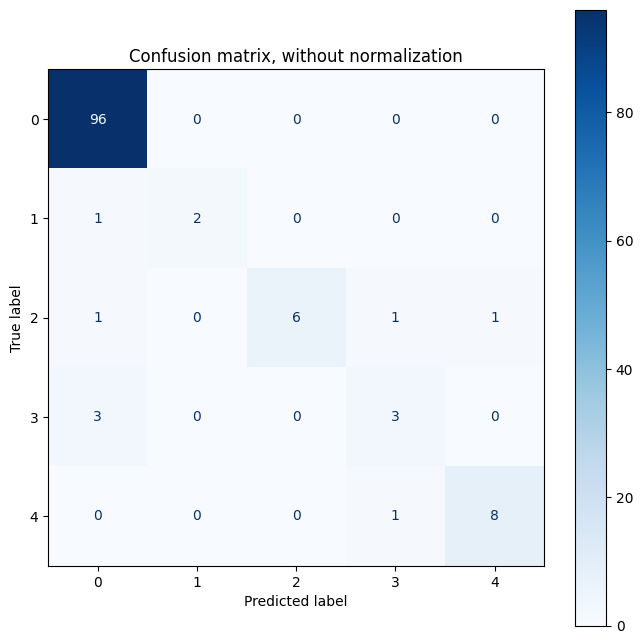

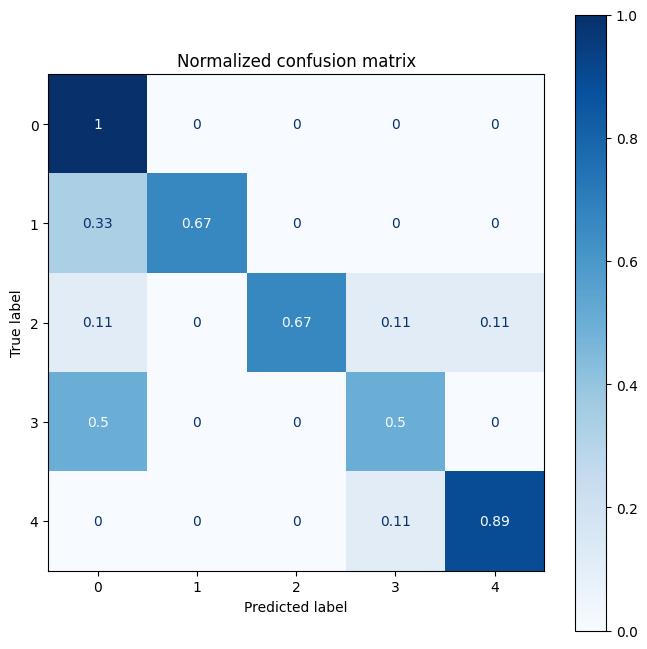

In [481]:
# save the target variable classes
class_names = le_name_map.keys()

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(8, 8))

    disp = ConfusionMatrixDisplay.from_estimator(
        model_lgb_optuna,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
        ax = ax
    )
    disp.ax_.set_title(title)
    disp.ax_.grid(False)

    print(title)
    print(disp.confusion_matrix)

In [482]:
feature_imp = pd.DataFrame(sorted(zip(model_lgb_optuna.feature_importances_,X_train.columns)), columns=['Value','Feature'])
feature_imp

,Value,Feature
0,50,Sex
1,203,PROT
2,209,CHE
3,220,GGT
4,242,CHOL
5,243,CREA
6,268,ALT
7,275,ALB
8,276,BIL
9,283,ALP


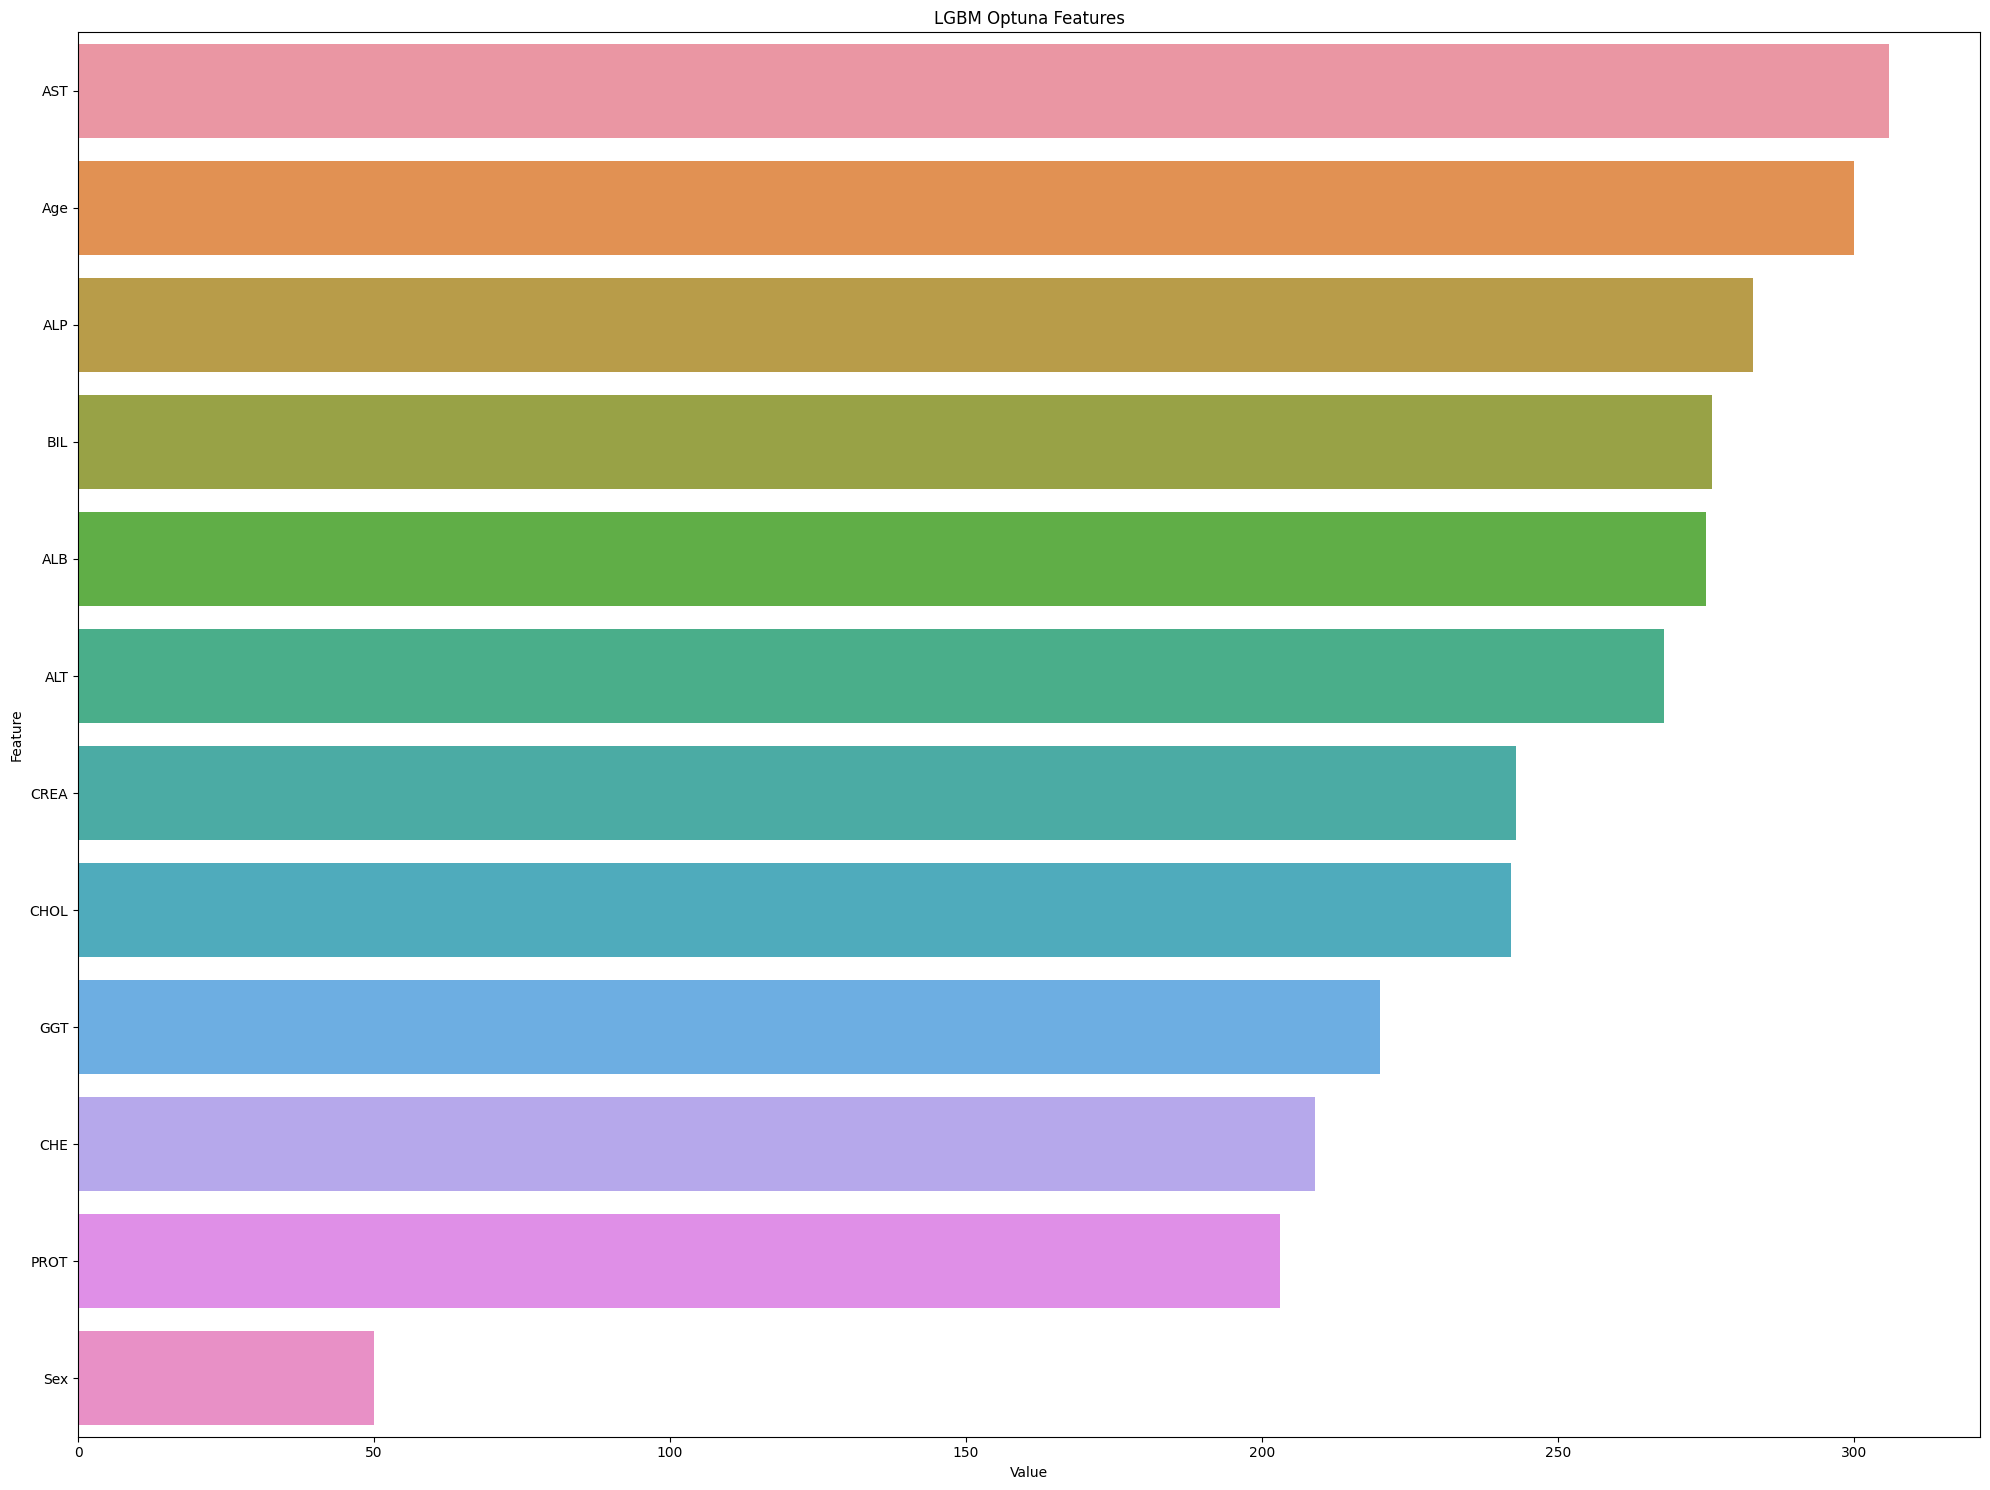

In [483]:
feature_imp = pd.DataFrame(sorted(zip(model_lgb_optuna.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LGBM Optuna Features')
plt.tight_layout()
# plt.savefig('lightgbm_fimp.png')

In [484]:
import pickle

In [255]:
# file_name = '/content/drive/MyDrive/Hepatitis C Disease/my_model_LGBM_hepatitisC_new.sav'
# pickle.dump(model_lgb_optuna, open(file_name, 'wb'))

# Naive Bayes

In [486]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [487]:
# # Naive Bayes
# nb_model = GaussianNB()
# nb_model.fit(X_train, y_train)
# y_pred_ = nb_model.predict(X_train)
# accuracy = accuracy_score(y_train, y_pred_)
# print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))
# y_pred = nb_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))
# print(classification_report(y_test, y_pred))

In [488]:
# y_pred = lgb_model.predict(X_test)
# accuracy_score(y_test, y_pred)

In [489]:
y_pred_ = nb_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_)
print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))

Accuracy after tuning: 84.39%


In [490]:
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))

Accuracy after tuning: 91.06%


In [491]:
# classification report for the train set
print(classification_report(y_train, y_pred_,digits=4))

              precision    recall  f1-score   support

           0     0.7621    0.9382    0.8410       437
           1     0.9977    1.0000    0.9989       437
           2     0.7623    0.5652    0.6491       437
           3     0.7598    0.8398    0.7978       437
           4     0.9527    0.8764    0.9130       437

    accuracy                         0.8439      2185
   macro avg     0.8469    0.8439    0.8400      2185
weighted avg     0.8469    0.8439    0.8400      2185



In [492]:
# classification report for the test set
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.9691    0.9792    0.9741        96
           1     1.0000    0.3333    0.5000         3
           2     0.7500    0.6667    0.7059         9
           3     0.5000    0.6667    0.5714         6
           4     0.7778    0.7778    0.7778         9

    accuracy                         0.9106       123
   macro avg     0.7994    0.6847    0.7058       123
weighted avg     0.9169    0.9106    0.9089       123



Confusion matrix, without normalization
[[94  0  1  1  0]
 [ 0  1  0  1  1]
 [ 2  0  6  0  1]
 [ 1  0  1  4  0]
 [ 0  0  0  2  7]]
Normalized confusion matrix
[[0.97916667 0.         0.01041667 0.01041667 0.        ]
 [0.         0.33333333 0.         0.33333333 0.33333333]
 [0.22222222 0.         0.66666667 0.         0.11111111]
 [0.16666667 0.         0.16666667 0.66666667 0.        ]
 [0.         0.         0.         0.22222222 0.77777778]]


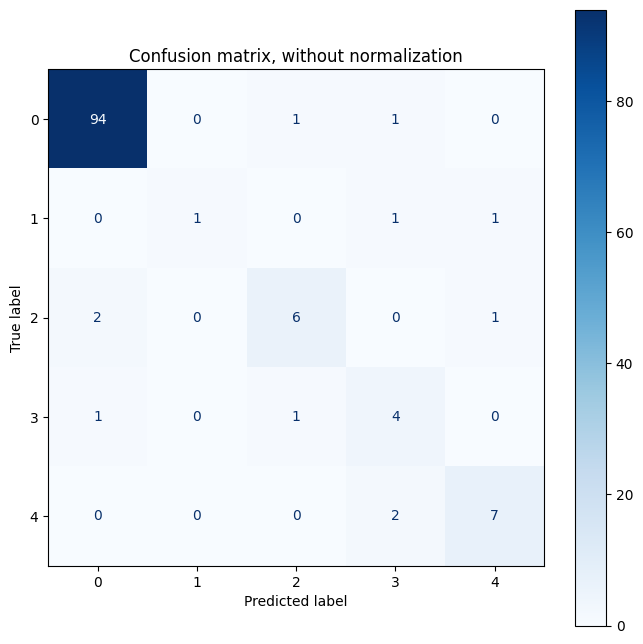

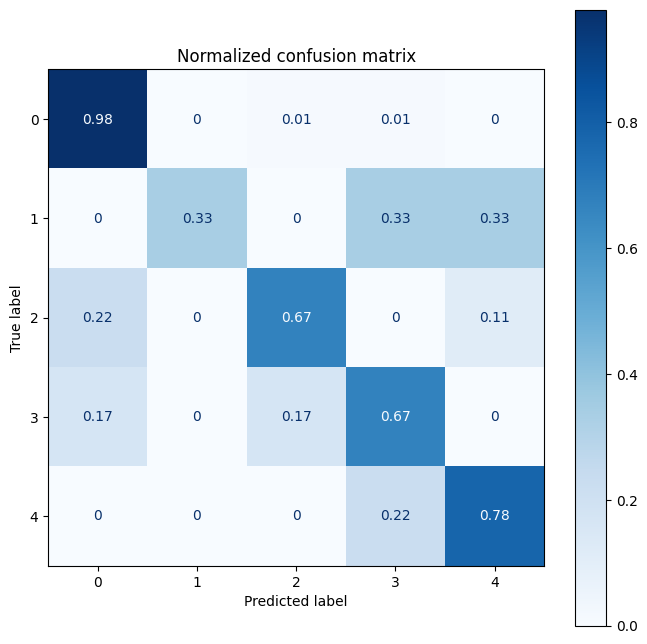

In [493]:
# save the target variable classes
class_names = le_name_map.keys()

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(8, 8))

    disp = ConfusionMatrixDisplay.from_estimator(
        nb_model,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
        ax = ax
    )
    disp.ax_.set_title(title)
    disp.ax_.grid(False)

    print(title)
    print(disp.confusion_matrix)

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(nb_model.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Gaussian Naive Bayes Features')
plt.tight_layout()
# plt.savefig('lightgbm_fimp.png')

AttributeError: ignored

Naive Bayes with optuna

In [ ]:
# params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:

# from sklearn.model_selection import cross_val_score

# def objective(trial):
#     # Define the hyperparameters to be tuned
#     alpha = trial.suggest_uniform('alpha', 0.0, 2.0)

#     # Create the GaussianNB model with the sampled hyperparameters
#     model = GaussianNB(var_smoothing=alpha)


#     # Perform cross-validation and calculate the mean accuracy
#     scores = cross_val_score(model, X_train, y_train, cv=10)
#     accuracy = scores.mean()

#     # Return the negative accuracy as Optuna minimizes the objective function
#     return accuracy

# # Create the Optuna study and optimize the objective function
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=300)

# # Print the best hyperparameters and the best score obtained
# print('Best hyperparameters:', study.best_params)
# print('Best accuracy:', study.best_value)


Best hyperparameters: {'alpha': 0.009915233658244822}
Best accuracy: 0.8540593188387584


In [494]:
def objective(trial):
    """
    Objective function to be minimized.
    """
    param = {

        "var_smoothing": trial.suggest_uniform('var_smoothing', 0.0, 2.0),

    }
    Gnb = GaussianNB(**param)
    Gnb.fit(X_train, y_train)
    preds = Gnb.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    return accuracy

# Create the Optuna study and optimize the objective function
study = optuna.create_study(study_name = 'GNB', direction='maximize')
study.optimize(objective, n_trials=300)

# Print the best hyperparameters and the best score obtained
print('Best hyperparameters:', study.best_params)
print('Best accuracy:', study.best_value)

[I 2023-06-18 01:25:25,588] A new study created in memory with name: GNB
[I 2023-06-18 01:25:25,608] Trial 0 finished with value: 0.8455284552845529 and parameters: {'var_smoothing': 1.1109635593416594}. Best is trial 0 with value: 0.8455284552845529.
[I 2023-06-18 01:25:25,622] Trial 1 finished with value: 0.8455284552845529 and parameters: {'var_smoothing': 1.0510737168073496}. Best is trial 0 with value: 0.8455284552845529.
[I 2023-06-18 01:25:25,641] Trial 2 finished with value: 0.8455284552845529 and parameters: {'var_smoothing': 0.9934948045436107}. Best is trial 0 with value: 0.8455284552845529.
[I 2023-06-18 01:25:25,660] Trial 3 finished with value: 0.8292682926829268 and parameters: {'var_smoothing': 1.5636164472700715}. Best is trial 0 with value: 0.8455284552845529.
[I 2023-06-18 01:25:25,673] Trial 4 finished with value: 0.8373983739837398 and parameters: {'var_smoothing': 1.4643638594781823}. Best is trial 0 with value: 0.8455284552845529.
[I 2023-06-18 01:25:25,691] Tria

Best hyperparameters: {'var_smoothing': 0.0021882626121048354}
Best accuracy: 0.9105691056910569


In [495]:
params = study.best_params
# params = {
#     'var_smoothing' : 0.0009969184111224272
# }
params

{'var_smoothing': 0.0021882626121048354}

In [496]:
model_Gnb_optuna = GaussianNB(**params)
model_Gnb_optuna.fit(X_train, y_train)

GaussianNB(var_smoothing=0.0021882626121048354)

In [497]:
y_pred_ = model_Gnb_optuna.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_)
print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))

Accuracy after tuning: 84.58%


In [498]:
y_pred = model_Gnb_optuna.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))

Accuracy after tuning: 91.06%


In [499]:
# classification report for the train set
print(classification_report(y_train, y_pred_,digits=4))

              precision    recall  f1-score   support

           0     0.7611    0.9405    0.8414       437
           1     0.9977    1.0000    0.9989       437
           2     0.7712    0.5629    0.6508       437
           3     0.7623    0.8513    0.8043       437
           4     0.9550    0.8741    0.9128       437

    accuracy                         0.8458      2185
   macro avg     0.8495    0.8458    0.8416      2185
weighted avg     0.8495    0.8458    0.8416      2185



In [500]:
# classification report for the test set
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.9691    0.9792    0.9741        96
           1     1.0000    0.3333    0.5000         3
           2     0.7500    0.6667    0.7059         9
           3     0.5000    0.6667    0.5714         6
           4     0.7778    0.7778    0.7778         9

    accuracy                         0.9106       123
   macro avg     0.7994    0.6847    0.7058       123
weighted avg     0.9169    0.9106    0.9089       123



Confusion matrix, without normalization
[[94  0  1  1  0]
 [ 0  1  0  1  1]
 [ 2  0  6  0  1]
 [ 1  0  1  4  0]
 [ 0  0  0  2  7]]
Normalized confusion matrix
[[0.97916667 0.         0.01041667 0.01041667 0.        ]
 [0.         0.33333333 0.         0.33333333 0.33333333]
 [0.22222222 0.         0.66666667 0.         0.11111111]
 [0.16666667 0.         0.16666667 0.66666667 0.        ]
 [0.         0.         0.         0.22222222 0.77777778]]


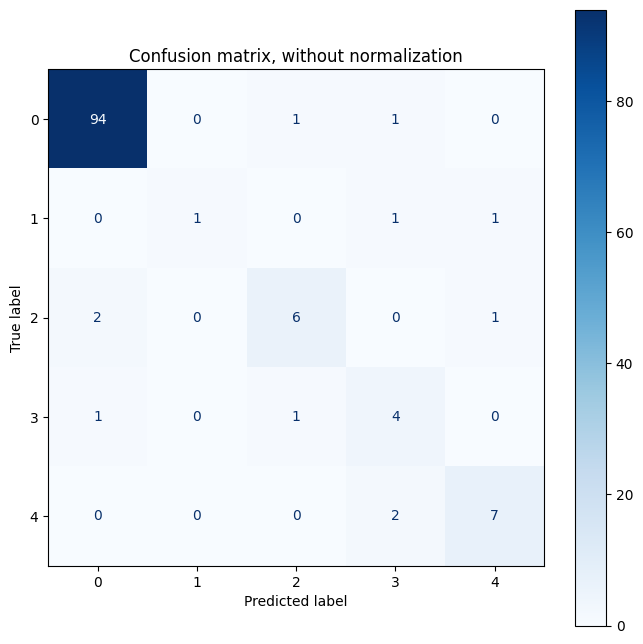

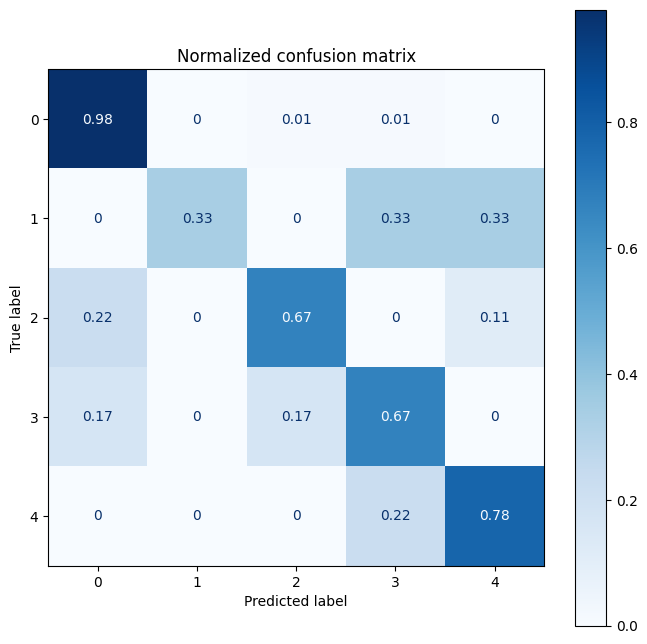

In [501]:
# save the target variable classes
class_names = le_name_map.keys()

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(8, 8))

    disp = ConfusionMatrixDisplay.from_estimator(
        model_Gnb_optuna,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
        ax = ax
    )
    disp.ax_.set_title(title)
    disp.ax_.grid(False)

    print(title)
    print(disp.confusion_matrix)

In [502]:
feature_imp = pd.DataFrame(sorted(zip(model_Gnb_optuna.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Naive Bayes Optuna Features')
plt.tight_layout()
# plt.savefig('lightgbm_fimp.png')

AttributeError: ignored

ExtraTreeclassifier

In [503]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

In [504]:
# ExtraTreeclassifier
ExtraT_model = ExtraTreesClassifier()
ExtraT_model.fit(X_train, y_train)

ExtraTreesClassifier()

In [505]:
y_pred_ = ExtraT_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_)
print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))

Accuracy after tuning: 100.00%


In [506]:
y_pred = ExtraT_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))


Accuracy after tuning: 87.80%


In [507]:
# classification report for the train set
print(classification_report(y_train, y_pred_,digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       437
           1     1.0000    1.0000    1.0000       437
           2     1.0000    1.0000    1.0000       437
           3     1.0000    1.0000    1.0000       437
           4     1.0000    1.0000    1.0000       437

    accuracy                         1.0000      2185
   macro avg     1.0000    1.0000    1.0000      2185
weighted avg     1.0000    1.0000    1.0000      2185



In [508]:
# classification report for the test set
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8727    1.0000    0.9320        96
           1     1.0000    0.6667    0.8000         3
           2     1.0000    0.2222    0.3636         9
           3     0.5000    0.1667    0.2500         6
           4     1.0000    0.7778    0.8750         9

    accuracy                         0.8780       123
   macro avg     0.8745    0.5667    0.6441       123
weighted avg     0.8763    0.8780    0.8498       123



Confusion matrix, without normalization
[[96  0  0  0  0]
 [ 1  2  0  0  0]
 [ 6  0  2  1  0]
 [ 5  0  0  1  0]
 [ 2  0  0  0  7]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.        ]
 [0.33333333 0.66666667 0.         0.         0.        ]
 [0.66666667 0.         0.22222222 0.11111111 0.        ]
 [0.83333333 0.         0.         0.16666667 0.        ]
 [0.22222222 0.         0.         0.         0.77777778]]


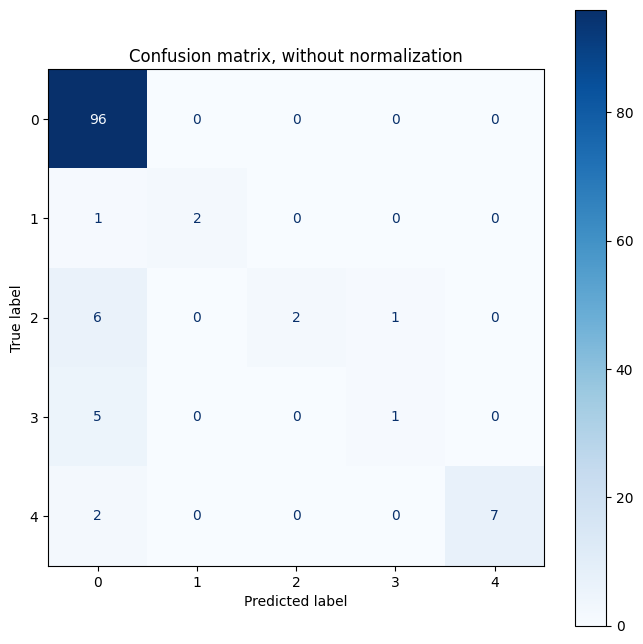

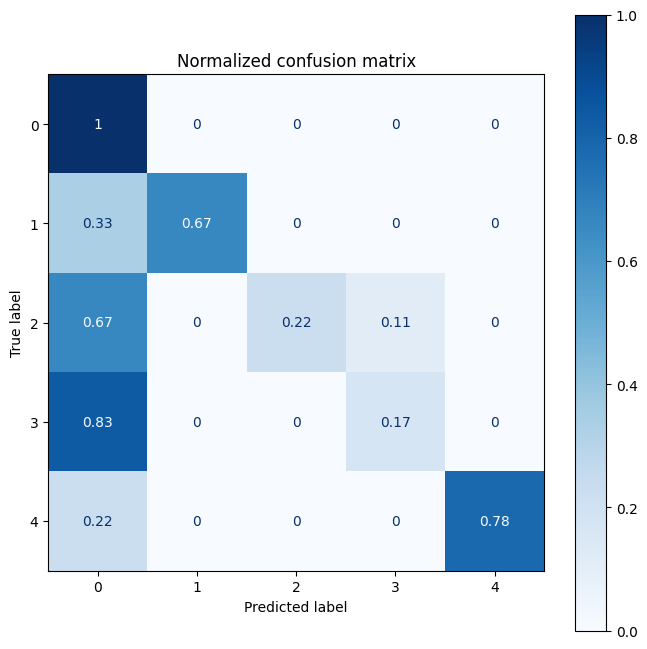

In [509]:
# save the target variable classes
class_names = le_name_map.keys()

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(8, 8))

    disp = ConfusionMatrixDisplay.from_estimator(
        ExtraT_model,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
        ax = ax
    )
    disp.ax_.set_title(title)
    disp.ax_.grid(False)

    print(title)
    print(disp.confusion_matrix)

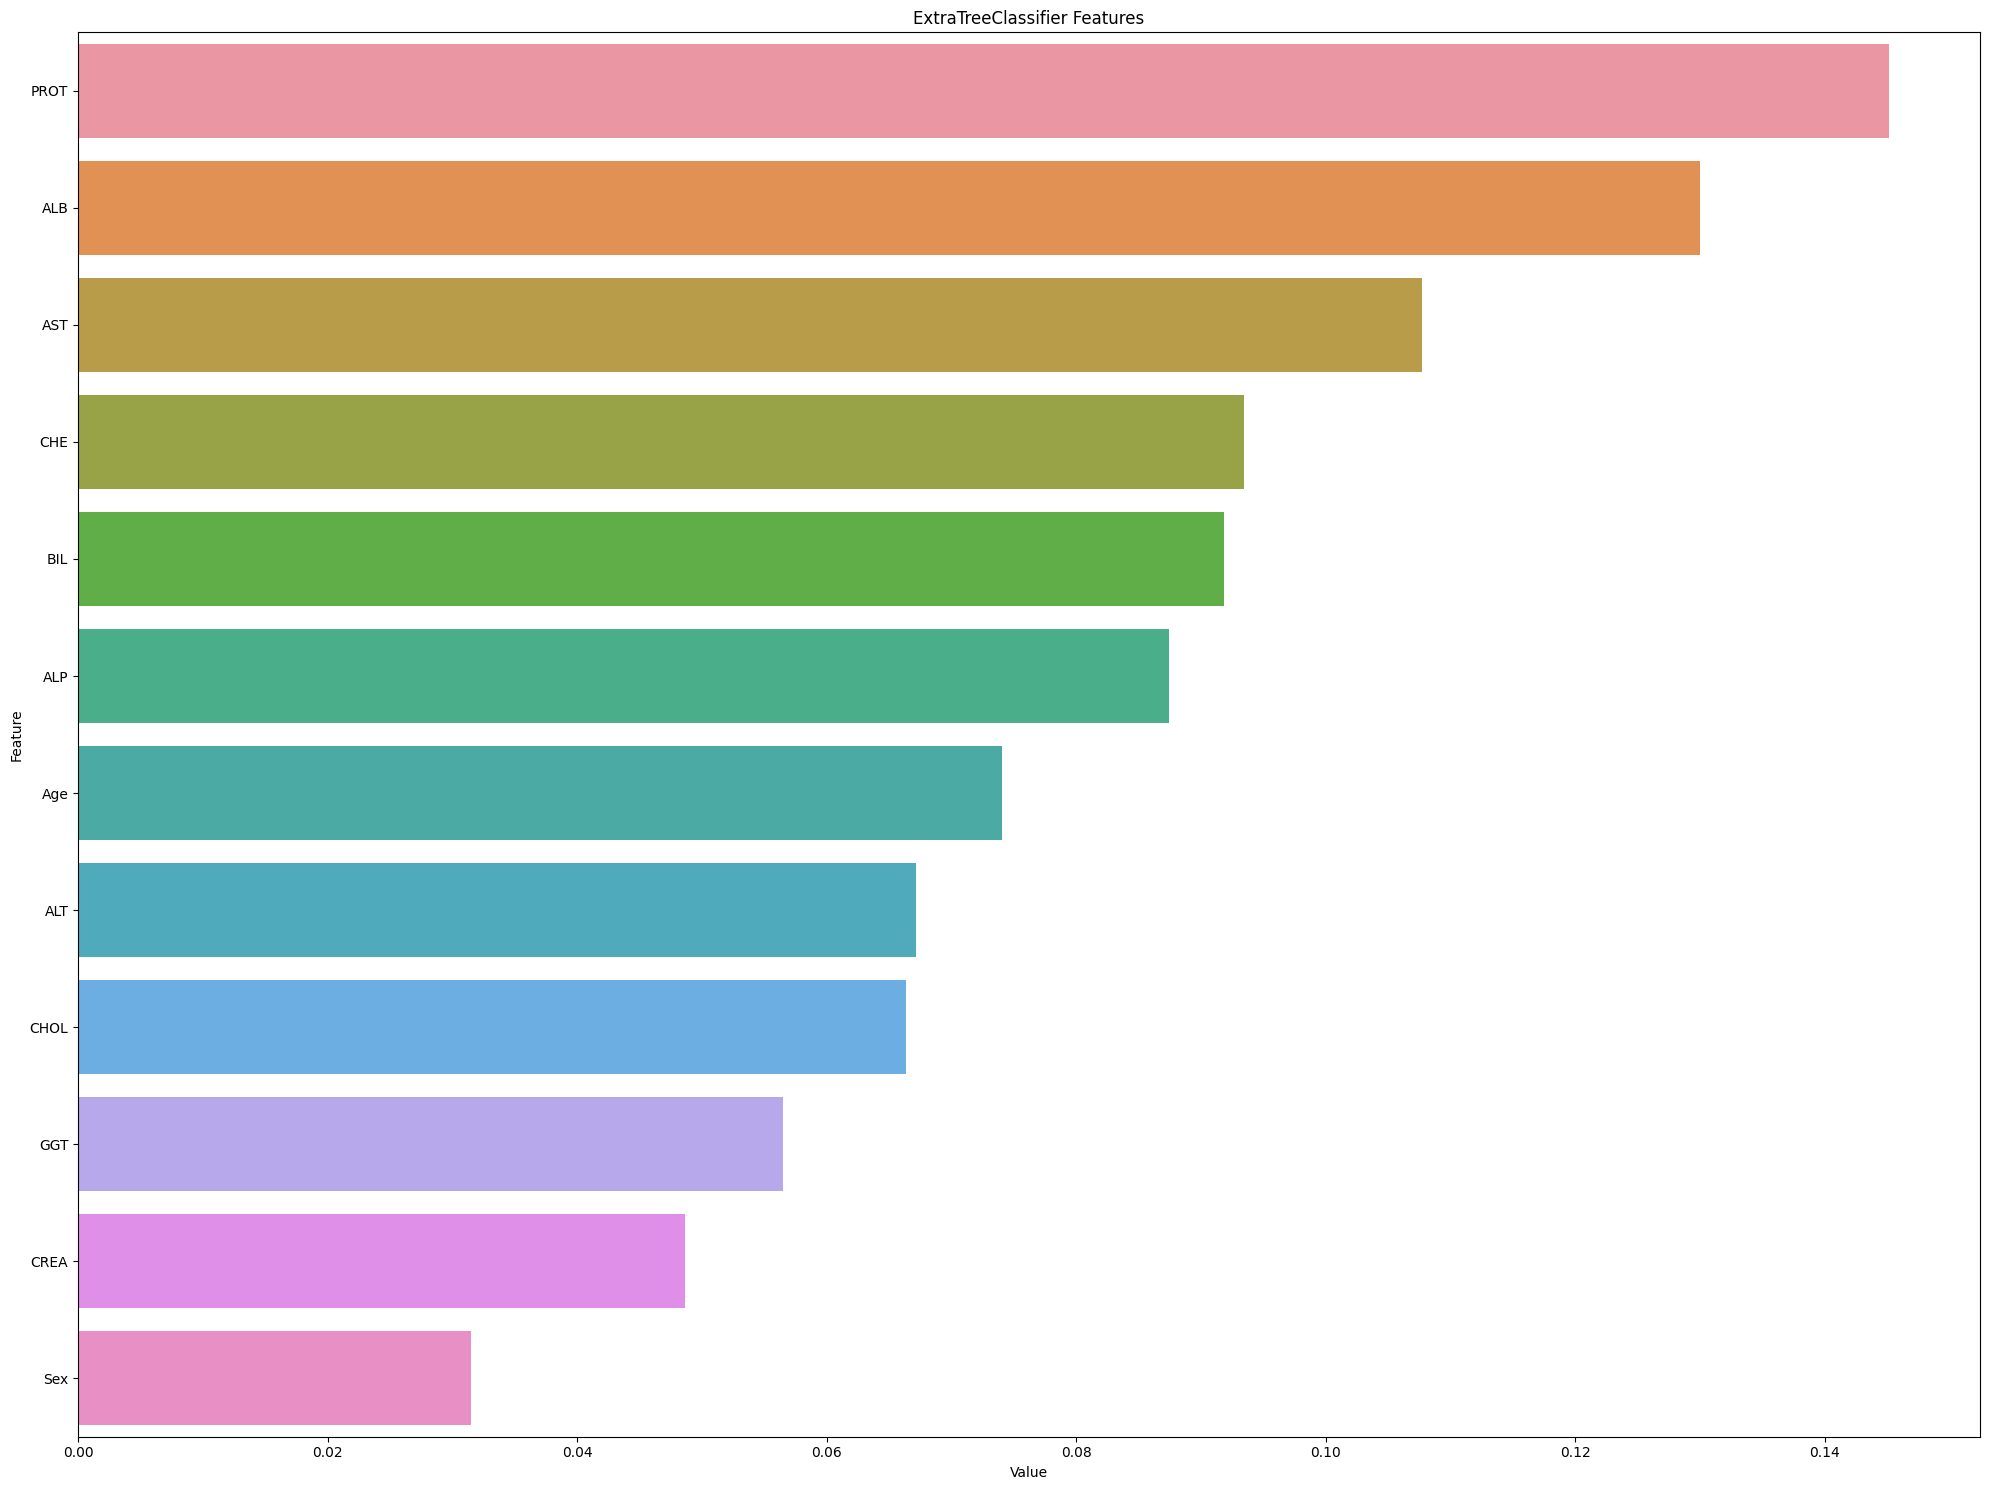

In [510]:
feature_imp = pd.DataFrame(sorted(zip(ExtraT_model.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('ExtraTreeClassifier Features')
plt.tight_layout()
# plt.savefig('lightgbm_fimp.png')

ExtraTreeClassifier with Optuna

In [511]:
# def objective(trial):
#     # Define the hyperparameters to be tuned
#     n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
#     max_depth = trial.suggest_int('max_depth', 3, 20)

#     # Create the ExtraTreesClassifier model with the sampled hyperparameters
#     model = ExtraTreesClassifier(n_estimators=n_estimators, max_depth=max_depth)

#     # Perform cross-validation and calculate the mean accuracy
#     scores = cross_val_score(model, X_train, y_train, cv=10)
#     accuracy = scores.mean()

#     # Return the negative accuracy as Optuna minimizes the objective function
#     return accuracy

# # Create the Optuna study and optimize the objective function
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=300)

# # Print the best hyperparameters and the best score obtained
# print('Best hyperparameters:', study.best_params)
# print('Best accuracy:', study.best_value)


In [512]:
def objective(trial):
    """
    Objective function to be minimized.
    """
    param = {
        'n_estimators' : trial.suggest_int('n_estimators', 100, 1000, step=100),
        'max_depth' : trial.suggest_int('max_depth', 3, 20)


    }
    model = ExtraTreesClassifier(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    return accuracy

# Create the Optuna study and optimize the objective function
study = optuna.create_study(study_name = 'ExtraT',direction='maximize')
study.optimize(objective, n_trials=300)

# Print the best hyperparameters and the best score obtained
print('Best hyperparameters:', study.best_params)
print('Best accuracy:', study.best_value)

[I 2023-06-18 01:26:05,410] A new study created in memory with name: ExtraT
[I 2023-06-18 01:26:06,334] Trial 0 finished with value: 0.8861788617886179 and parameters: {'n_estimators': 400, 'max_depth': 12}. Best is trial 0 with value: 0.8861788617886179.
[I 2023-06-18 01:26:06,862] Trial 1 finished with value: 0.9105691056910569 and parameters: {'n_estimators': 300, 'max_depth': 4}. Best is trial 1 with value: 0.9105691056910569.
[I 2023-06-18 01:26:07,093] Trial 2 finished with value: 0.8861788617886179 and parameters: {'n_estimators': 100, 'max_depth': 13}. Best is trial 1 with value: 0.9105691056910569.
[I 2023-06-18 01:26:07,881] Trial 3 finished with value: 0.9105691056910569 and parameters: {'n_estimators': 400, 'max_depth': 7}. Best is trial 1 with value: 0.9105691056910569.
[I 2023-06-18 01:26:08,956] Trial 4 finished with value: 0.8943089430894309 and parameters: {'n_estimators': 500, 'max_depth': 13}. Best is trial 1 with value: 0.9105691056910569.
[I 2023-06-18 01:26:09,886

Best hyperparameters: {'n_estimators': 600, 'max_depth': 4}
Best accuracy: 0.9349593495934959


In [513]:
params = study.best_params
# params = {
#     'max_depth' : 7,
#     'n_estimators' : 1000
# }
params

{'n_estimators': 600, 'max_depth': 4}

In [514]:
model_ExtraT_optuna = ExtraTreesClassifier(**params)
model_ExtraT_optuna.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=4, n_estimators=600)

In [515]:
y_pred_ = model_ExtraT_optuna.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_)
print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))

Accuracy after tuning: 91.53%


In [516]:
y_pred = model_ExtraT_optuna.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))


Accuracy after tuning: 92.68%


In [517]:
# classification report for the train set
print(classification_report(y_train, y_pred_,digits=4))

              precision    recall  f1-score   support

           0     0.8696    0.9611    0.9130       437
           1     0.9887    1.0000    0.9943       437
           2     0.9101    0.7414    0.8172       437
           3     0.8320    0.9519    0.8879       437
           4     0.9975    0.9222    0.9584       437

    accuracy                         0.9153      2185
   macro avg     0.9196    0.9153    0.9142      2185
weighted avg     0.9196    0.9153    0.9142      2185



In [518]:
# classification report for the test set
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.9505    1.0000    0.9746        96
           1     1.0000    0.6667    0.8000         3
           2     0.8571    0.6667    0.7500         9
           3     0.5714    0.6667    0.6154         6
           4     1.0000    0.6667    0.8000         9

    accuracy                         0.9268       123
   macro avg     0.8758    0.7333    0.7880       123
weighted avg     0.9300    0.9268    0.9236       123



Confusion matrix, without normalization
[[96  0  0  0  0]
 [ 1  2  0  0  0]
 [ 2  0  6  1  0]
 [ 2  0  0  4  0]
 [ 0  0  1  2  6]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.        ]
 [0.33333333 0.66666667 0.         0.         0.        ]
 [0.22222222 0.         0.66666667 0.11111111 0.        ]
 [0.33333333 0.         0.         0.66666667 0.        ]
 [0.         0.         0.11111111 0.22222222 0.66666667]]


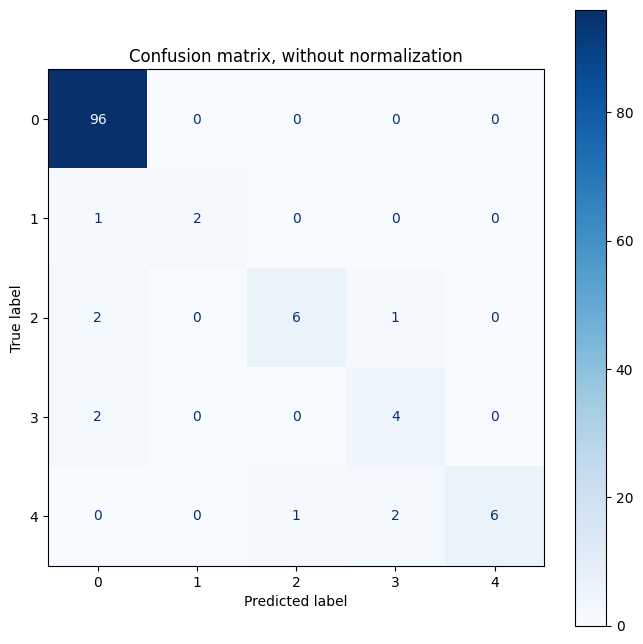

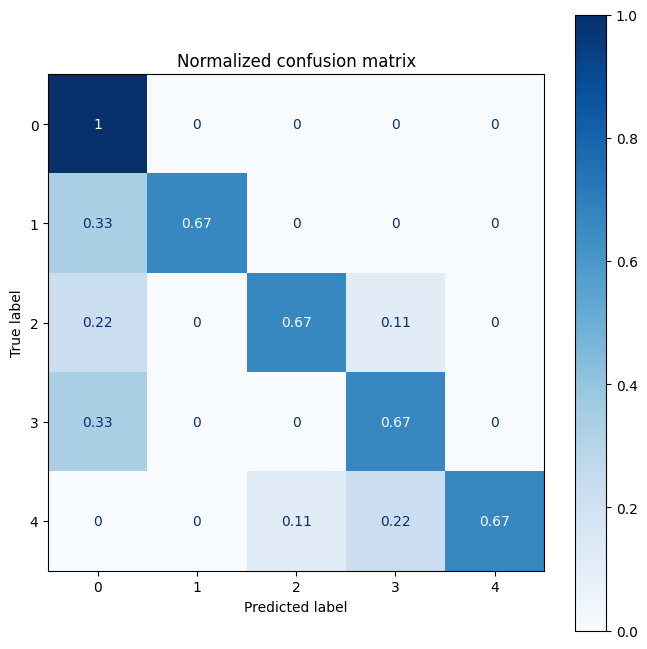

In [519]:
# save the target variable classes
class_names = le_name_map.keys()

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(8, 8))

    disp = ConfusionMatrixDisplay.from_estimator(
        model_ExtraT_optuna,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
        ax = ax
    )
    disp.ax_.set_title(title)
    disp.ax_.grid(False)

    print(title)
    print(disp.confusion_matrix)

In [520]:
feature_imp = pd.DataFrame(sorted(zip(model_ExtraT_optuna.feature_importances_,X_train.columns)), columns=['Value','Feature'])
feature_imp

,Value,Feature
0,0.019297,Sex
1,0.036170,GGT
2,0.037044,CREA
3,0.047967,CHOL
4,0.057802,Age
5,0.063415,AST
6,0.064463,ALT
7,0.076333,ALP
8,0.098693,BIL
9,0.118220,CHE


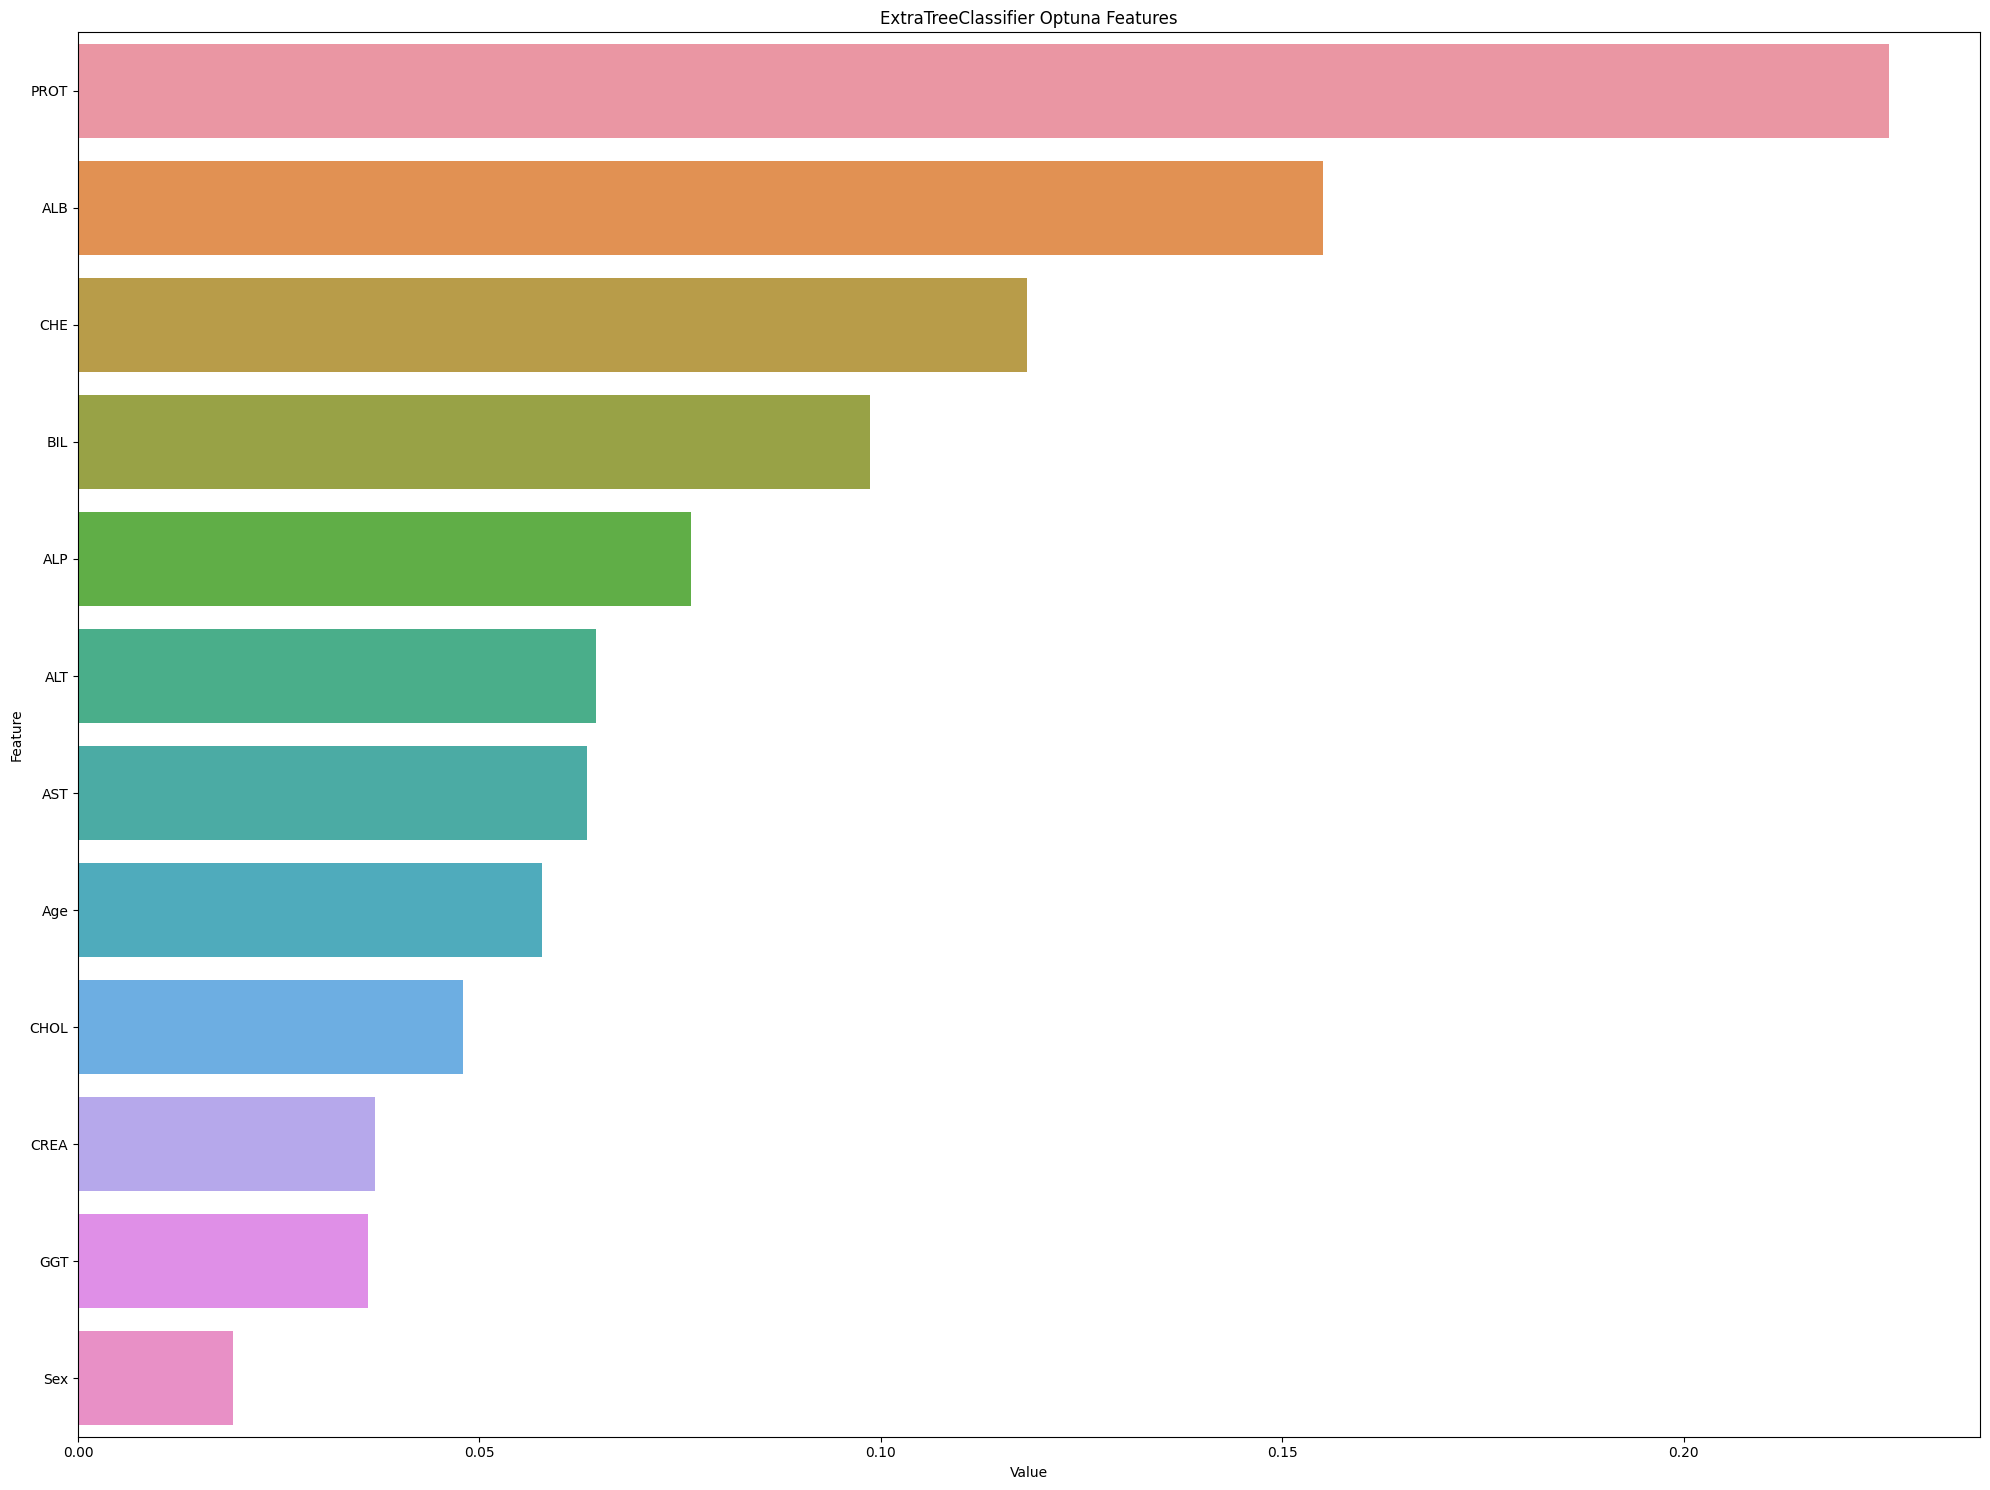

In [521]:
feature_imp = pd.DataFrame(sorted(zip(model_ExtraT_optuna.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('ExtraTreeClassifier Optuna Features')
plt.tight_layout()
# plt.savefig('lightgbm_fimp.png')

# Random Forest

In [522]:
# ExtraTreeclassifier
RandomF_model = RandomForestClassifier(random_state=42)
RandomF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [523]:
y_pred_ = RandomF_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_)
print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))

Accuracy after tuning: 100.00%


In [524]:
y_pred = RandomF_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))


Accuracy after tuning: 88.62%


In [525]:
# classification report for the train set
print(classification_report(y_train, y_pred_,digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       437
           1     1.0000    1.0000    1.0000       437
           2     1.0000    1.0000    1.0000       437
           3     1.0000    1.0000    1.0000       437
           4     1.0000    1.0000    1.0000       437

    accuracy                         1.0000      2185
   macro avg     1.0000    1.0000    1.0000      2185
weighted avg     1.0000    1.0000    1.0000      2185



In [526]:
# classification report for the test set
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8889    1.0000    0.9412        96
           1     1.0000    0.6667    0.8000         3
           2     1.0000    0.3333    0.5000         9
           3     0.5000    0.3333    0.4000         6
           4     1.0000    0.6667    0.8000         9

    accuracy                         0.8862       123
   macro avg     0.8778    0.6000    0.6882       123
weighted avg     0.8889    0.8862    0.8687       123



Confusion matrix, without normalization
[[96  0  0  0  0]
 [ 1  2  0  0  0]
 [ 4  0  3  2  0]
 [ 4  0  0  2  0]
 [ 3  0  0  0  6]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.        ]
 [0.33333333 0.66666667 0.         0.         0.        ]
 [0.44444444 0.         0.33333333 0.22222222 0.        ]
 [0.66666667 0.         0.         0.33333333 0.        ]
 [0.33333333 0.         0.         0.         0.66666667]]


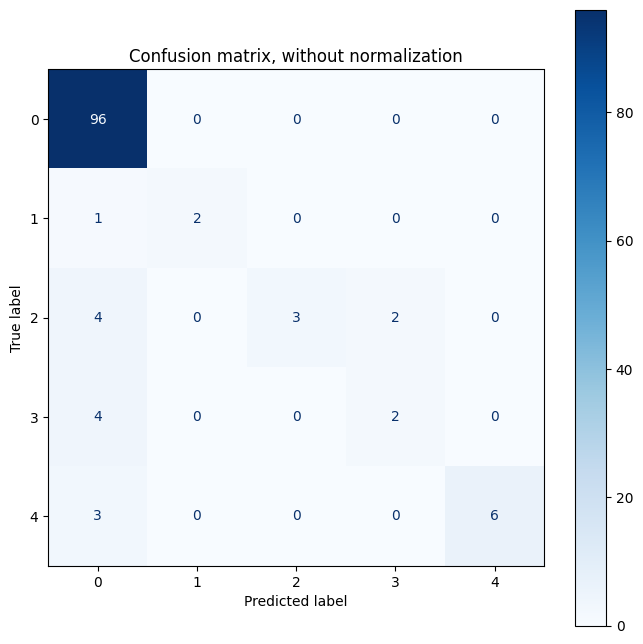

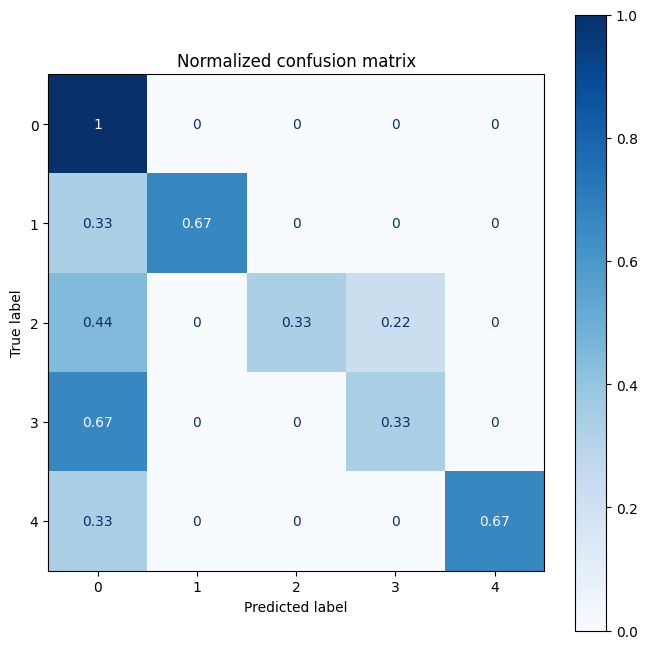

In [527]:
# save the target variable classes
class_names = le_name_map.keys()

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(8, 8))

    disp = ConfusionMatrixDisplay.from_estimator(
        RandomF_model,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
        ax = ax
    )
    disp.ax_.set_title(title)
    disp.ax_.grid(False)

    print(title)
    print(disp.confusion_matrix)

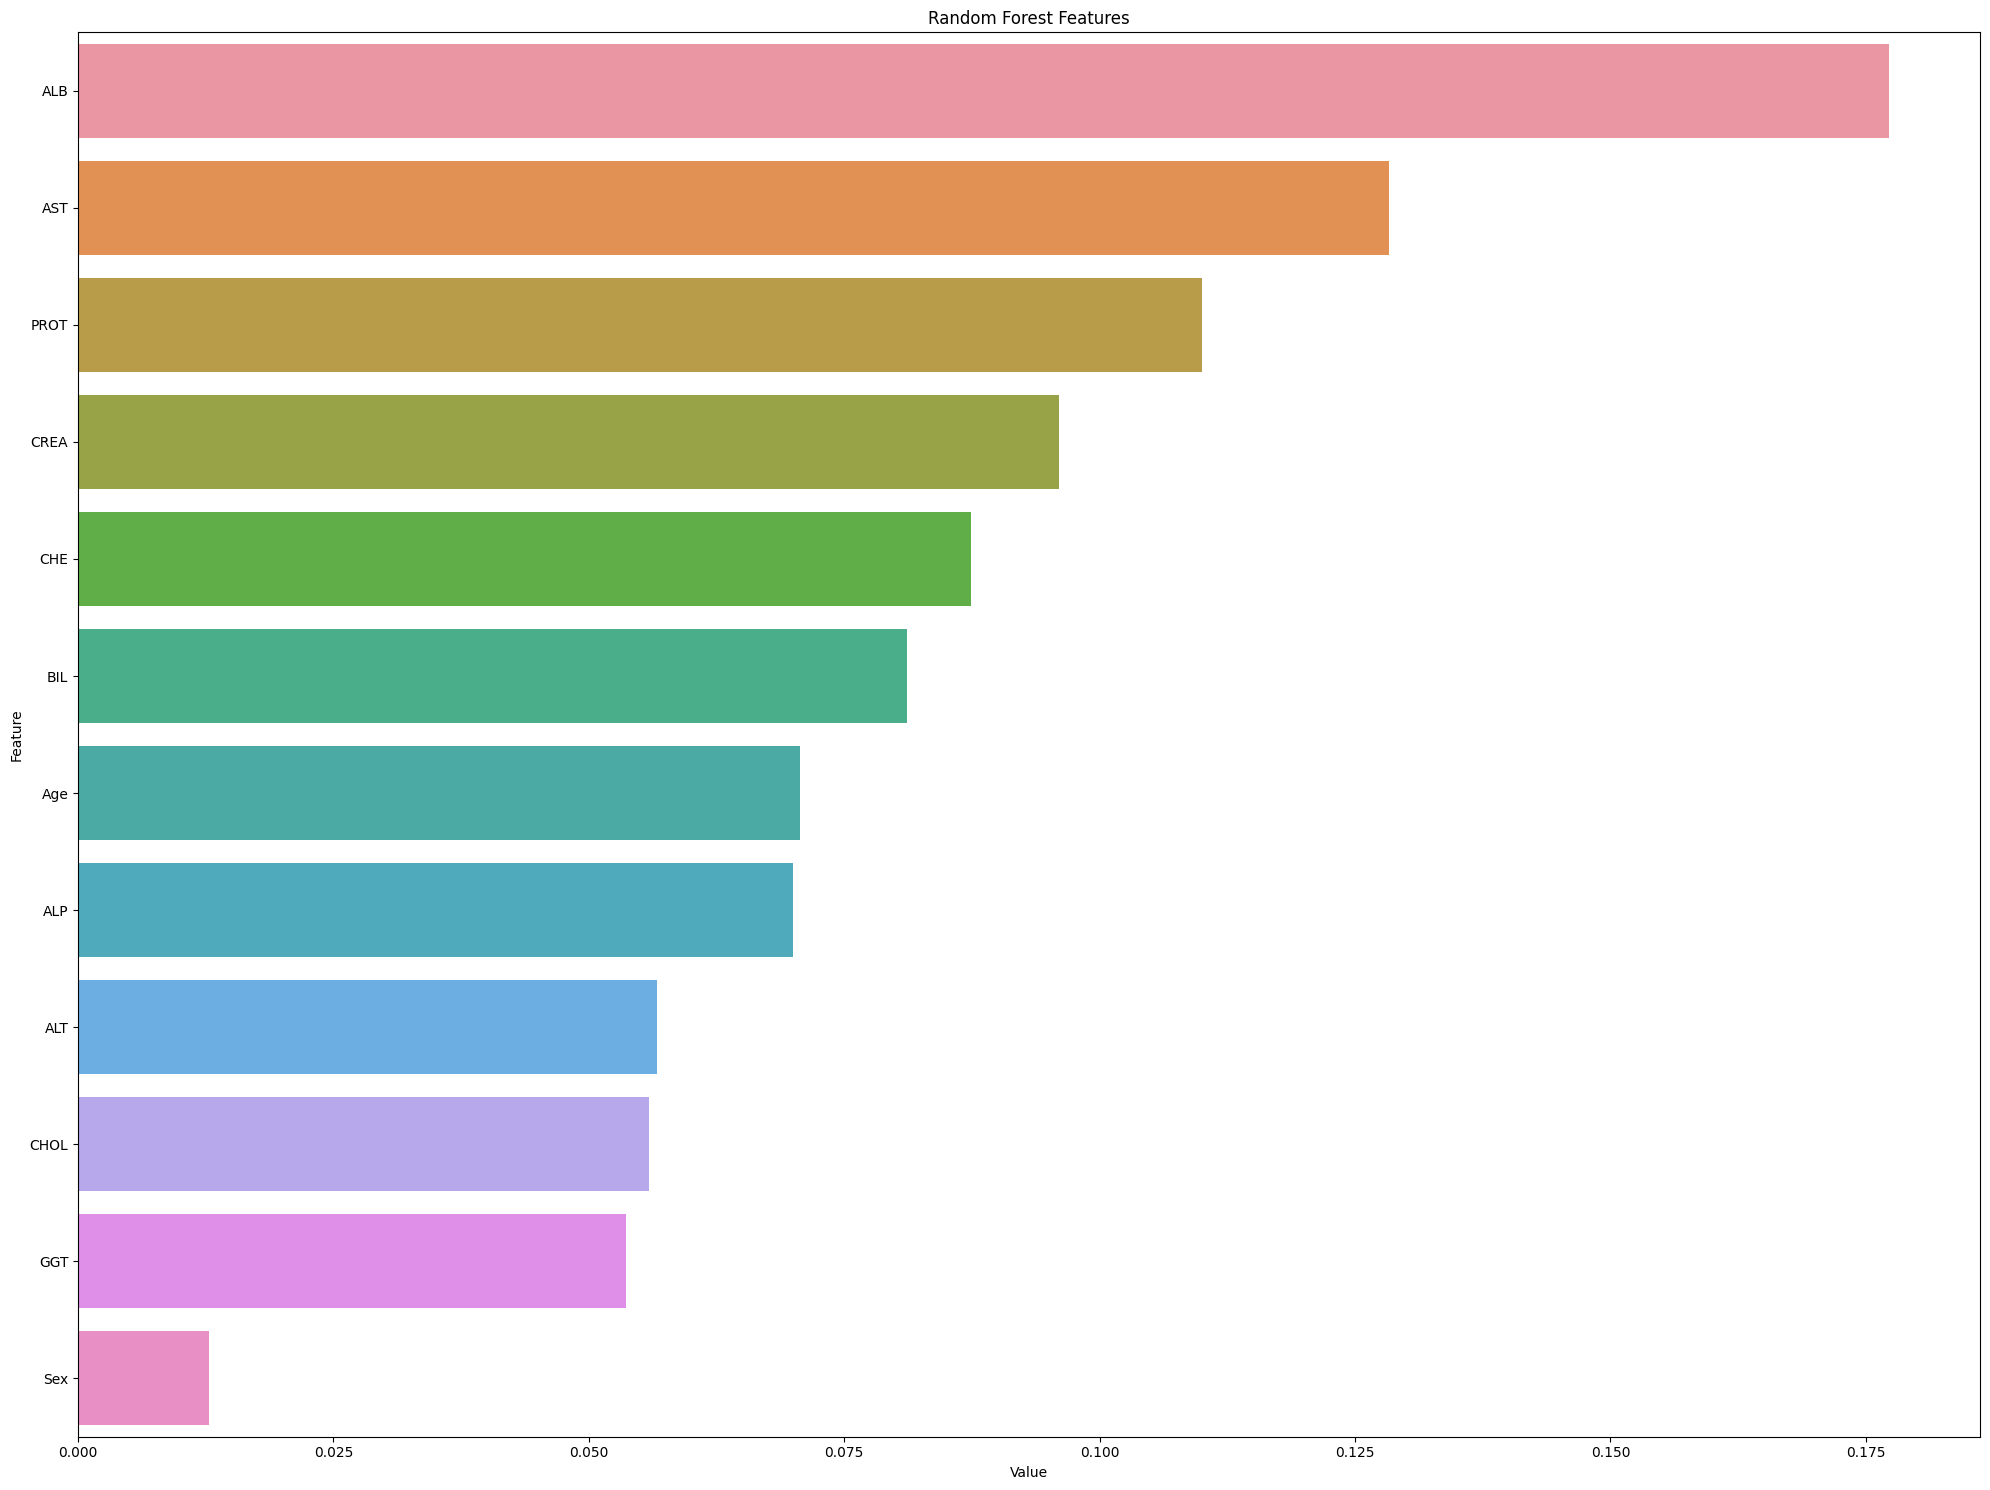

In [528]:
feature_imp = pd.DataFrame(sorted(zip(RandomF_model.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Random Forest Features')
plt.tight_layout()
# plt.savefig('lightgbm_fimp.png')

Random Forest with Optuna

In [529]:
# rf_params = {'n_estimators': [100, 150, 300],
#              'min_samples_split': [2, 3, 4],
#              'min_samples_leaf': [1, 2, 3]}

In [530]:
def objective(trial):
    """
    Objective function to be minimized.
    """
    param = {
        'n_estimators' : trial.suggest_int('n_estimators', 100, 500, step=25),
        'min_samples_split' : trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf' : trial.suggest_int('min_samples_leaf', 2, 10),

    }
    model = RandomForestClassifier(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    return accuracy

# Create the Optuna study and optimize the objective function
study = optuna.create_study(study_name = 'RandomForest',direction='maximize')
study.optimize(objective, n_trials=300)

# Print the best hyperparameters and the best score obtained
print('Best hyperparameters:', study.best_params)
print('Best accuracy:', study.best_value)

[I 2023-06-18 01:35:27,717] A new study created in memory with name: RandomForest
[I 2023-06-18 01:35:28,814] Trial 0 finished with value: 0.9024390243902439 and parameters: {'n_estimators': 150, 'min_samples_split': 7, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.9024390243902439.
[I 2023-06-18 01:35:30,875] Trial 1 finished with value: 0.8861788617886179 and parameters: {'n_estimators': 375, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9024390243902439.
[I 2023-06-18 01:35:33,148] Trial 2 finished with value: 0.8861788617886179 and parameters: {'n_estimators': 450, 'min_samples_split': 2, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.9024390243902439.
[I 2023-06-18 01:35:34,643] Trial 3 finished with value: 0.8780487804878049 and parameters: {'n_estimators': 275, 'min_samples_split': 5, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.9024390243902439.
[I 2023-06-18 01:35:36,662] Trial 4 finished with value: 0.8861788617886179 an

Best hyperparameters: {'n_estimators': 125, 'min_samples_split': 8, 'min_samples_leaf': 9}
Best accuracy: 0.9186991869918699


In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
# categorical_cols = train_inputs.select_dtypes('object').columns.tolist()
# encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
# encoder.fit(raw_df[categorical_cols])
# encoder.categories_
# encoded_cols = list(encoder.get_feature_names(categorical_cols))
# print(encoded_cols)
# train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
# val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [531]:
params = study.best_params
# params = {
#     'min_samples_leaf' : 9,
#     'min_samples_split' : 9,
#     'n_estimators' : 175
# }
params

{'n_estimators': 125, 'min_samples_split': 8, 'min_samples_leaf': 9}

In [532]:
model_RandomF_optuna = RandomForestClassifier(**params)
model_RandomF_optuna.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=9, min_samples_split=8,
                       n_estimators=125)

In [533]:
y_pred_ = model_RandomF_optuna.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_)
print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))

Accuracy after tuning: 99.68%


In [534]:
y_pred = model_RandomF_optuna.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))


Accuracy after tuning: 89.43%


In [535]:
# classification report for the train set
print(classification_report(y_train, y_pred_,digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9886    0.9942       437
           1     0.9977    1.0000    0.9989       437
           2     0.9954    1.0000    0.9977       437
           3     0.9954    0.9977    0.9966       437
           4     0.9954    0.9977    0.9966       437

    accuracy                         0.9968      2185
   macro avg     0.9968    0.9968    0.9968      2185
weighted avg     0.9968    0.9968    0.9968      2185



In [536]:
# classification report for the test set
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.9412    1.0000    0.9697        96
           1     1.0000    0.3333    0.5000         3
           2     1.0000    0.3333    0.5000         9
           3     0.3333    0.5000    0.4000         6
           4     0.8750    0.7778    0.8235         9

    accuracy                         0.8943       123
   macro avg     0.8299    0.5889    0.6386       123
weighted avg     0.9124    0.8943    0.8854       123



Confusion matrix, without normalization
[[96  0  0  0  0]
 [ 1  1  0  0  1]
 [ 2  0  3  4  0]
 [ 3  0  0  3  0]
 [ 0  0  0  2  7]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.        ]
 [0.33333333 0.33333333 0.         0.         0.33333333]
 [0.22222222 0.         0.33333333 0.44444444 0.        ]
 [0.5        0.         0.         0.5        0.        ]
 [0.         0.         0.         0.22222222 0.77777778]]


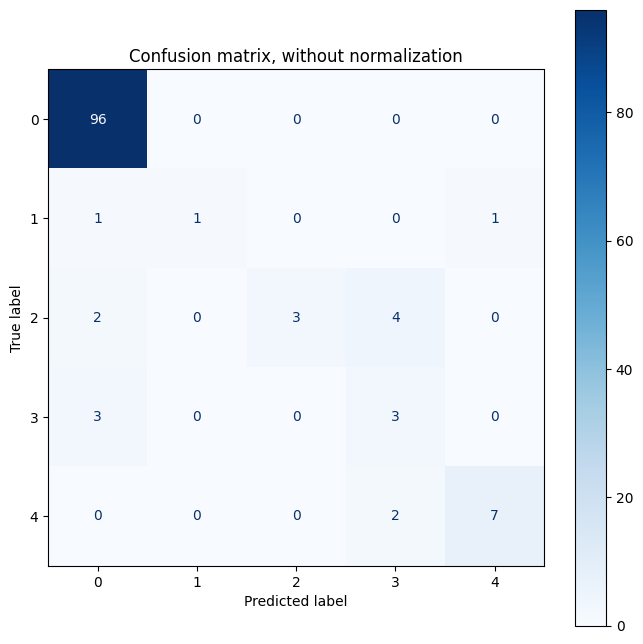

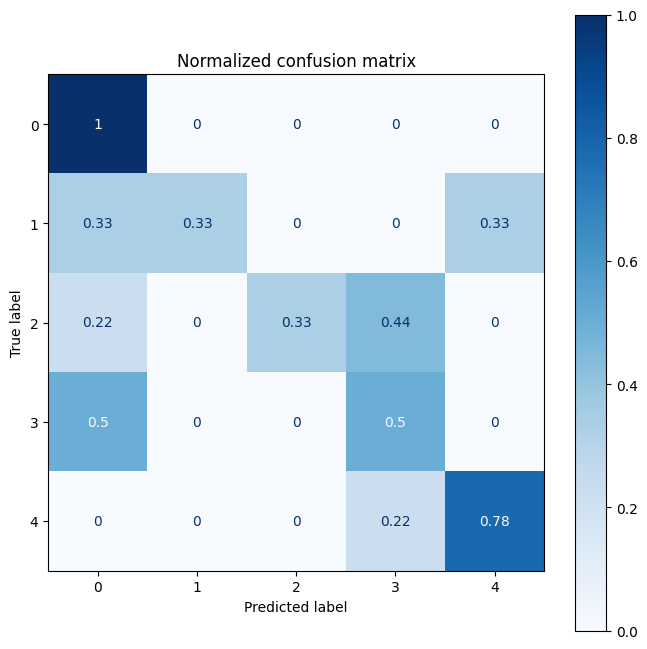

In [537]:
# save the target variable classes
class_names = le_name_map.keys()

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(8, 8))

    disp = ConfusionMatrixDisplay.from_estimator(
        model_RandomF_optuna,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
        ax = ax
    )
    disp.ax_.set_title(title)
    disp.ax_.grid(False)

    print(title)
    print(disp.confusion_matrix)

In [538]:
feature_imp = pd.DataFrame(sorted(zip(model_RandomF_optuna.feature_importances_,X_train.columns)), columns=['Value','Feature'])
feature_imp

,Value,Feature
0,0.011797,Sex
1,0.050542,CHOL
2,0.051017,GGT
3,0.062289,ALT
4,0.064463,Age
5,0.066430,BIL
6,0.067222,ALP
7,0.079892,CREA
8,0.086082,CHE
9,0.132115,PROT


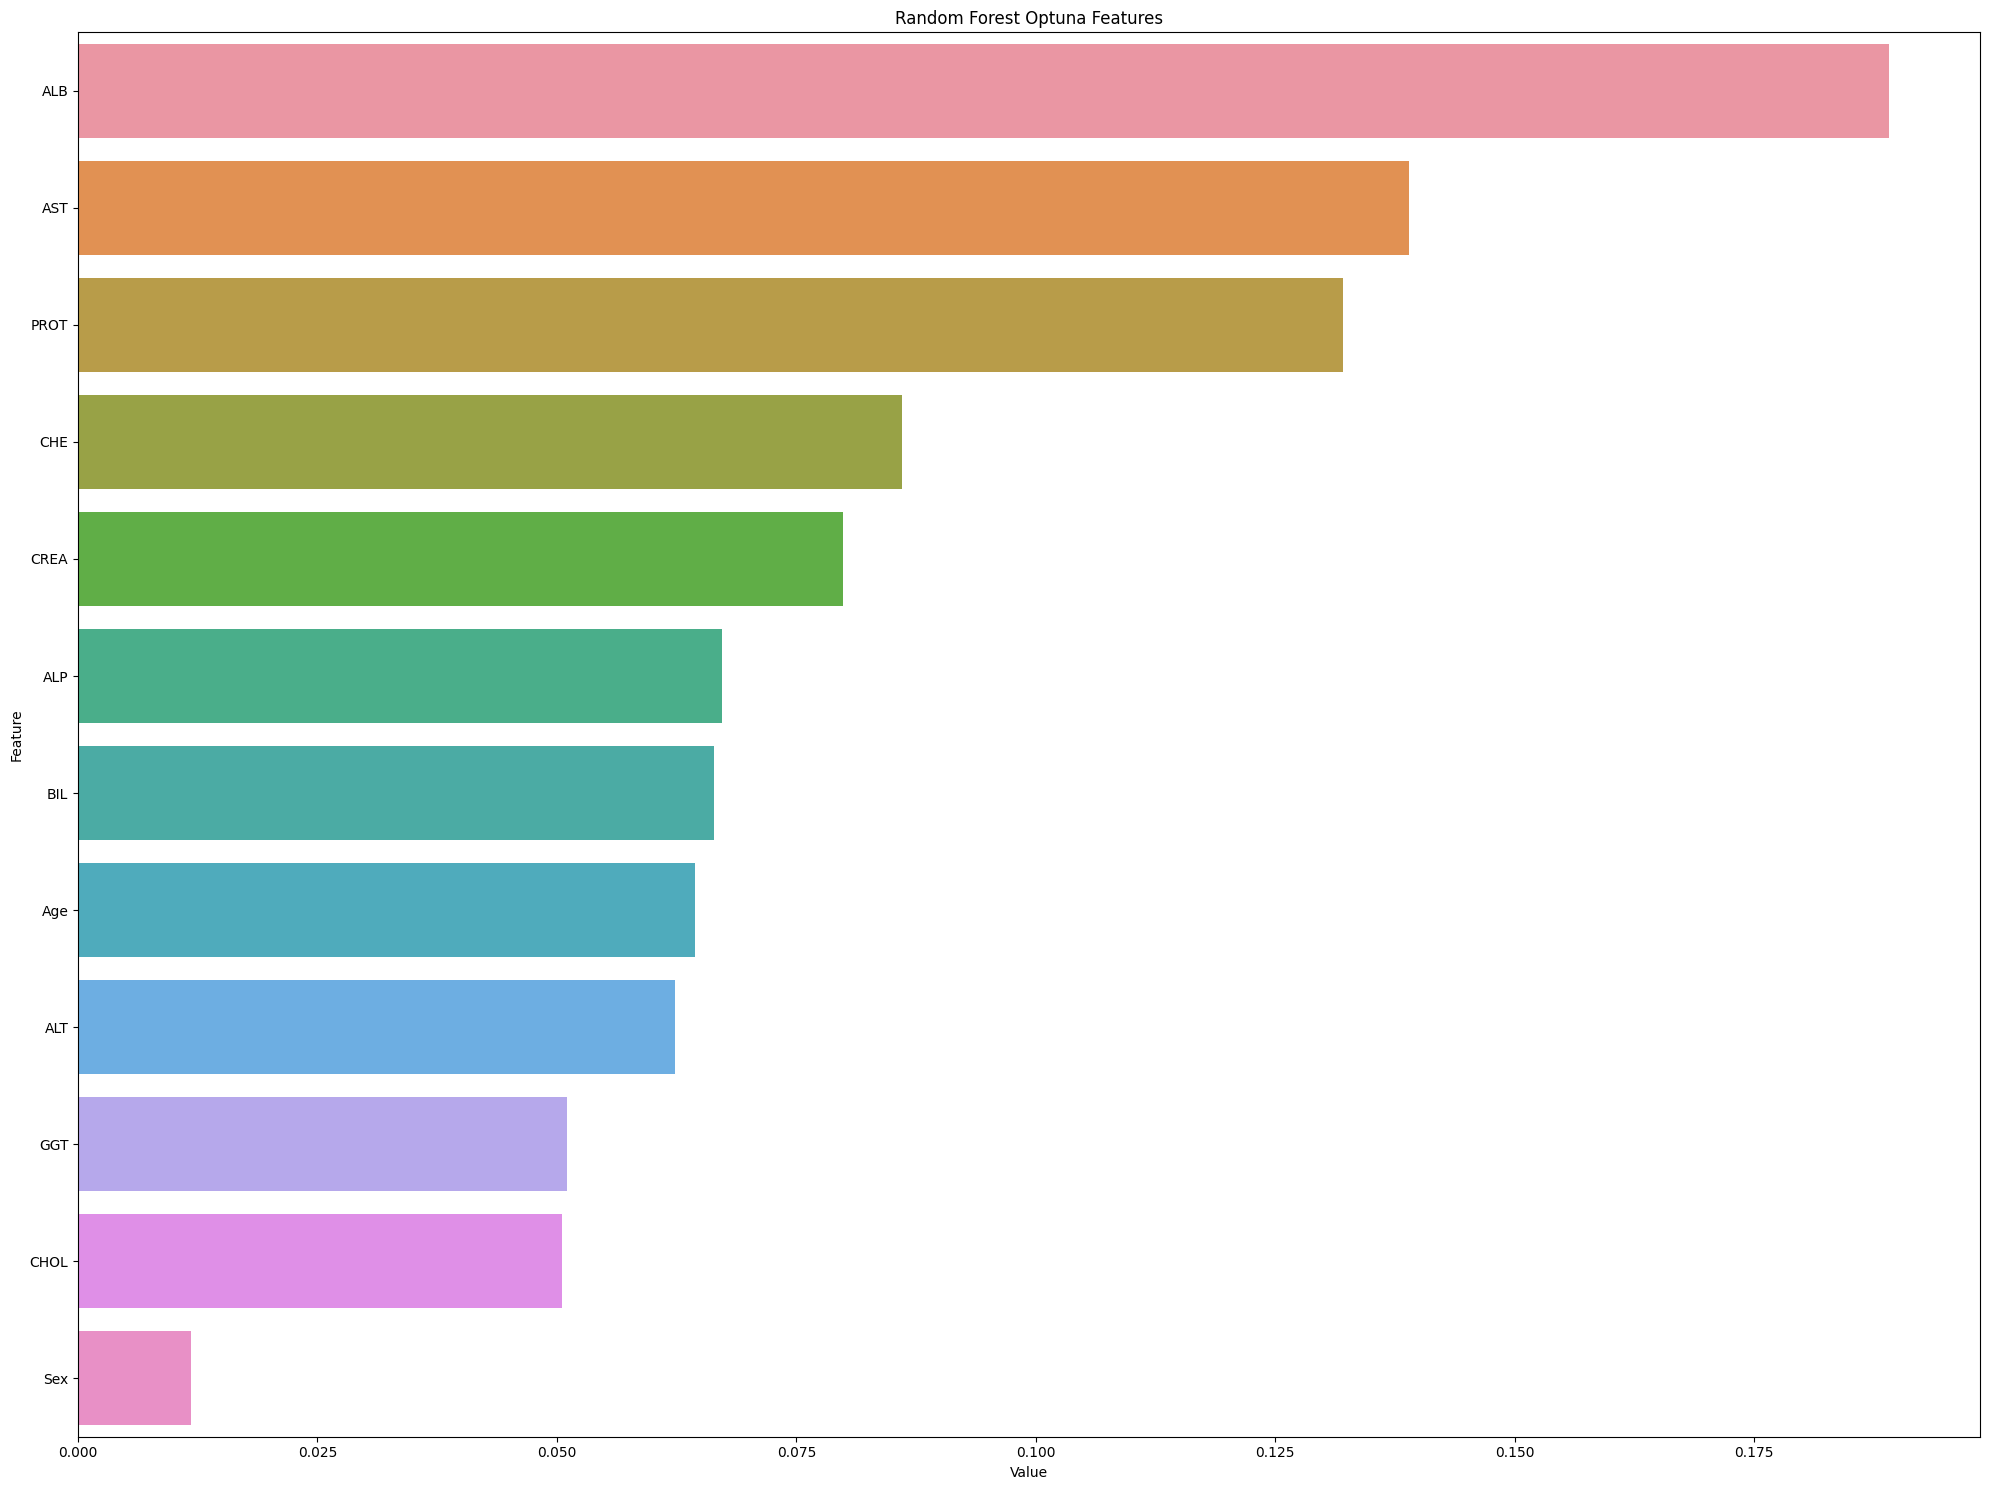

In [539]:
feature_imp = pd.DataFrame(sorted(zip(model_RandomF_optuna.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Random Forest Optuna Features')
plt.tight_layout()
# plt.savefig('lightgbm_fimp.png')

# VOTING CLASSIFIER ENSEMBLE

In [540]:
from sklearn.ensemble import VotingClassifier

In [541]:
# voting_clf1 = VotingClassifier(estimators=[
#          ('Catboost', model_Cat_optuna), ('XGBoost', model_xgb_optuna), ('LGBM', model_lgb_optuna)
#          , ('ExtraTree', model_ExtraT_optuna), ('RandomForest', model_RandomF_optuna), ('NaiveBayes', model_Gnb_optuna)], voting='hard', verbose=0)
# voting_clf1.fit(X_train, y_train)

In [542]:
# X_train.shape

In [543]:
# y_pred_ = voting_clf1.predict(X_train)
# accuracy = accuracy_score(y_train, y_pred_)
# print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))

In [544]:
voting_clf2 = VotingClassifier(estimators=[
         ('Catboost', model_Cat_optuna), ('XGBoost', model_xgb_optuna), ('LGBM', model_lgb_optuna)
         , ('ExtraTree', model_ExtraT_optuna)], voting='soft', verbose=0) #, ('NaiveBayes', model_Gnb_optuna) , ('RandomForest', model_RandomF_optuna)
voting_clf2.fit(X_train, y_train) #, ('RandomForest', model_RandomF_optuna)

[LightGBM] [Warning] lambda_l1 is set=1.4597870130183187e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4597870130183187e-07
[LightGBM] [Warning] bagging_fraction is set=0.4416506568253437, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4416506568253437
[LightGBM] [Warning] lambda_l2 is set=1.298799786638507, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.298799786638507
[LightGBM] [Warning] feature_fraction is set=0.8172967969338553, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8172967969338553
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


VotingClassifier(estimators=[('Catboost',
                              <catboost.core.CatBoostClassifier object at 0x7f804d2fd090>),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.19587409453980753,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=0.0969...
                                            num_parallel_tree=None,
                                            objective='multi:softprob',
                                            predictor=None, ...)),
                             ('LGBM',
                              LGBMClassifier(bagging_fraction=0.4416506568253437,
                                             bagging_freq=2,
                                             feature_fraction=0.8172967969338553,
                                             lambda_l1=1.4597870130183187e-07,
                                             lambda_l2=1.298799786638507,
                                             min_child_samples=60,
                                             num_leaves=214)),
                             ('ExtraTree',
                              ExtraTreesClassifier(max_depth=4,
                                                   n_estimators=600))],
                 verbose=0, voting='soft')

In [545]:
y_pred_ = voting_clf2.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_)
print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))

Accuracy after tuning: 99.86%


In [546]:
y_pred = voting_clf2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))


Accuracy after tuning: 92.68%


In [ ]:


# # Create a voting classifier with the best parameters from each model
# print("- Creating voting ensemble using optimized base models \n")
# voting_clf = VotingClassifier(estimators=[('xgb', xgb_grid.best_estimator_),
#                                           ('lgbm', lgbm_grid.best_estimator_),
#                                           ('rf', rf_grid.best_estimator_),
#                                           ('gbm', gbm_grid.best_estimator_),
#                                           ('svc', svc_grid.best_estimator_)],
#                               voting='soft', verbose=0)
# voting_clf.fit(X_train, y_train);

- Creating voting ensemble using optimized base models 



# STACKING CLASSIFIER ENSEMBLE

In [ ]:
# from mlxtend.classifier import StackingClassifier
# from sklearn.linear_model import LogisticRegression

# # Create a stacking classifier with the best parameters from each model
# print("- Creating stacking ensemble using optimized base models \n")
# stacking_clf = StackingClassifier(classifiers=[xgb_grid.best_estimator_,
#                                               lgbm_grid.best_estimator_,
#                                               rf_grid.best_estimator_,
#                                               gbm_grid.best_estimator_,
#                                               svc_grid.best_estimator_],
#                                   meta_classifier=LogisticRegression(), verbose=0)
# stacking_clf.fit(X_train, y_train);

- Creating stacking ensemble using optimized base models 



# EVALUATION RESULTS

In [ ]:
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import classification_report

# # Inform user we are now evaluating final models
# print("- Evaluating the final models \n")

# # [VOTING CLASSIFIER] Show the mean 5-fold cross validation score and the accuracy score on the test set in percentage form, as well as the classification report on the test set
# print('[VOTING CLASSIFIER] Training Mean 5-Fold CV Score: {:.2f}%'.format(np.mean(cross_val_score(voting_clf, X_train, y_train, cv=5, scoring='accuracy', verbose=0)) * 100))
# print('[VOTING CLASSIFIER] Test Set Accuracy Score: {:.2f}%'.format(voting_clf.score(X_test, y_test) * 100))
# print("[VOTING CLASSIFIER] Classification Report:\n", classification_report(y_test, voting_clf.predict(X_test)))

# # [STACKING CLASSIFIER] Show the mean 5-fold cross validation score and the accuracy score on the test set in percentage form, as well as the classification report on the test set
# print('[STACKING CLASSIFIER] Training Mean 5-Fold CV Score: {:.2f}%'.format(np.mean(cross_val_score(stacking_clf, X_train, y_train, cv=5, scoring='accuracy', verbose=0)) * 100))
# print('[STACKING CLASSIFIER] Test Set Accuracy Score: {:.2f}%'.format(stacking_clf.score(X_test, y_test) * 100))
# print("[STACKING CLASSIFIER] Classification Report:\n", classification_report(y_test, stacking_clf.predict(X_test)))

# # [XGB CLASSIFIER] Show the mean 5-fold cross validation score and the accuracy score on the test set in percentage form, as well as the classification report on the test set
# print('[XGB CLASSIFIER] Training Mean 5-Fold CV Score: {:.2f}%'.format(np.mean(cross_val_score(xgb_grid.best_estimator_, X_train, y_train, cv=5, scoring='accuracy', verbose=0)) * 100))
# print('[XGB CLASSIFIER] Test Set Accuracy Score: {:.2f}%'.format(xgb_grid.best_estimator_.score(X_test, y_test) * 100))
# print("[XGB CLASSIFIER] Classification Report:\n", classification_report(y_test, xgb_grid.best_estimator_.predict(X_test)))

# # [LGBM CLASSIFIER] Show the mean 5-fold cross validation score and the accuracy score on the test set in percentage form, as well as the classification report on the test set
# print('[LGBM CLASSIFIER] Training Mean 5-Fold CV Score: {:.2f}%'.format(np.mean(cross_val_score(lgbm_grid.best_estimator_, X_train, y_train, cv=5, scoring='accuracy', verbose=0)) * 100))
# print('[LGBM CLASSIFIER] Test Set Accuracy Score: {:.2f}%'.format(lgbm_grid.best_estimator_.score(X_test, y_test) * 100))
# print("[LGBM CLASSIFIER] Classification Report:\n", classification_report(y_test, lgbm_grid.best_estimator_.predict(X_test)))

# # [RF CLASSIFIER] Show the mean 5-fold cross validation score and the accuracy score on the test set in percentage form, as well as the classification report on the test set
# print('[RF CLASSIFIER] Training Mean 5-Fold CV Score: {:.2f}%'.format(np.mean(cross_val_score(rf_grid.best_estimator_, X_train, y_train, cv=5, scoring='accuracy', verbose=0)) * 100))
# print('[RF CLASSIFIER] Test Set Accuracy Score: {:.2f}%'.format(rf_grid.best_estimator_.score(X_test, y_test) * 100))
# print("[RF CLASSIFIER] Classification Report:\n", classification_report(y_test, rf_grid.best_estimator_.predict(X_test)))

# # [GBM CLASSIFIER] Show the mean 5-fold cross validation score and the accuracy score on the test set in percentage form, as well as the classification report on the test set
# print('[GBM CLASSIFIER] Training Mean 5-Fold CV Score: {:.2f}%'.format(np.mean(cross_val_score(gbm_grid.best_estimator_, X_train, y_train, cv=5, scoring='accuracy', verbose=0)) * 100))
# print('[GBM CLASSIFIER] Test Set Accuracy Score: {:.2f}%'.format(gbm_grid.best_estimator_.score(X_test, y_test) * 100))
# print("[GBM CLASSIFIER] Classification Report:\n", classification_report(y_test, gbm_grid.best_estimator_.predict(X_test)))

# # [SVC CLASSIFIER] Show the mean 5-fold cross validation score and the accuracy score on the test set in percentage form, as well as the classification report on the test set
# print('[SVC CLASSIFIER] Training Mean 5-Fold CV Score: {:.2f}%'.format(np.mean(cross_val_score(svc_grid.best_estimator_, X_train, y_train, cv=5, scoring='accuracy', verbose=0)) * 100))
# print('[SVC CLASSIFIER] Test Set Accuracy Score: {:.2f}%'.format(svc_grid.best_estimator_.score(X_test, y_test) * 100))
# print("[SVC CLASSIFIER] Classification Report:\n", classification_report(y_test, svc_grid.best_estimator_.predict(X_test)))

- Evaluating the final models 

[VOTING CLASSIFIER] Training Mean 5-Fold CV Score: 99.63%
[VOTING CLASSIFIER] Test Set Accuracy Score: 89.43%
[VOTING CLASSIFIER] Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        96
           1       1.00      0.33      0.50         3
           2       1.00      0.44      0.62         9
           3       0.40      0.33      0.36         6
           4       1.00      0.78      0.88         9

    accuracy                           0.89       123
   macro avg       0.86      0.58      0.66       123
weighted avg       0.90      0.89      0.88       123

[STACKING CLASSIFIER] Training Mean 5-Fold CV Score: 99.54%
[STACKING CLASSIFIER] Test Set Accuracy Score: 86.18%
[STACKING CLASSIFIER] Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96        96
           1       0.25      0.33      0.29         3
  

# SHOW FEATURE IMPORTANCES

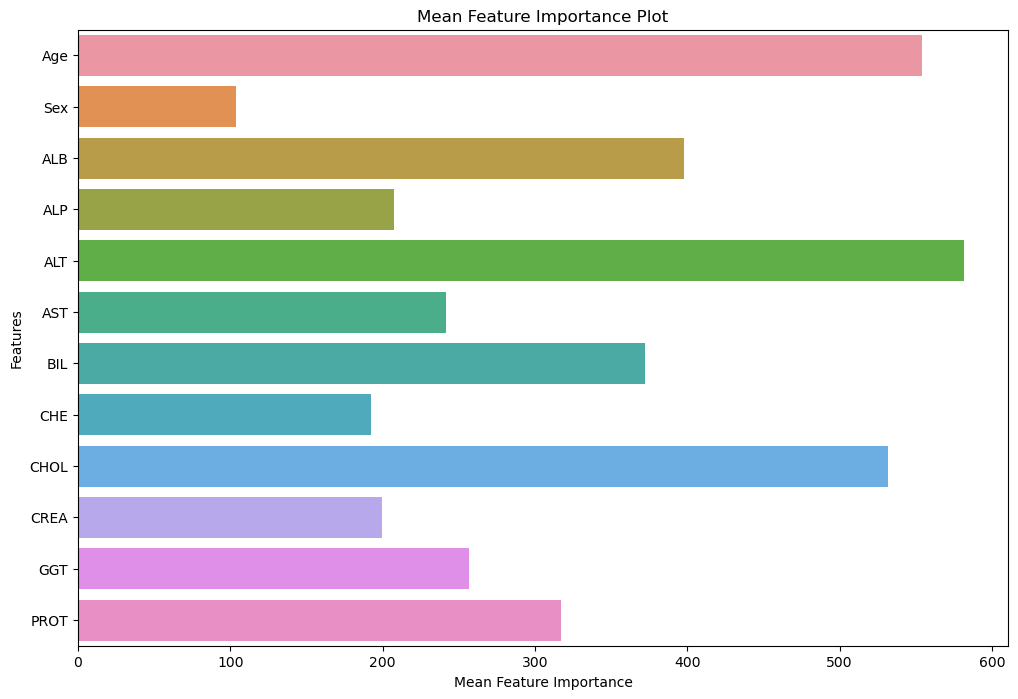

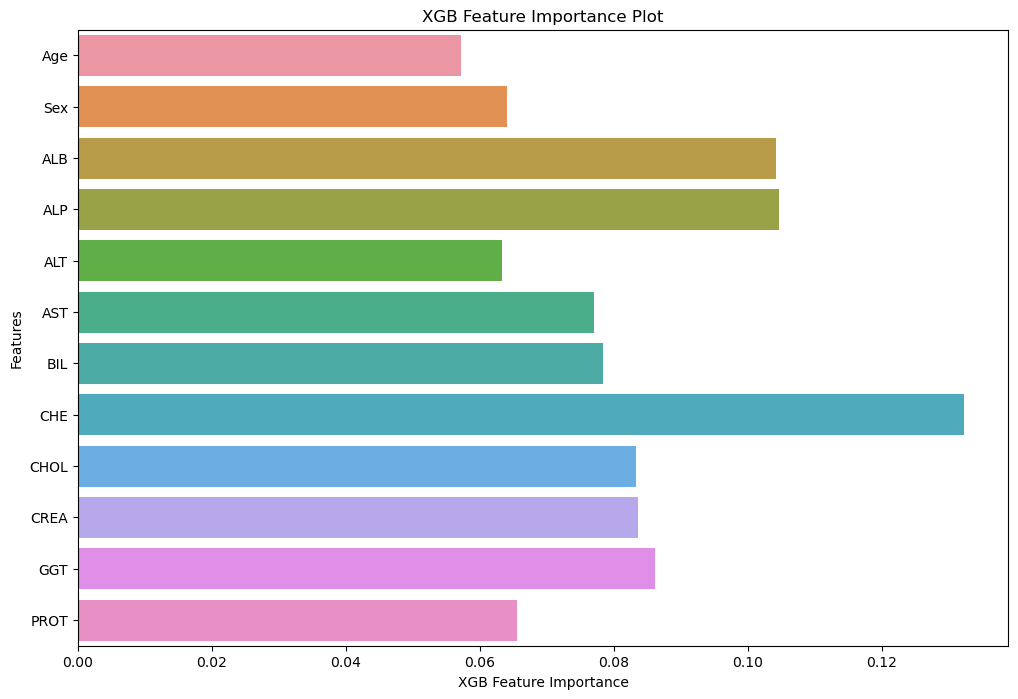

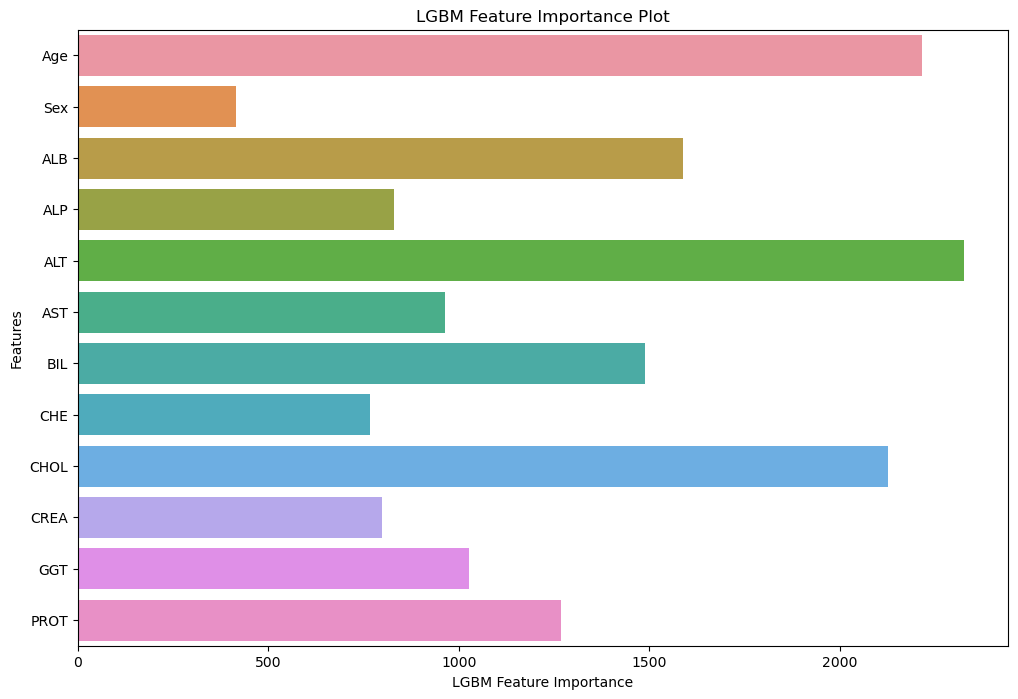

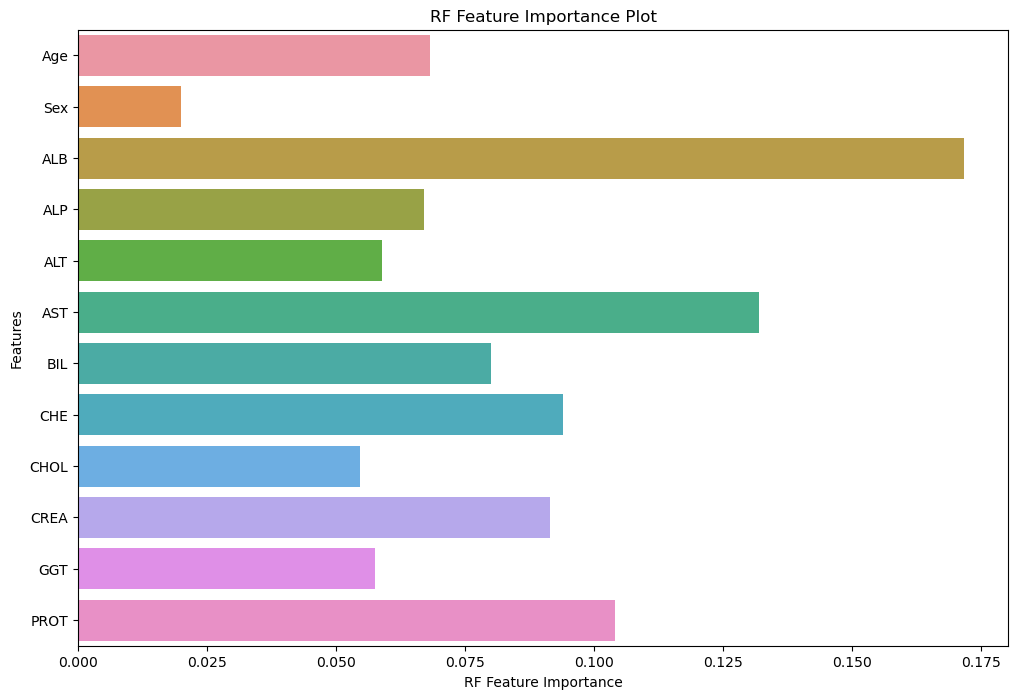

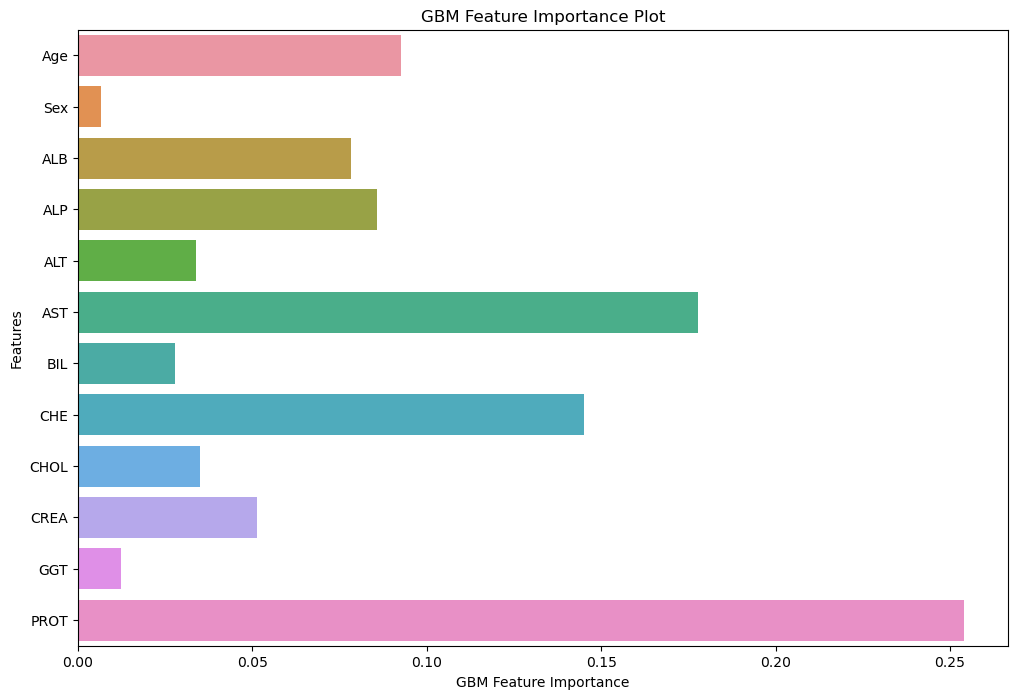


 NOTE: Feature importances are not available for SVC Classifier. The reason for this is that SVC works by finding the optimal hyperplane that separates the data into different classes, based on the support vectors. The position and orientation of the hyperplane are determined by the support vectors themselves, rather than the individual features of the data. Therefore, it is not possible to directly attribute importance values to individual features in SVC. 



In [ ]:
# # Get the feature importances from the models
# xgb_feat_importances = xgb_grid.best_estimator_.feature_importances_
# lgbm_feat_importances = lgbm_grid.best_estimator_.feature_importances_
# rf_feat_importances = rf_grid.best_estimator_.feature_importances_
# gbm_feat_importances = gbm_grid.best_estimator_.feature_importances_

# # Get the mean feature importances accross all models
# mean_importances = np.mean([xgb_feat_importances, lgbm_feat_importances, rf_feat_importances, gbm_feat_importances], axis=0)

# # Use seaborn to show the feature importances for the mean feature importances
# plt.figure(figsize=(12, 8))
# sns.barplot(x=mean_importances, y=X_train.columns)
# plt.title('Mean Feature Importance Plot')
# plt.xlabel('Mean Feature Importance')
# plt.ylabel('Features')
# plt.show()

# # Use seaborn to show the feature importances for the XGB feature importances
# plt.figure(figsize=(12, 8))
# sns.barplot(x=xgb_feat_importances, y=X_train.columns)
# plt.title('XGB Feature Importance Plot')
# plt.xlabel('XGB Feature Importance')
# plt.ylabel('Features')
# plt.show()

# # Use seaborn to show the feature importances for the LGBM feature importances
# plt.figure(figsize=(12, 8))
# sns.barplot(x=lgbm_feat_importances, y=X_train.columns)
# plt.title('LGBM Feature Importance Plot')
# plt.xlabel('LGBM Feature Importance')
# plt.ylabel('Features')
# plt.show()

# # Use seaborn to show the feature importances for the RF feature importances
# plt.figure(figsize=(12, 8))
# sns.barplot(x=rf_feat_importances, y=X_train.columns)
# plt.title('RF Feature Importance Plot')
# plt.xlabel('RF Feature Importance')
# plt.ylabel('Features')
# plt.show()

# # Use seaborn to show the feature importances for the GBM feature importances
# plt.figure(figsize=(12, 8))
# sns.barplot(x=gbm_feat_importances, y=X_train.columns)
# plt.title('GBM Feature Importance Plot')
# plt.xlabel('GBM Feature Importance')
# plt.ylabel('Features')
# plt.show()

# # Explain that there is no feature importance for SVC
# print("\n NOTE: Feature importances are not available for SVC Classifier. The reason for this is that SVC works by finding the optimal hyperplane that separates the data into different classes, based on the support vectors. The position and orientation of the hyperplane are determined by the support vectors themselves, rather than the individual features of the data. Therefore, it is not possible to directly attribute importance values to individual features in SVC. \n")

# [V1] SHOW SHAP VALUES [GRID]

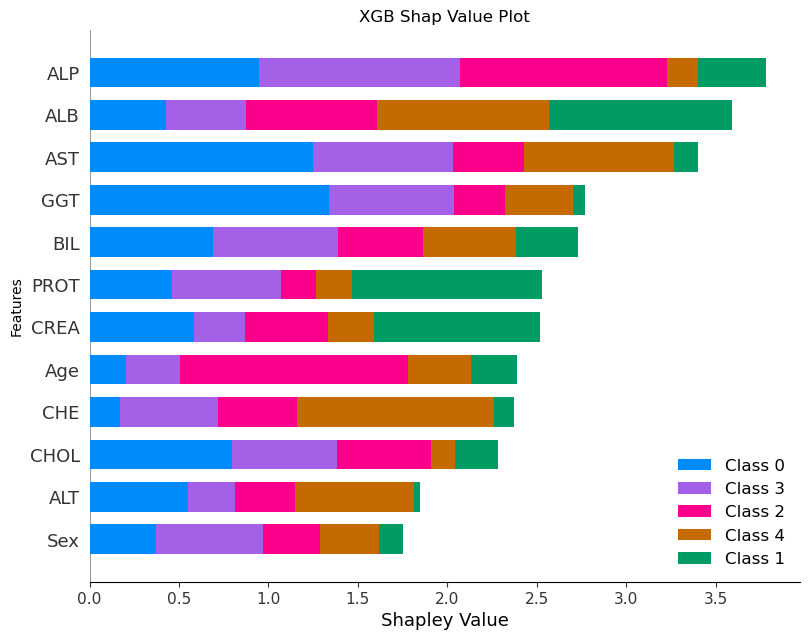

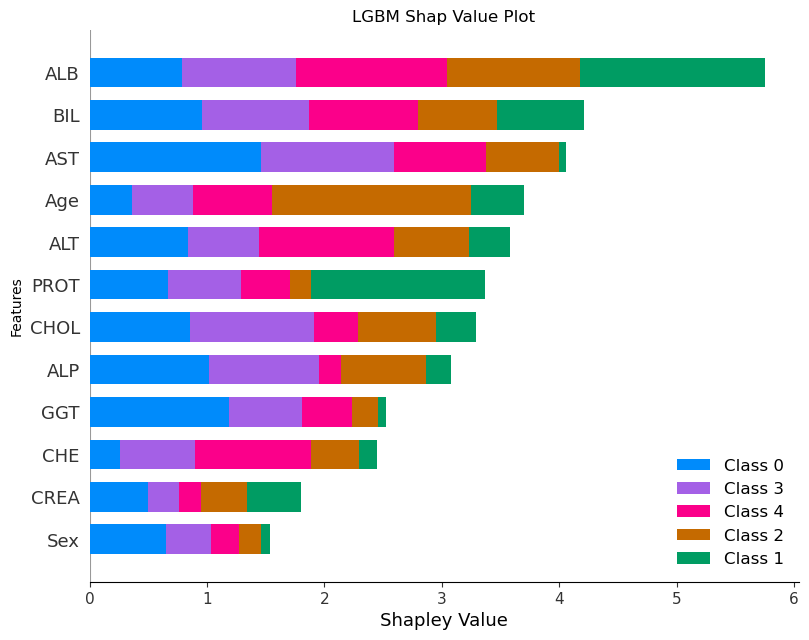

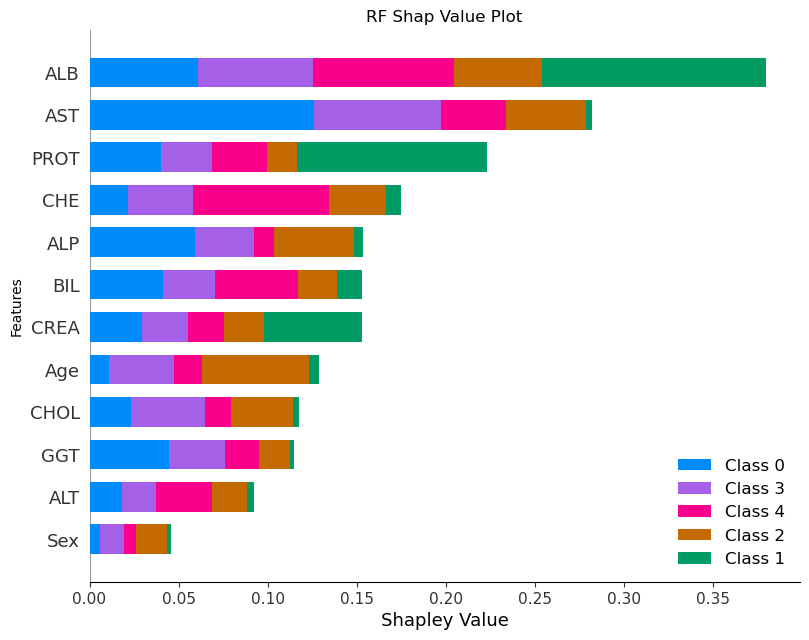


 NOTE: Shap values are only available for GBM for binary classification at this time. 


 NOTE: Shap values are not available for SVC Classifier. The reason for this is that SVC works by finding the optimal hyperplane that separates the data into different classes, based on the support vectors. The position and orientation of the hyperplane are determined by the support vectors themselves, rather than the individual features of the data. Therefore, it is not possible to directly attribute shap values to individual features in SVC. 



In [ ]:
import shap

# Create an explainer object for each model
xgb_explainer = shap.TreeExplainer(xgb_grid.best_estimator_)
lgbm_explainer = shap.TreeExplainer(lgbm_grid.best_estimator_)
rf_explainer = shap.TreeExplainer(rf_grid.best_estimator_)
#gbm_explainer = shap.TreeExplainer(gbm_grid.best_estimator_)                # COMMENT OUT GBM RELATED STUFF (FOR SHAP) IF USING MULTI CLASS

# Calculate the Shapley values for each model
xgb_shap_values = xgb_explainer.shap_values(X_train)
lgbm_shap_values = lgbm_explainer.shap_values(X_train)
rf_shap_values = rf_explainer.shap_values(X_train)
#gbm_shap_values = gbm_explainer.shap_values(X_train)                        # COMMENT OUT GBM RELATED STUFF (FOR SHAP) IF USING MULTI CLASS

# Plot the Shapley values for each feature
shap.summary_plot(xgb_shap_values, X_train, plot_type='bar', show=False)
plt.title('XGB Shap Value Plot')
plt.xlabel('Shapley Value')
plt.ylabel('Features')
plt.show()

shap.summary_plot(lgbm_shap_values, X_train, plot_type='bar', show=False)
plt.title('LGBM Shap Value Plot')
plt.xlabel('Shapley Value')
plt.ylabel('Features')
plt.show()

shap.summary_plot(rf_shap_values, X_train, plot_type='bar', show=False)
plt.title('RF Shap Value Plot')
plt.xlabel('Shapley Value')
plt.ylabel('Features')
plt.show()

#shap.summary_plot(gbm_shap_values, X_train, plot_type='bar', show=False)    # COMMENT OUT GBM RELATED STUFF (FOR SHAP) IF USING MULTI CLASS
#plt.title('GBM Shap Value Plot')
#plt.xlabel('Shapley Value')
#plt.ylabel('Features')
#plt.show()

# Explain that there is no shap values for multi class problems using GBM at this time                       # UNCOMMENT THIS DISCLAIMER (FOR SHAP) about GBM IF USING MULTI CLASS
print("\n NOTE: Shap values are only available for GBM for binary classification at this time. \n")

# Explain that there is no shap values for SVC
print("\n NOTE: Shap values are not available for SVC Classifier. The reason for this is that SVC works by finding the optimal hyperplane that separates the data into different classes, based on the support vectors. The position and orientation of the hyperplane are determined by the support vectors themselves, rather than the individual features of the data. Therefore, it is not possible to directly attribute shap values to individual features in SVC. \n")